In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
BRFSS2021 = pd.read_csv('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSV/BRFSS2021.csv')

In [ ]:
# Feature selection
DF = BRFSS2021[['BPHIGH6', 'TOLDHI3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'DIABETE4', 'CHCSCNCR', 'CHCOCNCR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PRIMINSR', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'SEXVAR', '_AGE_G', 'MARITAL', 'EDUCA', 'VETERAN3', 'EMPLOY1', 'INCOME3', '_RACE', '_SMOKER3', 'USENOW3', 'ECIGNOW1', '_RFDRHV7', 'DIFFALON', 'DECIDE']]

In [ ]:
# Cleaning nulls
DF = DF.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'EMPLOY1': [9],
    'PRIMINSR': [77, 99],
    'INCOME3': [77, 99],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in DF.columns:
        DF = DF[~DF[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in DF.columns:
    if column not in refuse_values:
        refuse = [7, 9, 77, 99, 777, 999, 7777, 9999, 77777, 99999, 777777, 999999]
        DF = DF[~DF[column].isin(refuse)]

In [ ]:
# Dictionary to map old column names to new column names
column_mapping = {
    'BPHIGH6': 'Blood Pressure',
    'TOLDHI3': 'Cholesterol',
    'CVDINFR4': 'Myocardial Infarction',
    'CVDCRHD4': 'Heart Disease',
    'CVDSTRK3': 'Stroke',
    'ASTHMA3': 'Asthma',
    'CHCCOPD3': 'Bronchitis',
    'ADDEPEV3': 'Depressive Disorder',
    'CHCKDNY2': 'Renal Issue',
    'DIABETE4': 'Diabete',
    'CHCSCNCR': 'Skin Cancer',
    'CHCOCNCR': 'Cancer',
    'GENHLTH': 'General Health',
    'PHYSHLTH': 'Physical Health',
    'MENTHLTH': 'Mental Health',
    'PRIMINSR': 'Health Insurance',
    'PERSDOC3': 'Personal Health Care',
    'MEDCOST1': 'Medical Cost',
    'CHECKUP1': 'Routine Check',
    'EXERANY2': 'Exercise',
    'SEXVAR': 'Gendar',
    '_AGE_G': 'Age Group',
    'MARITAL': 'Marrital Status',
    'EDUCA': 'Eduction Status',
    'VETERAN3': 'Military Record',
    'EMPLOY1': 'Employment Status',
    'INCOME3': 'Income',
    '_RACE': 'Ethnicity',
    '_SMOKER3': 'Smoking Status',
    'USENOW3': 'Non-Smoking Tobacco',
    'ECIGNOW1': 'E-cigarette',
    '_RFDRHV7': 'Alcohol Consumption',
    'DIFFALON': 'Errands Alone',
    'DECIDE': 'Cognition Dysfunction'
}

# Rename the columns using the mapping
DF = DF.rename(columns=column_mapping)

In [ ]:
# Separating data
Healthy = DF[DF['Cognition Dysfunction']==2]
Affected = DF[DF['Cognition Dysfunction']==1]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.50, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.30, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['Cognition Dysfunction'], axis=1) # Input features
y_train = train['Cognition Dysfunction'] # Target label

x_test = test.drop(['Cognition Dysfunction'], axis=1) # Input features
y_test = test['Cognition Dysfunction'] # Target label

In [ ]:
# Taget Label Encoder
y_train = np.array([1 if val == 1 else 0 for val in y_train])

y_test = np.array([1 if val == 1 else 0 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 15545


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


In [ ]:
"""
from imblearn.over_sampling import RandomOverSampler

# Calculate the number of samples for each class
minority_class_count = int(len(y_test) / 1.1)

# Create a dictionary with the desired number of samples for each class
sampling_strategy = {1: minority_class_count}

# Create an instance of RandomOverSampler with the desired sampling strategy
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)

# Fit and resample your training data using RandomOverSampler and TomekLinks
x_test, y_test = ros.fit_resample(x_test, y_test)
"""

'\nfrom imblearn.over_sampling import RandomOverSampler\n\n# Calculate the number of samples for each class\nminority_class_count = int(len(y_test) / 1.1)\n\n# Create a dictionary with the desired number of samples for each class\nsampling_strategy = {1: minority_class_count}\n\n# Create an instance of RandomOverSampler with the desired sampling strategy\nros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)\n\n# Fit and resample your training data using RandomOverSampler and TomekLinks\nx_test, y_test = ros.fit_resample(x_test, y_test)\n'

In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 110005
Class 1 count: 6663


# Base CSL

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
import numpy as np

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the CNN model with Cost-Sensitive Learning (CSL)
def cnn_with_csl_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    pool = MaxPooling1D(pool_size=2)(conv3)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the CNN model with CSL
input_shape = (x_train.shape[1], 1)
cnn_with_csl_instance = cnn_with_csl_model(input_shape)

# Compile the model
cnn_with_csl_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the CNN model with CSL for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    cnn_with_csl_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# Evaluate the CNN model with CSL
loss, accuracy = cnn_with_csl_instance.evaluate(x_test, y_test)
print("CNN with CSL - Test Loss:", loss)
print("CNN with CSL - Test Accuracy:", accuracy)

1962/1962 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7648 - loss: 0.5066 - val_accuracy: 0.8966 - val_loss: 0.2690
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7878 - loss: 0.5124 - val_accuracy: 0.6293 - val_loss: 0.6986
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7877 - loss: 0.5600 - val_accuracy: 0.8616 - val_loss: 0.3244
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7935 - loss: 0.6013 - val_accuracy: 0.8529 - val_loss: 0.3316
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7924 - loss: 0.6448 - val_accuracy: 0.5914 - val_loss: 0.7175
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7911 - loss: 0.6919 - val_accuracy: 0.8619 - val_loss: 0.3342
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7936 - loss: 0.7379 - val_accuracy: 0.7527 - val_loss: 0.5094
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7938 - loss: 0.7722 - val_accuracy: 0.9157 - val_loss: 0.2310
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step -

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Normalized Confusion Matrix:
[[0.67239671 0.32760329]
 [0.12922107 0.87077893]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80    110005
     Class 1       0.14      0.87      0.24      6663

    accuracy                           0.68    116668
   macro avg       0.56      0.77      0.52    116668
weighted avg       0.94      0.68      0.77    116668



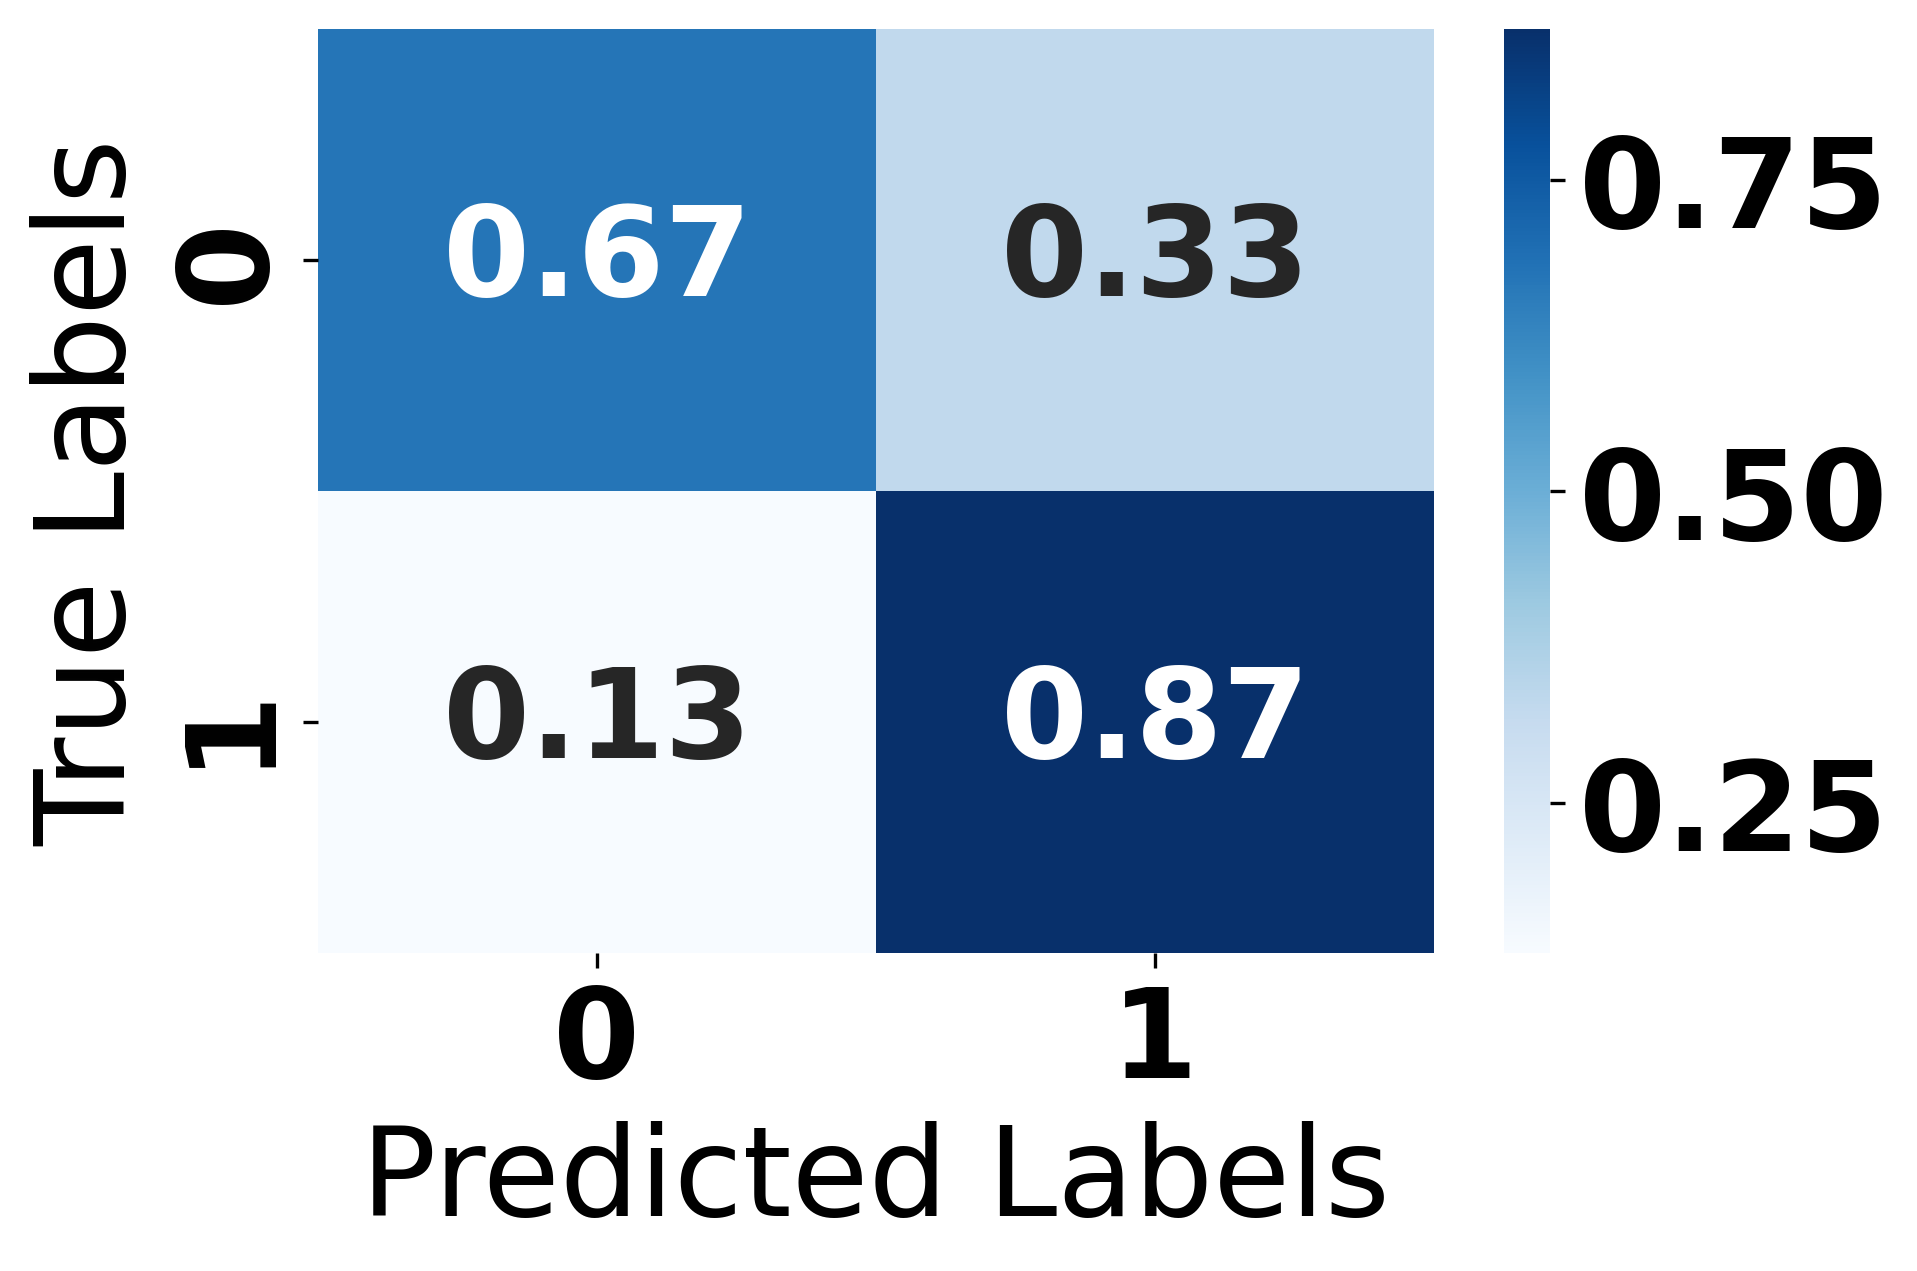

In [ ]:
# Predict probabilities on test data
y_pred_prob = cnn_with_csl_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.43, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
cnn_with_csl_instance.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/cnn_with_csl_instance(CSL).h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
cnn_with_csl_instance = load_model('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/cnn_with_csl_instance(CSL).h5')

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
Normalized Confusion Matrix:
[[0.67239671 0.32760329]
 [0.12922107 0.87077893]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.67      0.80    110005
     Class 1       0.14      0.87      0.24      6663

    accuracy                           0.68    116668
   macro avg       0.56      0.77      0.52    116668
weighted avg       0.94      0.68      0.77    116668



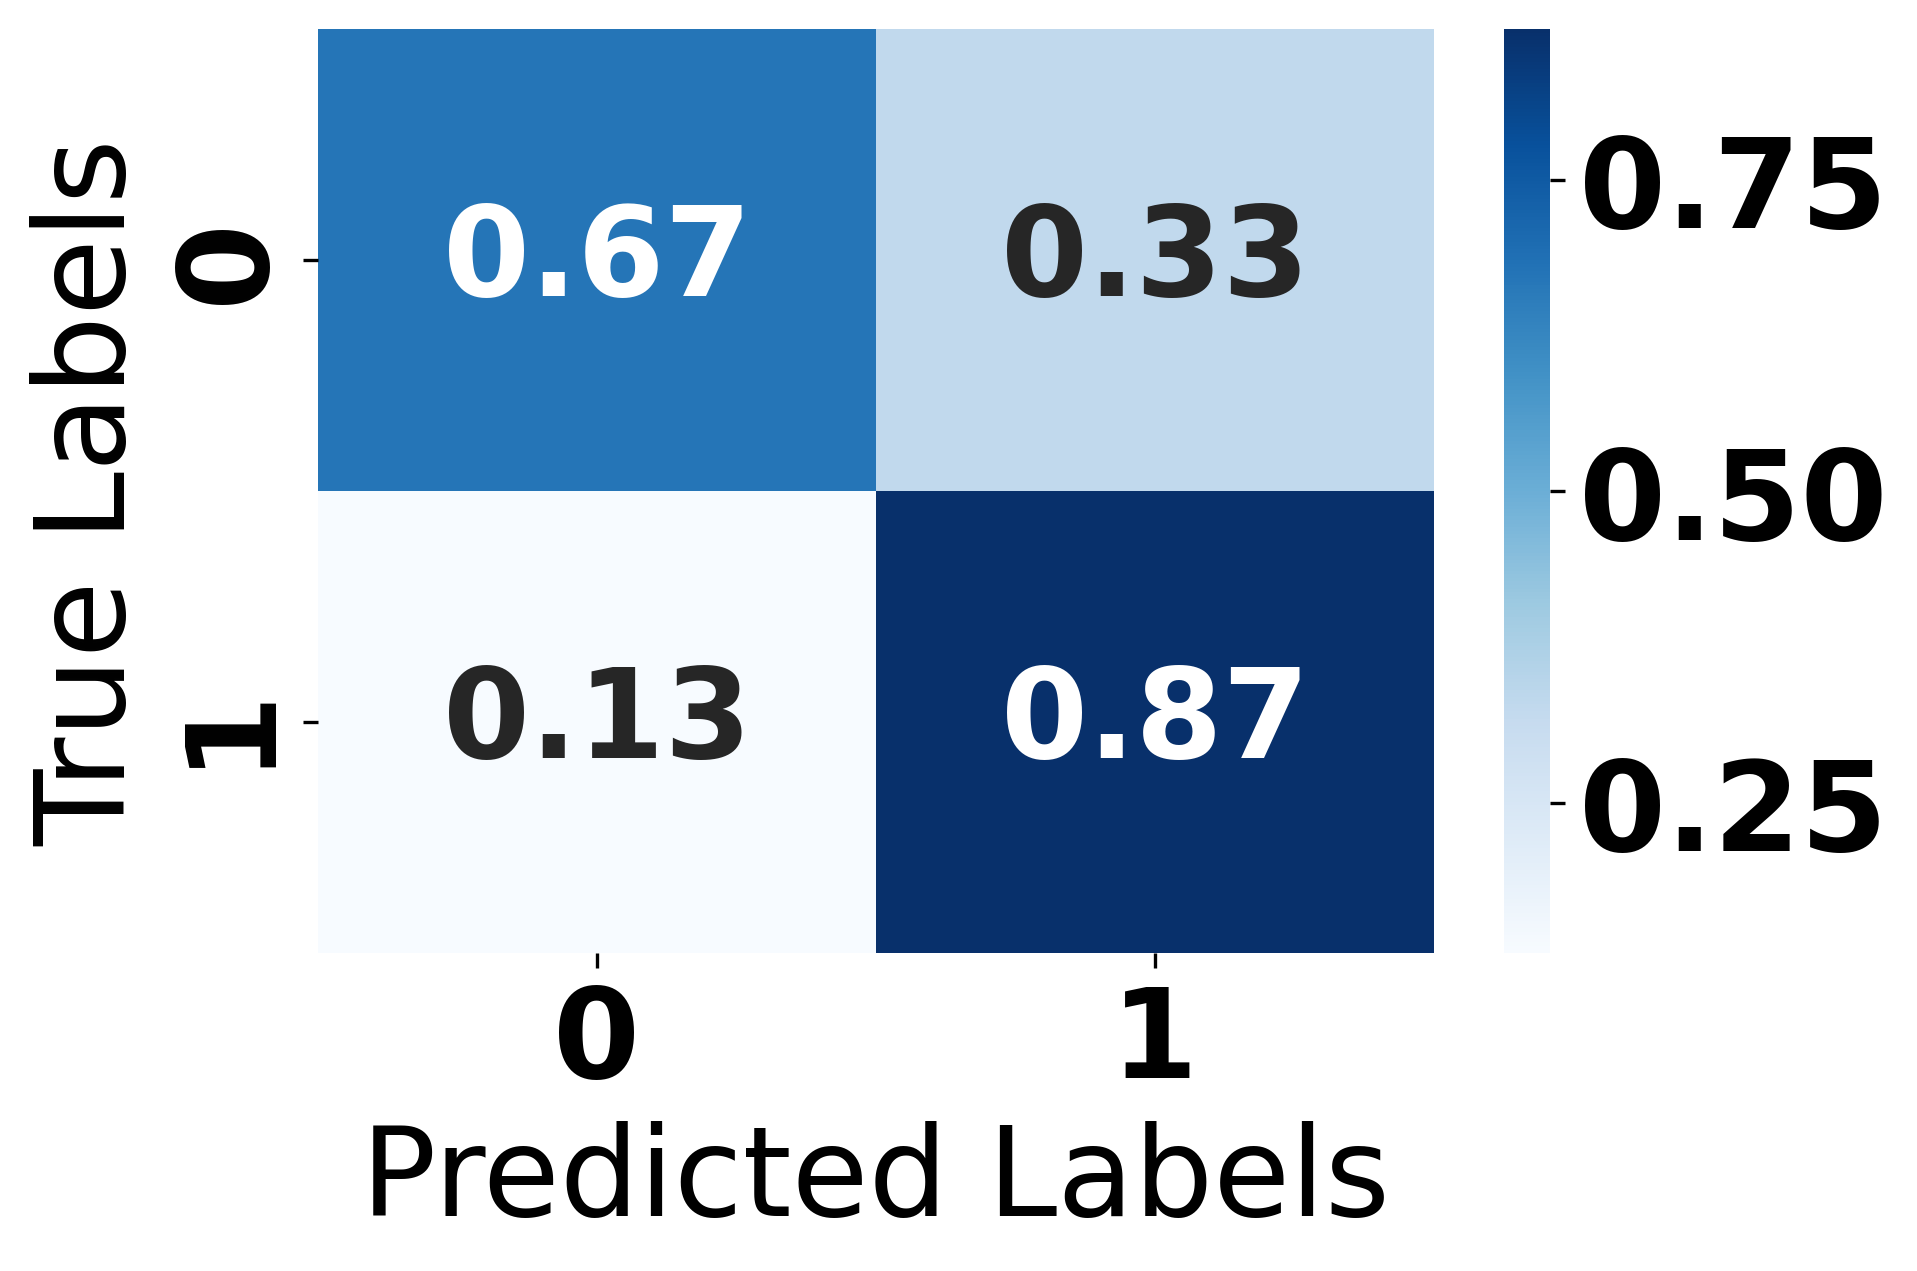

In [ ]:
# Predict probabilities on test data
y_pred_prob = cnn_with_csl_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.43, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

# Cost Sensitive Learning

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the novel model
input_shape = (x_train.shape[1], 1)
novel_model_instance = novel_improved_model(input_shape)

# Compile the model
novel_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the novel model for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    novel_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# Evaluate the novel model
loss, accuracy = novel_model_instance.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3646/3646 [==============================] - 20s 6ms/step - loss: 0.5298 - accuracy: 0.7536
Test Loss: 0.5297760367393494
Test Accuracy: 0.7535742521286011


3646/3646 [==============================] - 18s 5ms/step
Normalized Confusion Matrix:
[[0.7493023  0.2506977 ]
 [0.17589674 0.82410326]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.75      0.85    110005
     Class 1       0.17      0.82      0.28      6663

    accuracy                           0.75    116668
   macro avg       0.58      0.79      0.56    116668
weighted avg       0.94      0.75      0.82    116668



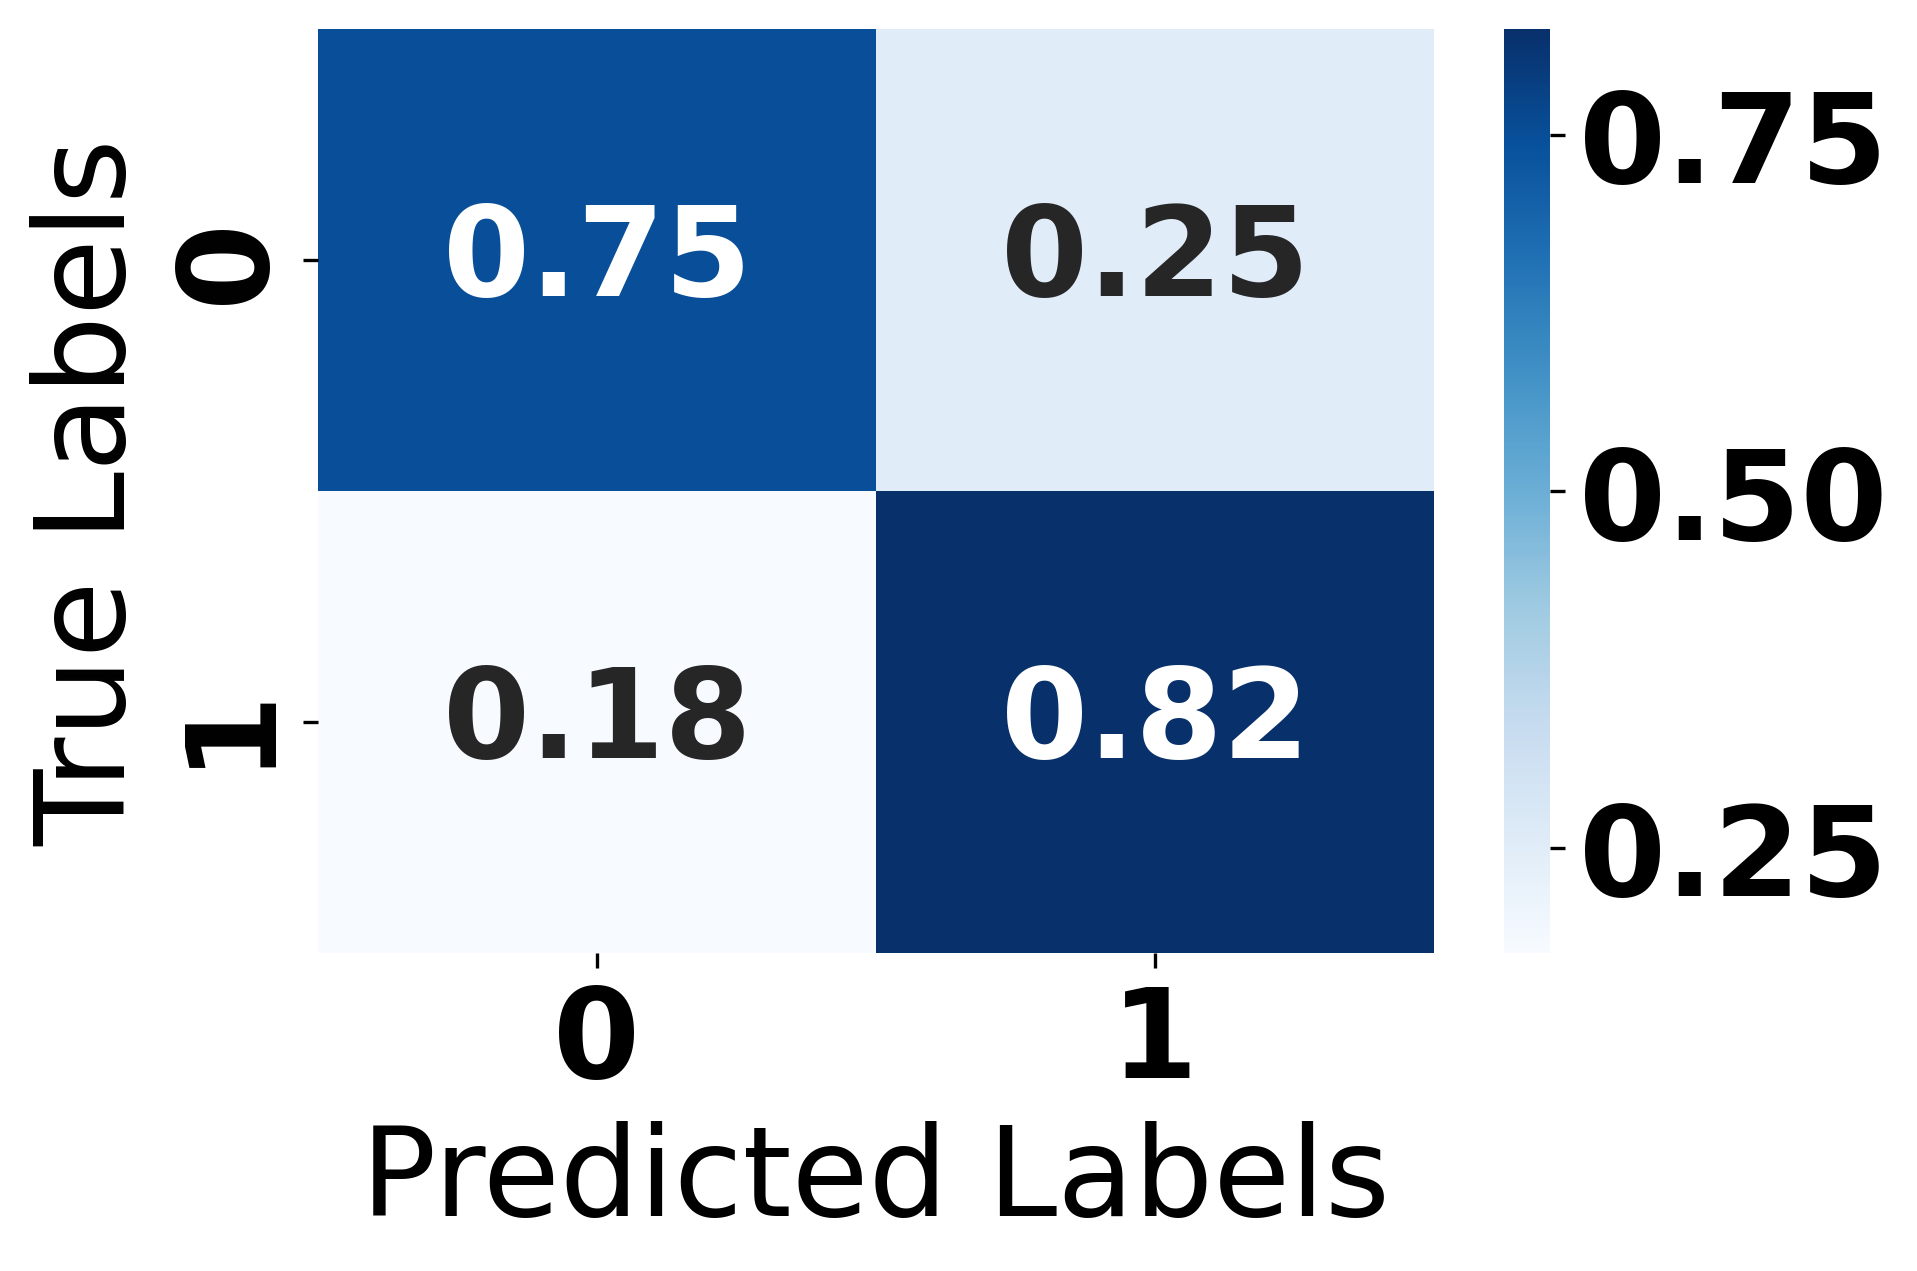

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
novel_model_instance.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/novel_model_instance(CSL).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
novel_model_instance = load_model('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/novel_model_instance(CSL).h5')

3646/3646 [==============================] - 9s 2ms/step
Normalized Confusion Matrix:
[[0.7651834 0.2348166]
 [0.1865526 0.8134474]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.77      0.86    110005
     Class 1       0.17      0.81      0.29      6663

    accuracy                           0.77    116668
   macro avg       0.58      0.79      0.57    116668
weighted avg       0.94      0.77      0.83    116668



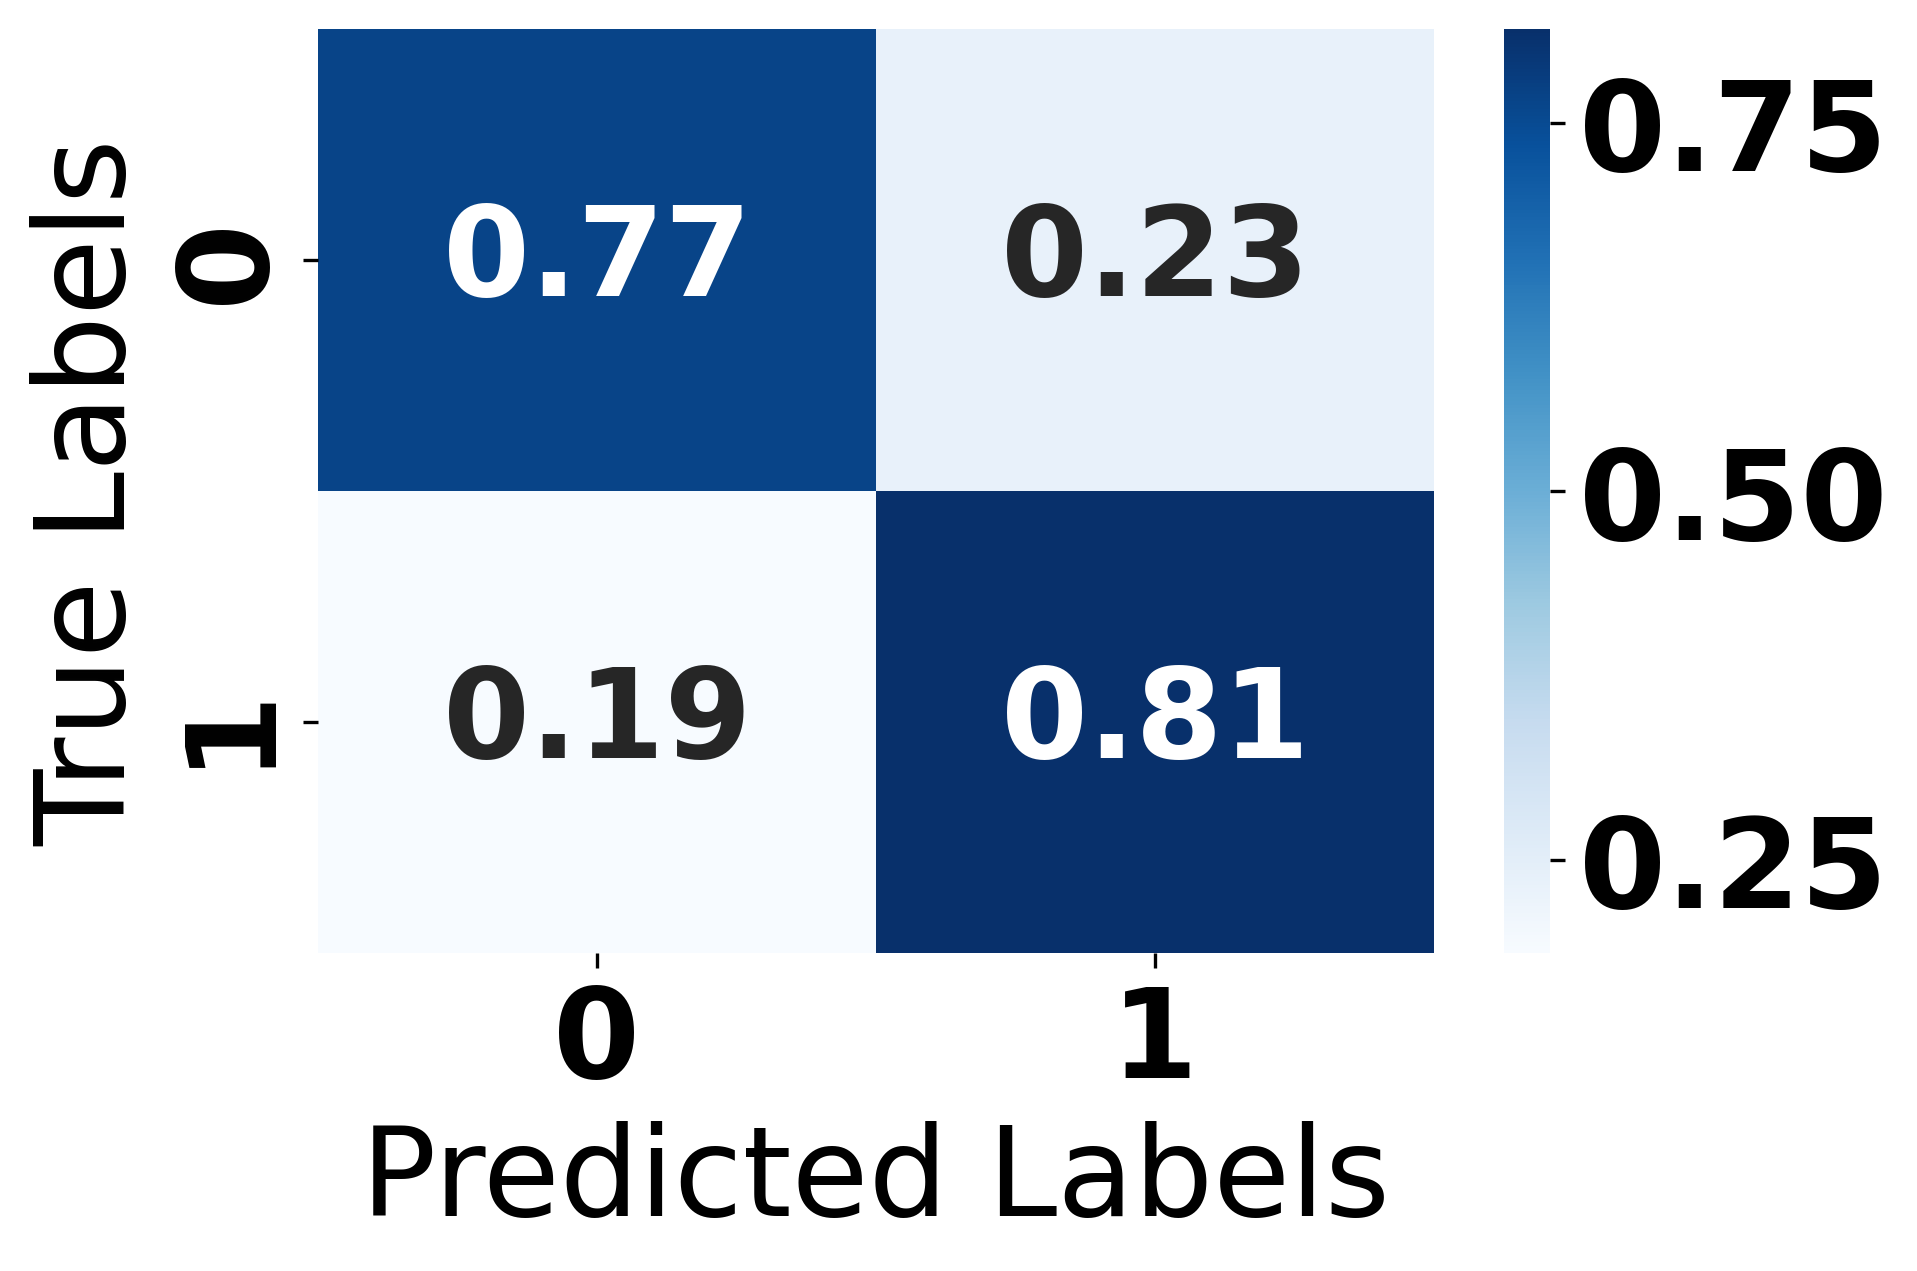

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.519, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step
Normalized Confusion Matrix:
[[0.7651834 0.2348166]
 [0.1865526 0.8134474]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.77      0.86    110005
     Class 1       0.17      0.81      0.29      6663

    accuracy                           0.77    116668
   macro avg       0.58      0.79      0.57    116668
weighted avg       0.94      0.77      0.83    116668



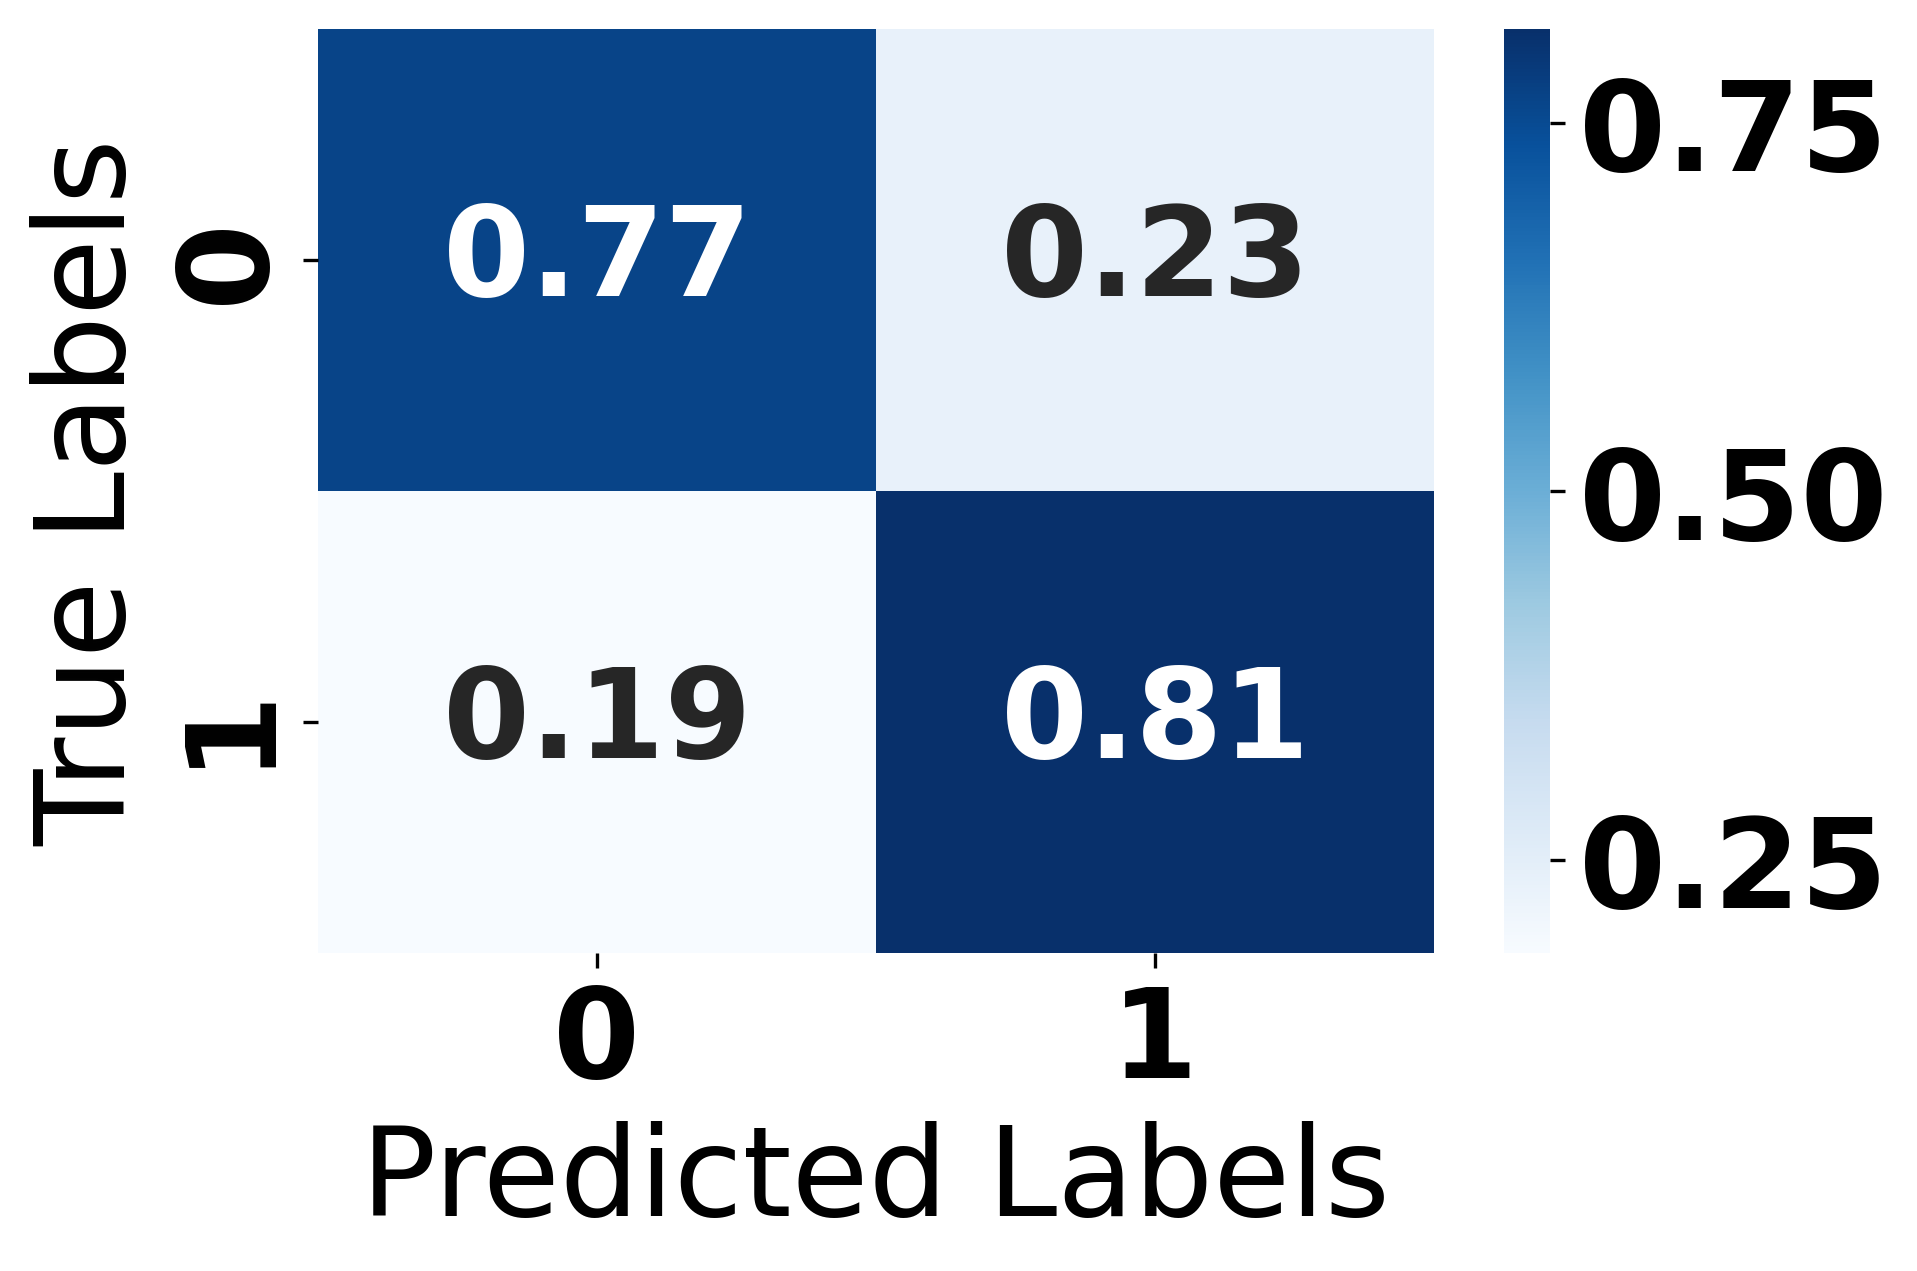

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.519, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

Confidence Scores for each prediction:
[[0.8747635 ]
 [0.60199404]
 [0.5945033 ]
 ...
 [0.5793969 ]
 [0.87251973]
 [0.84270835]]


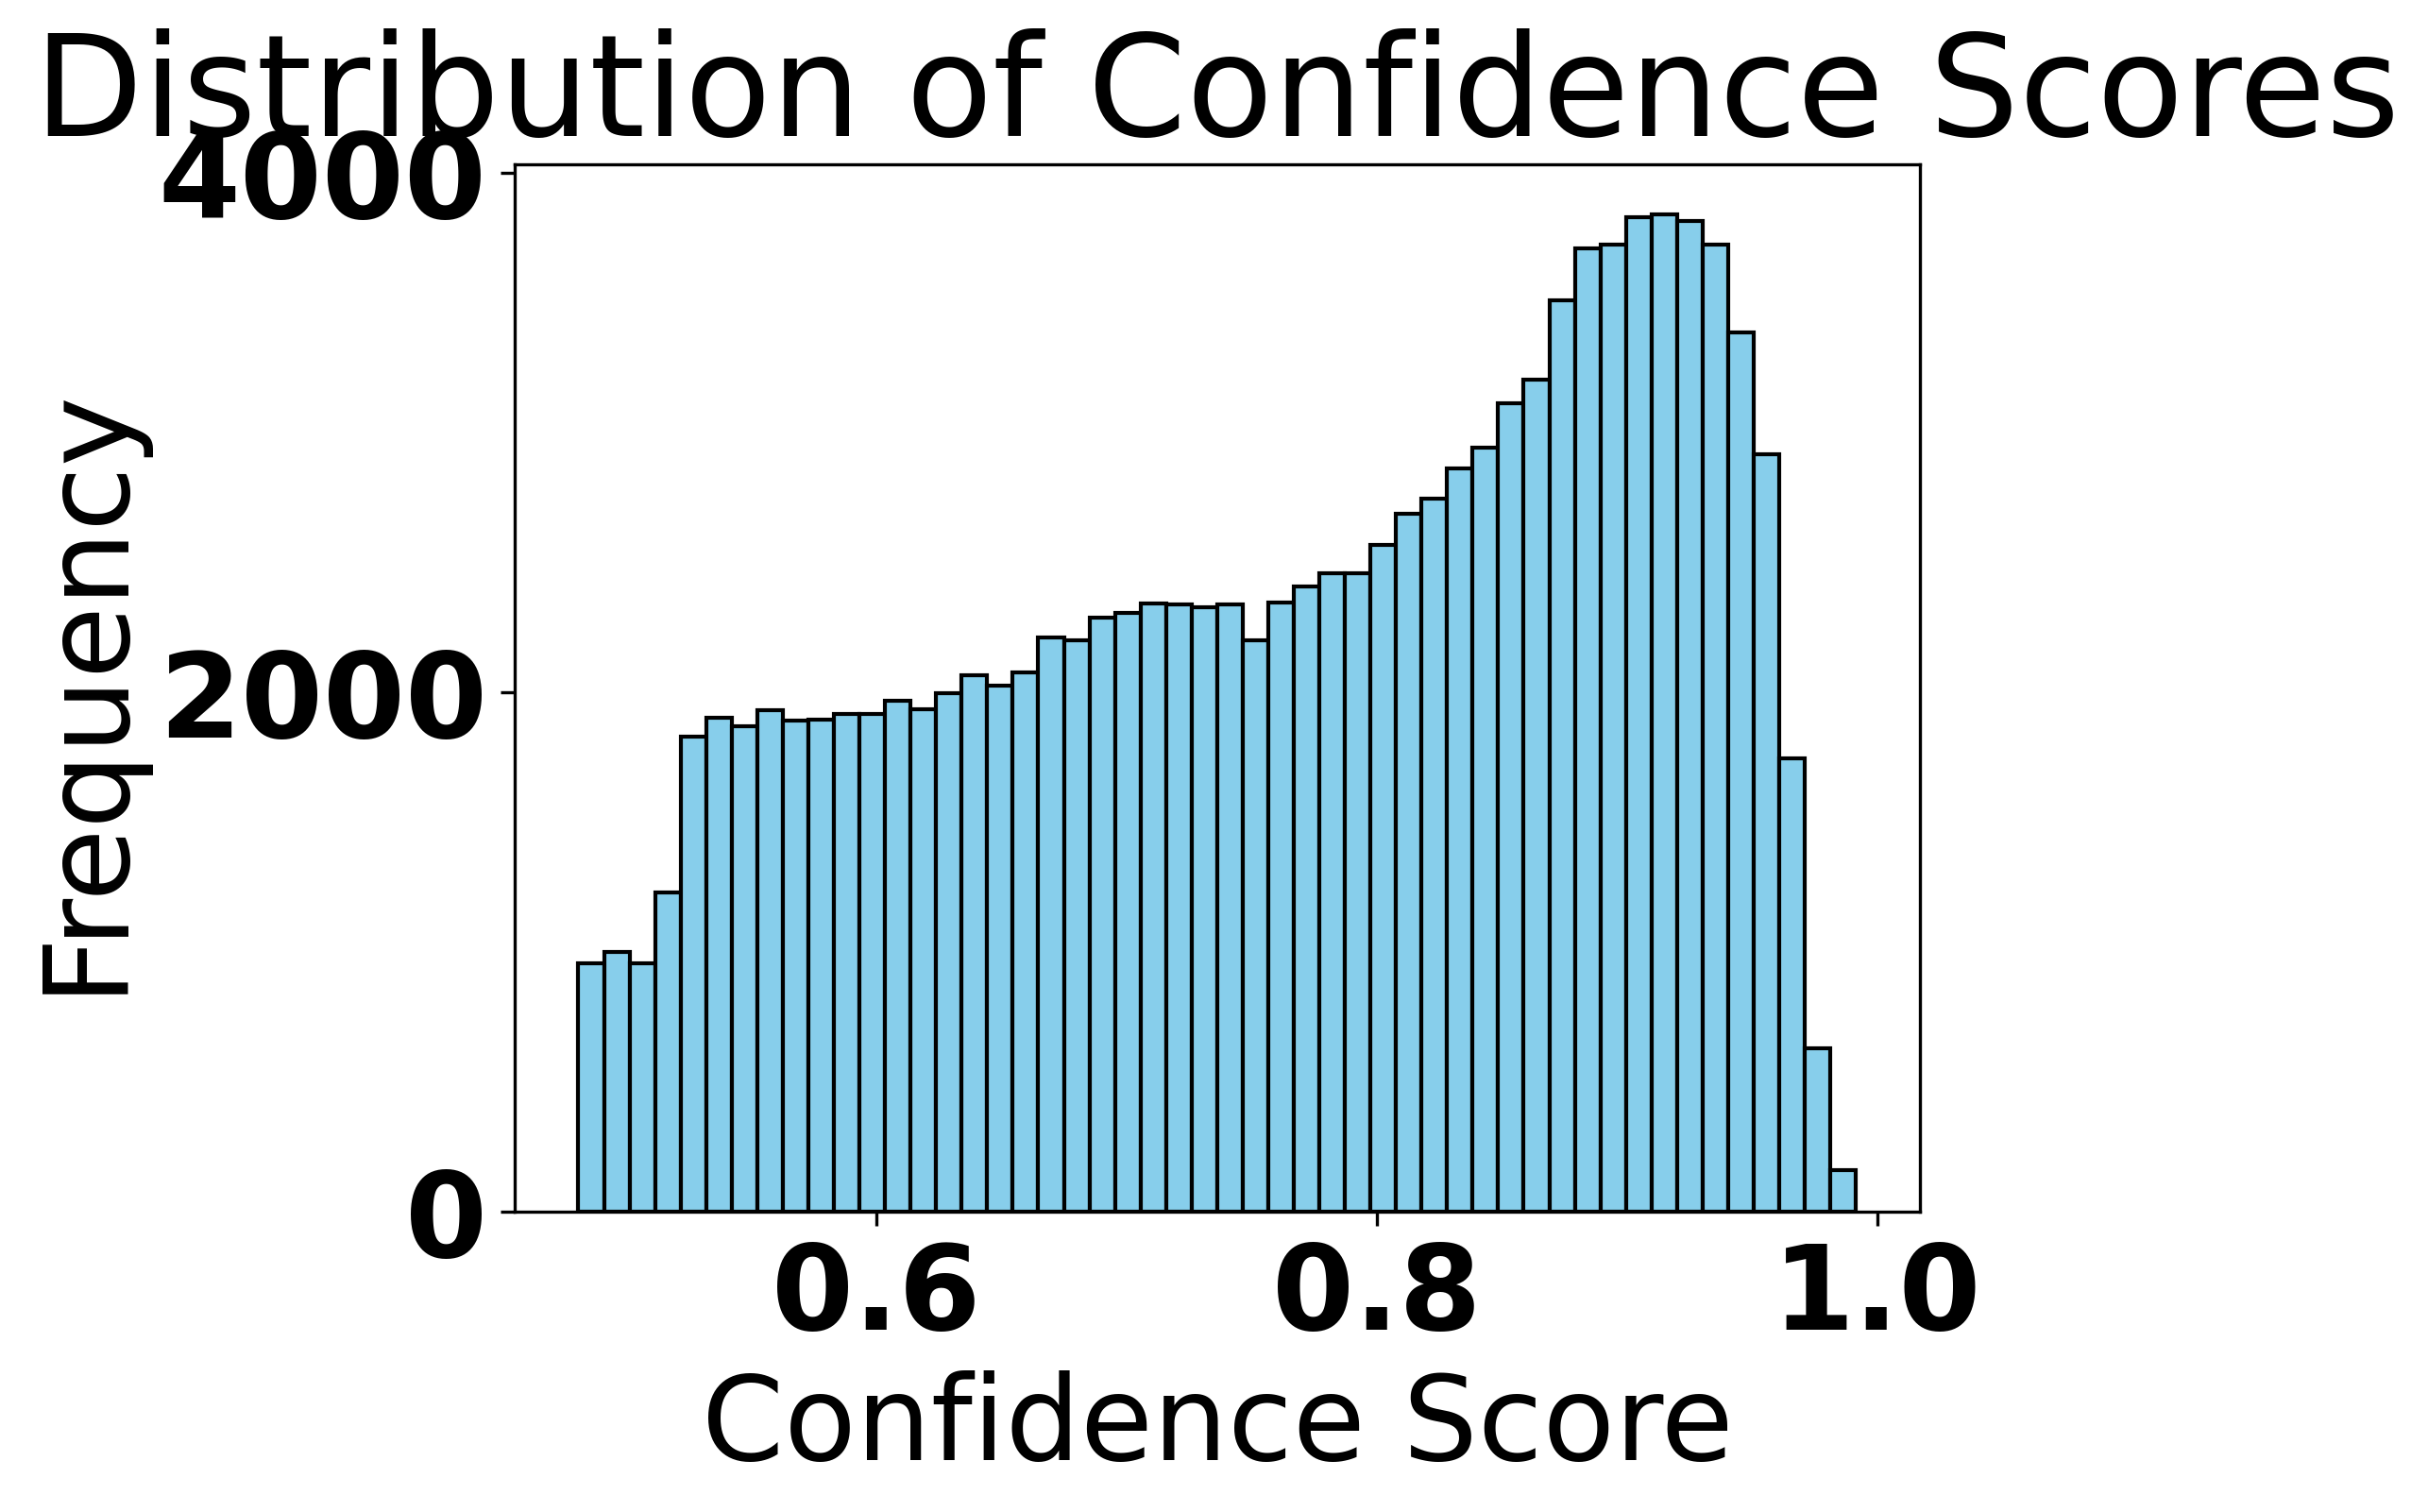

In [ ]:
# Assuming your predictions are for binary classification (0 or 1)

# Get the predicted class labels using the threshold 0.519
y_pred_class = np.where(y_pred_prob > 0.519, 1, 0)

# Extract the confidence scores for the predicted class
confidence_scores = np.where(y_pred_class == 1, y_pred_prob, 1 - y_pred_prob)

# Now `confidence_scores` contains the confidence scores for each prediction
print("Confidence Scores for each prediction:")
print(confidence_scores)

# To visualize the distribution of confidence scores
plt.hist(confidence_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step
Adjusted Confidence Scores for each prediction:
[[0.82480507]
 [0.56761369]
 [0.56055074]
 ...
 [0.03308981]
 [0.82268945]
 [0.79458062]]
Confusion Matrix:
[[84174 25831]
 [ 1243  5420]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.77      0.86    110005
     Class 1       0.17      0.81      0.29      6663

    accuracy                           0.77    116668
   macro avg       0.58      0.79      0.57    116668
weighted avg       0.94      0.77      0.83    116668



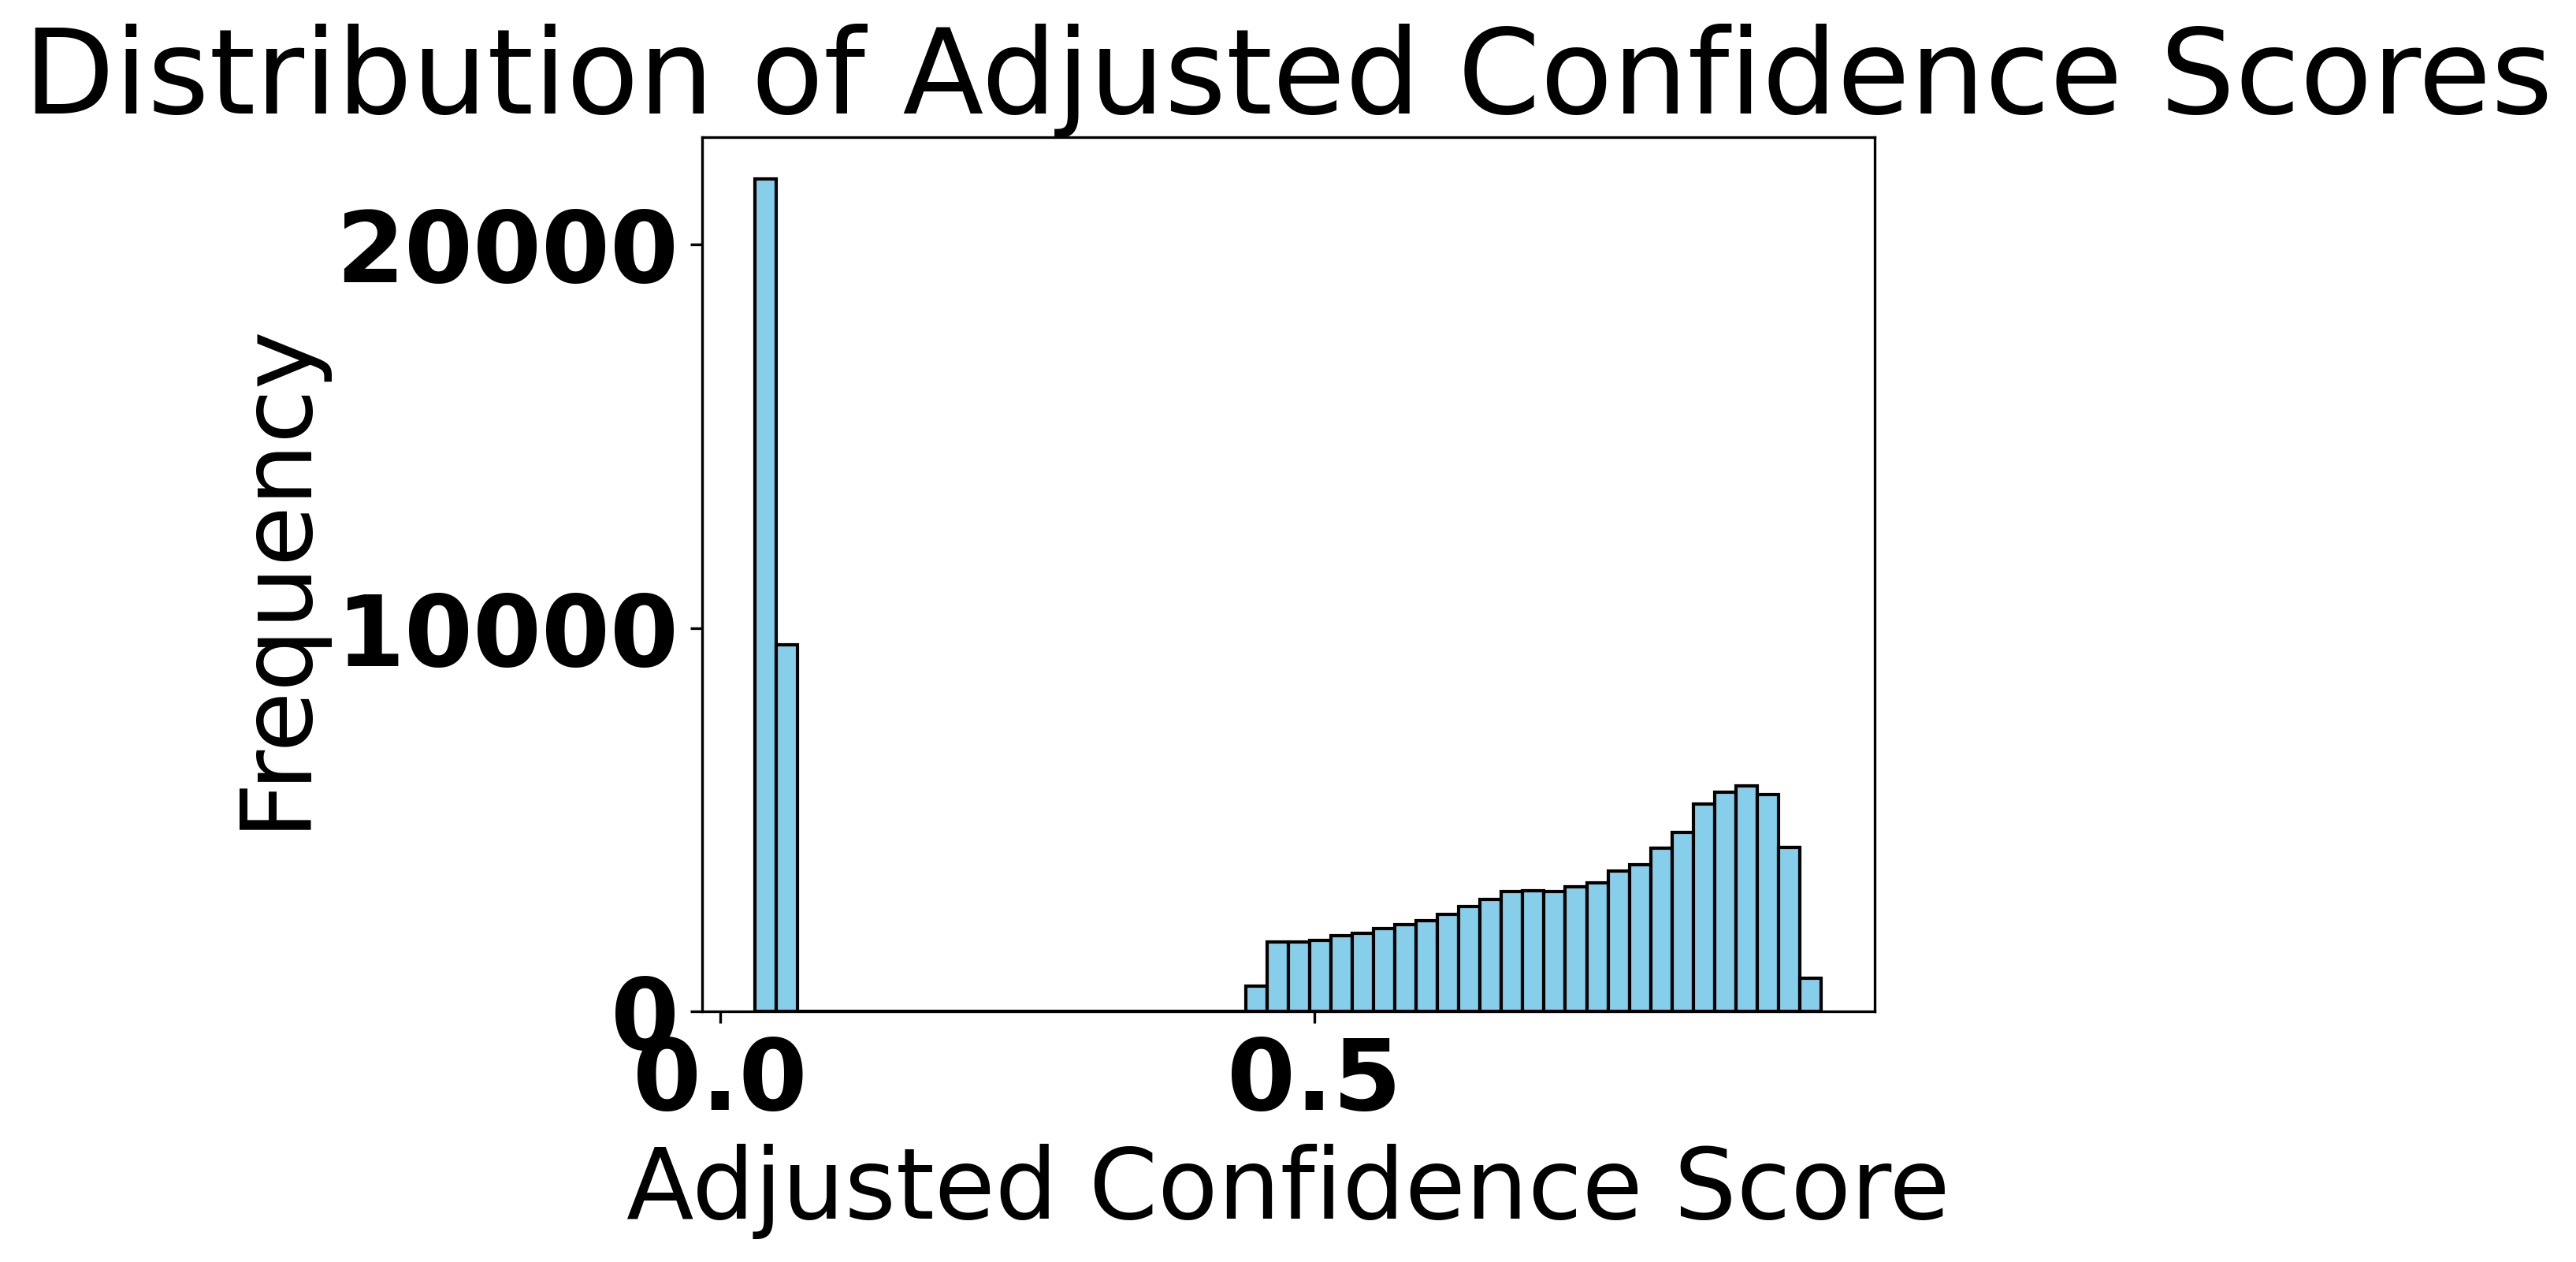

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have already loaded your model and test data
# model = load_model('/path/to/your/model.h5')
# y_test should already be available as your true labels for the test set

# Example: Getting the predicted probabilities from the model
y_pred_prob = novel_model_instance.predict(x_test)

# Step 1: Get the predicted class labels using the threshold (e.g., 0.519)
threshold = 0.519
y_pred_class = np.where(y_pred_prob > threshold, 1, 0)

# Step 2: Extract the confidence scores for the predicted class
confidence_scores = np.where(y_pred_class == 1, y_pred_prob, 1 - y_pred_prob)

# Step 3: Calculate the sample ratio for both classes
n_class_0 = np.sum(y_test == 0)
n_class_1 = np.sum(y_test == 1)

total_samples = len(y_test)
sample_ratio_class_0 = n_class_0 / total_samples
sample_ratio_class_1 = n_class_1 / total_samples

# Step 4: Adjust confidence scores based on sample ratio
adjusted_confidence_scores = confidence_scores * np.where(y_pred_class == 1, sample_ratio_class_1, sample_ratio_class_0)

# Now `adjusted_confidence_scores` contains the weighted confidence scores
print("Adjusted Confidence Scores for each prediction:")
print(adjusted_confidence_scores)

# Optionally, print confusion matrix and classification report
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred_class, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Step 5: Visualize the distribution of adjusted confidence scores
plt.hist(adjusted_confidence_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Adjusted Confidence Scores')
plt.xlabel('Adjusted Confidence Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate the mean confidence score for all predictions
mean_confidence = np.mean(confidence_scores)
print(f"Mean Confidence Score: {mean_confidence:.2f}")

# Calculate mean confidence for each class
mean_confidence_class_0 = np.mean(confidence_scores[y_pred_class == 0])
mean_confidence_class_1 = np.mean(confidence_scores[y_pred_class == 1])
print(f"Mean Confidence Score for Class 0: {mean_confidence_class_0:.2f}")
print(f"Mean Confidence Score for Class 1: {mean_confidence_class_1:.2f}")

Mean Confidence Score: 0.77
Mean Confidence Score for Class 0: 0.77
Mean Confidence Score for Class 1: 0.74


In [ ]:
# Calculate the mean confidence score for all predictions
mean_confidence = np.mean(confidence_scores)
print(f"Mean Confidence Score: {mean_confidence:.2f}")

# Calculate mean confidence for each class
mean_confidence_class_0 = np.mean(confidence_scores[y_pred_class == 0])
mean_confidence_class_1 = np.mean(confidence_scores[y_pred_class == 1])
print(f"Mean Confidence Score for Class 0: {mean_confidence_class_0:.2f}")
print(f"Mean Confidence Score for Class 1: {mean_confidence_class_1:.2f}")

Mean Confidence Score: 0.77
Mean Confidence Score for Class 0: 0.77
Mean Confidence Score for Class 1: 0.74


In [ ]:
import numpy as np
from scipy import stats

# Assuming confidence_scores is a NumPy array
confidence_scores = np.array(confidence_scores)  # Ensure it's an array

# Calculate the mean confidence score
mean_confidence = np.mean(confidence_scores)

# Calculate the standard error of the mean (SEM)
sem = stats.sem(confidence_scores)

# Calculate the 95% confidence interval
confidence_interval = sem * stats.t.ppf((1 + 0.95) / 2., len(confidence_scores) - 1)  # Using t-distribution

# Calculate lower and upper bounds for the confidence interval
lower_bound = mean_confidence - confidence_interval
upper_bound = mean_confidence + confidence_interval

# Print the mean confidence score and the confidence interval
print(f"Mean Confidence Score: {mean_confidence:.2f}")
print(f"95% Confidence Interval for Mean Confidence Score: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean Confidence Score: 0.77


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
import numpy as np
from scipy import stats

# Assuming confidence_scores is a NumPy array
confidence_scores = np.array(confidence_scores)  # Ensure it's an array

# Calculate the mean confidence score
mean_confidence = np.mean(confidence_scores)

# Calculate the standard error of the mean (SEM)
sem = stats.sem(confidence_scores)

# Calculate the 95% confidence interval
confidence_interval = sem * stats.t.ppf((1 + 0.95) / 2., len(confidence_scores) - 1)  # Using t-distribution

# Calculate lower and upper bounds for the confidence interval
lower_bound = mean_confidence - confidence_interval
upper_bound = mean_confidence + confidence_interval

# Print the mean confidence score and the confidence interval
print(f"Mean Confidence Score: {mean_confidence:.2f}")
print(f"95% Confidence Interval for Mean Confidence Score: [{lower_bound:.2f}, {upper_bound:.2f}]")

Mean Confidence Score: 0.77


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import numpy as np
from sklearn.utils import class_weight
import time

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model


# Create the novel model
input_shape = (x_train.shape[1], 1)
novel_model_instance = novel_improved_model(input_shape)

# Compile the model
novel_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Start timing the training
start_time = time.time()

# Set an initial factor for class weight increase
factor = 1

# Train the novel model for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    novel_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# End timing the training
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Evaluate the novel model
start_time = time.time()
loss, accuracy = novel_model_instance.evaluate(x_test, y_test)
testing_time = time.time() - start_time
print("Testing Time:", testing_time, "seconds")

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1962/1962 [==============================] - 21s 11ms/step - loss: 0.8629 - accuracy: 0.7964 - val_loss: 0.3824 - val_accuracy: 0.8286
Training Time: 319.54075288772583 seconds
3646/3646 [==============================] - 11s 3ms/step - loss: 0.3824 - accuracy: 0.8286
Testing Time: 11.084185600280762 seconds
Test Loss: 0.382353812456131
Test Accuracy: 0.8286248445510864


In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the novel model
input_shape = (x_train.shape[1], 1)
novel_model_instance = novel_improved_model(input_shape)

# Compile the model
novel_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the novel model for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    novel_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# Evaluate the novel model
loss, accuracy = novel_model_instance.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

1962/1962 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7637 - loss: 0.5067 - val_accuracy: 0.7347 - val_loss: 0.5605
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7863 - loss: 0.5222 - val_accuracy: 0.7462 - val_loss: 0.5256
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7910 - loss: 0.5588 - val_accuracy: 0.7814 - val_loss: 0.4651
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7933 - loss: 0.5975 - val_accuracy: 0.6856 - val_loss: 0.6373
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7886 - loss: 0.6519 - val_accuracy: 0.7766 - val_loss: 0.5020
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7915 - loss: 0.6952 - val_accuracy: 0.8312 - val_loss: 0.3646
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7942 - loss: 0.7345 - val_accuracy: 0.7105 - val_loss: 0.5804
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7912 - loss: 0.7870 - val_accuracy: 0.8059 - val_loss: 0.4322
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step
Normalized Confusion Matrix:
[[0.82154448 0.17845552]
 [0.23983191 0.76016809]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.82      0.89    110005
     Class 1       0.21      0.76      0.32      6663

    accuracy                           0.82    116668
   macro avg       0.59      0.79      0.61    116668
weighted avg       0.94      0.82      0.86    116668



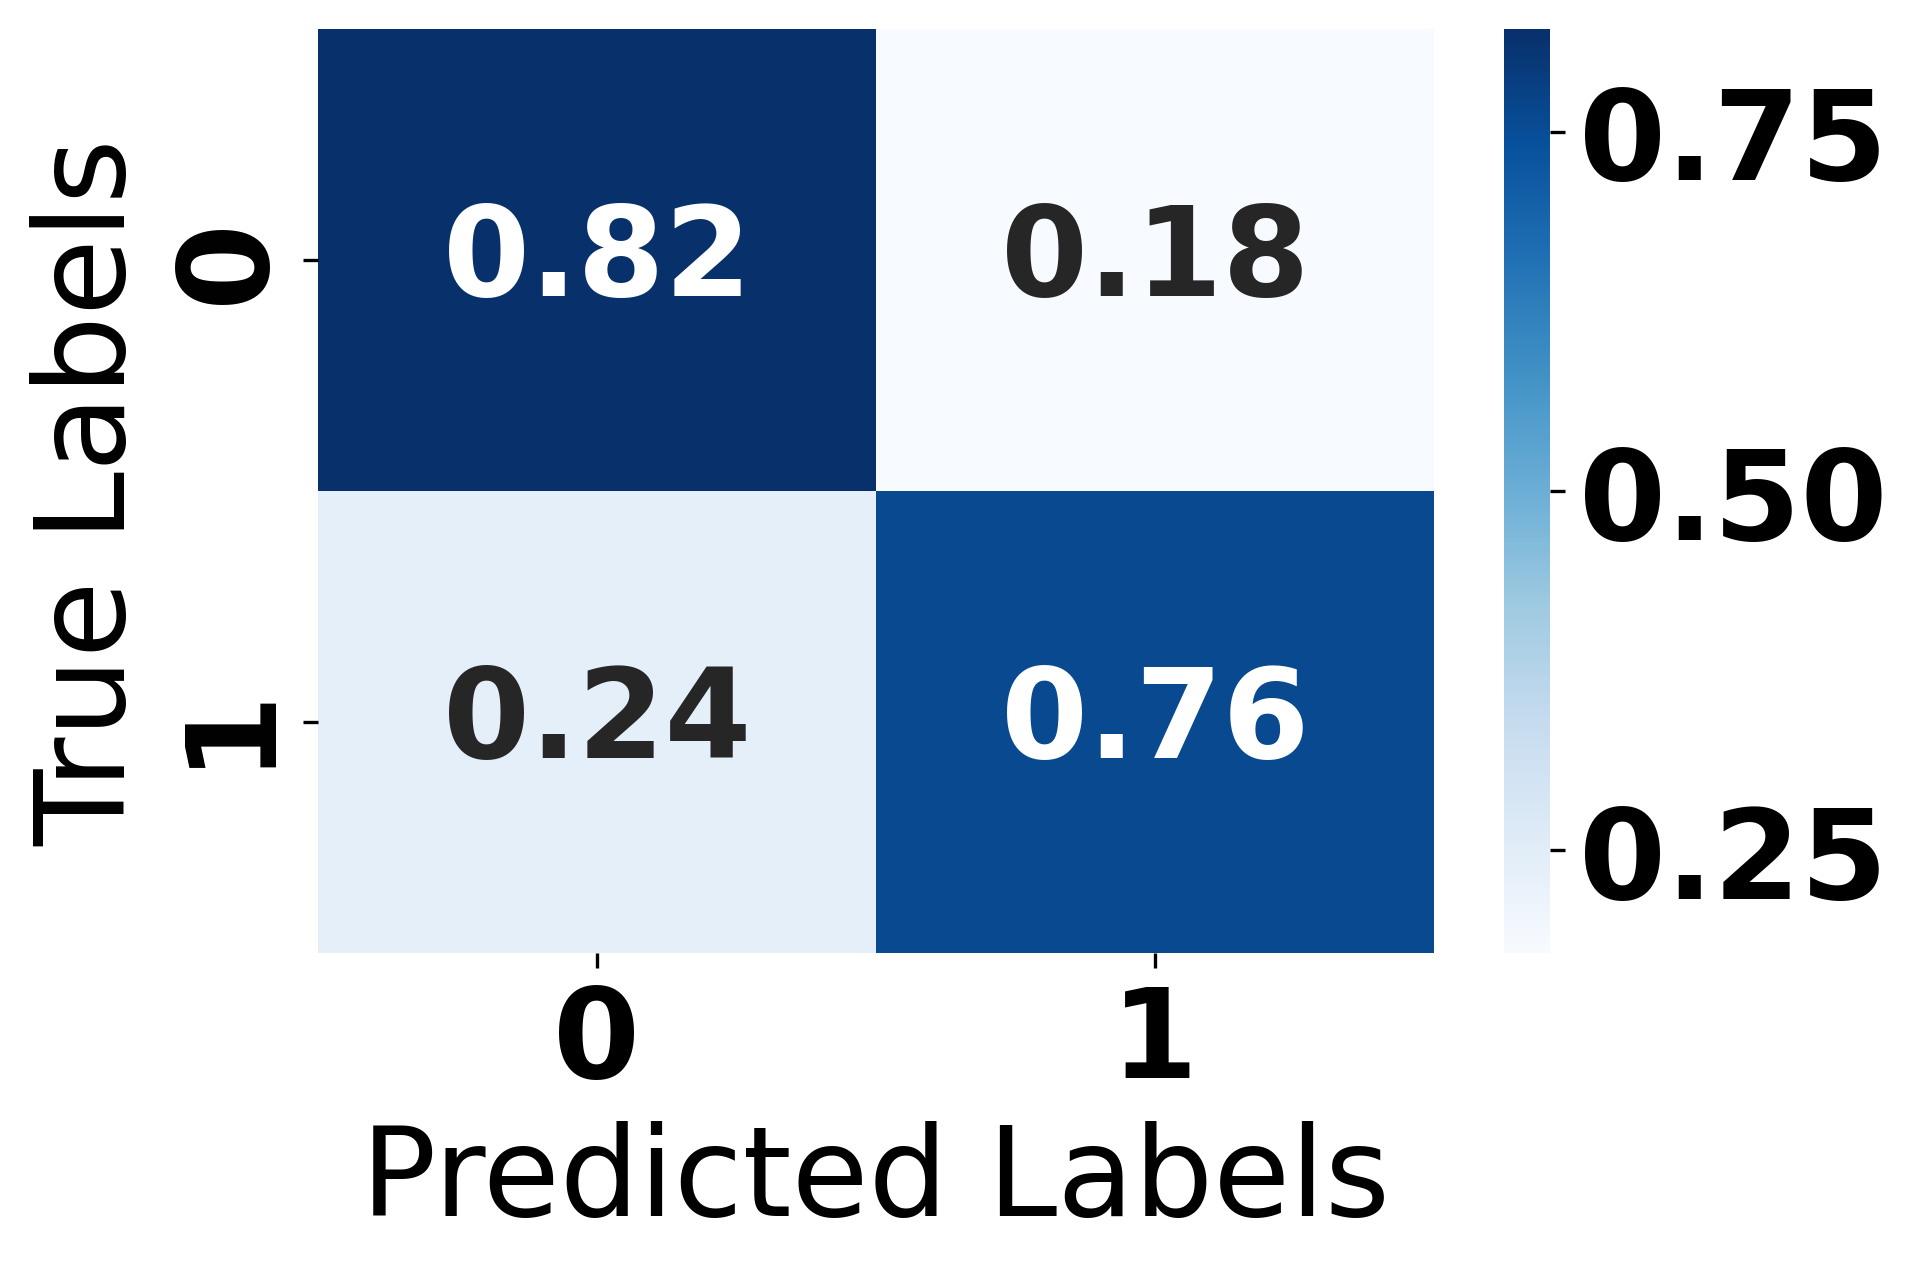

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.519, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

In [ ]:
# Display model summary
novel_model_instance.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 33, 1)]              0         []                            
                                                                                                  
 conv1d_15 (Conv1D)          (None, 33, 64)               256       ['input_6[0][0]']             
                                                                                                  
 conv1d_16 (Conv1D)          (None, 33, 64)               12352     ['conv1d_15[0][0]']           
                                                                                                  
 conv1d_17 (Conv1D)          (None, 33, 64)               12352     ['conv1d_16[0][0]']           
                                                                                            

# Fedarated Learning

In [ ]:
pip install --quiet --upgrade tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.6/721.6 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.9/230.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
pip install --quiet --upgrade tensorflow-model-optimization

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 6.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-federated 0.85.0 requires tensorflow-model-optimization==0.7.5, but you have tensorflow-model-optimization 0.8.0 which is incompatible.


In [ ]:
pip install --upgrade scipy tensorflow tensorflow-federated

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 3.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tensorflow-federated to determine which version is compatible with other requirements. This could take a while.
  Using cached tensorflow_federated-0.85.0-py3-none-manylinux_2_31_x86_64.whl.metadata (19 kB)
  Using cached tensorflow_model_optimization-0.7.5-py2.py3-none-any.whl.metadata (914 bytes)
  Using cached tensorflow-2.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached ml_dtypes-0.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached tensorboard-2.14.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached keras-2.14.0-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 MB 8.1 MB/s eta 0:00:00
Using cached tensorflow-2.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (489.9 MB)
Using cached ml_dtypes-0.2.0-cp310-cp310-manyli

In [ ]:
pip install --upgrade tensorflow

  Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
Using cached tensorflow-2.17.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (601.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 1.5 MB/s eta 0:00:00
Using cached ml_dtypes-0.4.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling 

In [ ]:
!python --version

Python 3.10.12


### Tensor

In [ ]:
"""
import tensorflow as tf
import tensorflow_federated as tff
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model

# Number of clients
num_clients = 5

# Convert x_train and y_train to DataFrame and Series, respectively
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train, name='Cognition Dysfunction')

# Combine x_train_df and y_train_series into a single DataFrame
train_data = pd.concat([x_train_df, y_train_series], axis=1)

# Shuffle the dataset to ensure randomness
train_data = train_data.sample(frac=1).reset_index(drop=True)

# Split the dataset into parts for each client
client_datasets = np.array_split(train_data, num_clients)

# Separate the features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1)
    y_client = client_datasets[i]['Cognition Dysfunction']
    client_data.append((x_client, y_client))

# Function to create the model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Function to compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Convert to TFF model
def model_fn():
    keras_model = create_compiled_keras_model()
    return tff.learning.from_keras_model(
        keras_model,
        input_spec=client_data_fn(0).element_spec,
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[tf.keras.metrics.BinaryAccuracy()])

# Create a TFF client data function to yield data for each client
def client_data_fn(client_id):
    x_client, y_client = client_data[client_id]
    x_client = x_client.values[..., np.newaxis]
    return tf.data.Dataset.from_tensor_slices((x_client, y_client)).batch(32)

# Simulate federated datasets for each client
federated_train_data = [client_data_fn(client_id) for client_id in range(num_clients)]

# Federated training process using TFF
iterative_process = tff.learning.build_federated_averaging_process(
    model_fn=model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.SGD(learning_rate=1.0)
)

# Initialize the federated learning process
state = iterative_process.initialize()

# Training over multiple rounds
for round_num in range(10):
    state, metrics = iterative_process.next(state, federated_train_data)
    print(f'Round {round_num+1}, metrics={metrics}')

# Evaluate the global model on test data
keras_model = create_compiled_keras_model()
keras_model.set_weights(iterative_process.get_model_weights(state))

loss, accuracy = keras_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)
"""

'\nimport tensorflow as tf\nimport tensorflow_federated as tff\nfrom sklearn.model_selection import train_test_split\nfrom tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape\nfrom tensorflow.keras.models import Model\n\n# Number of clients\nnum_clients = 5\n\n# Convert x_train and y_train to DataFrame and Series, respectively\nx_train_df = pd.DataFrame(x_train)\ny_train_series = pd.Series(y_train, name=\'Cognition Dysfunction\')\n\n# Combine x_train_df and y_train_series into a single DataFrame\ntrain_data = pd.concat([x_train_df, y_train_series], axis=1)\n\n# Shuffle the dataset to ensure randomness\ntrain_data = train_data.sample(frac=1).reset_index(drop=True)\n\n# Split the dataset into parts for each client\nclient_datasets = np.array_split(train_data, num_clients)\n\n# Separate the features and labels for each client\nclient_data = []\nfor i in range(num_clients):\n    x_client = client_dat

In [ ]:
!pip install flwr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.12.3
    Uninstalling typer-0.12.3:
      Successfully uninstalled typer-0.12.3
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


# Final Model

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-143 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-88-ec7db74abc0e>", line 90, in start_server
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/app.py", line 169, in start_server
    grpc_server = start_grpc_server(
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/superlink/fleet/grpc_bidi/grpc_server.py", line 143, in start_grpc_server
    server = generic_create_grpc_

3646/3646 [==============================] - 13s 3ms/step - loss: 0.6901 - accuracy: 0.7519
Test Loss: 0.6900671124458313
Test Accuracy: 0.751885712146759
3646/3646 [==============================] - 12s 3ms/step
Normalized Confusion Matrix:
[[0.7552384  0.2447616 ]
 [0.30346691 0.69653309]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.76      0.85    110005
     Class 1       0.15      0.70      0.24      6663

    accuracy                           0.75    116668
   macro avg       0.56      0.73      0.55    116668
weighted avg       0.93      0.75      0.82    116668



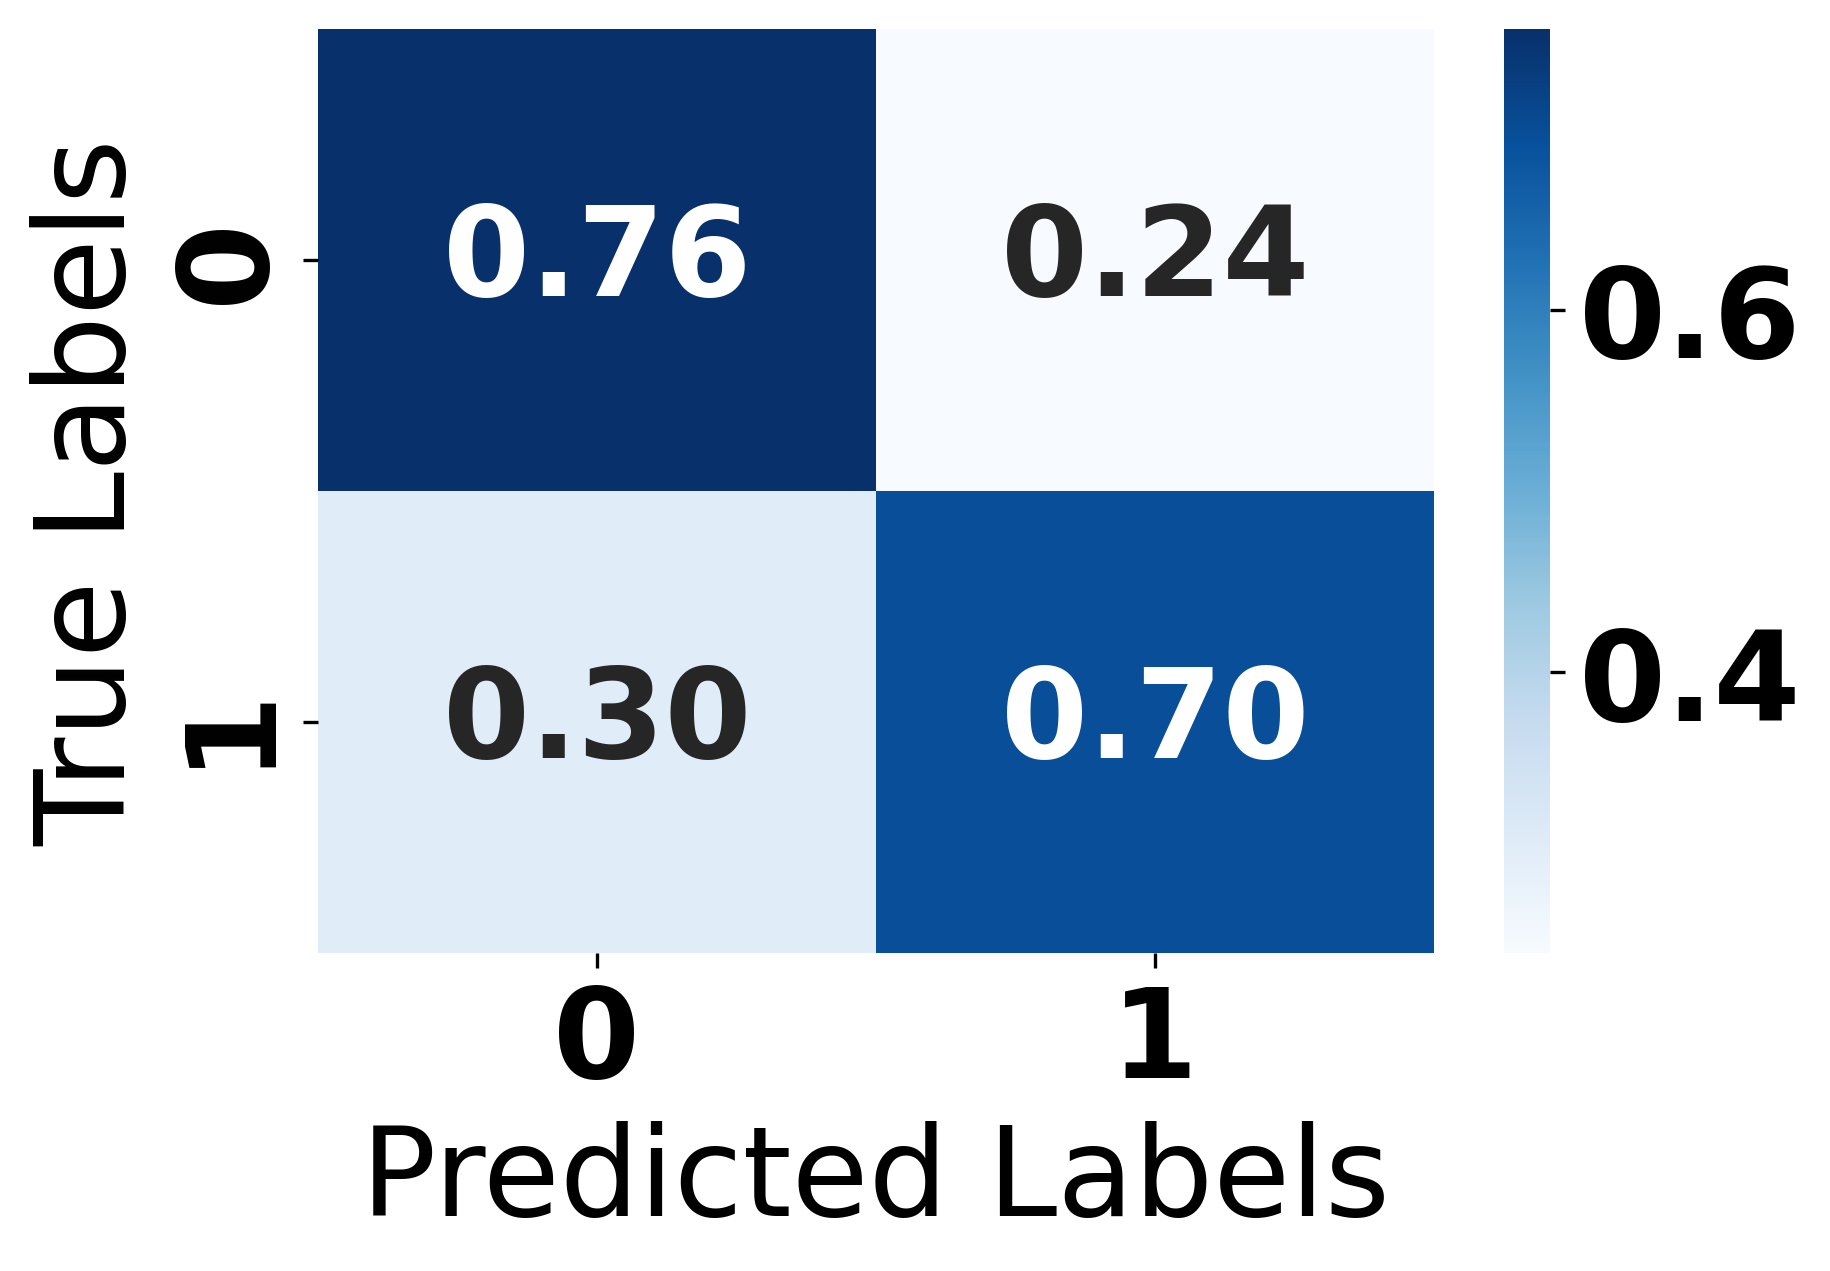

In [ ]:
# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 5
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl

def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=32, verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        return loss, len(self.x_train), {"accuracy": accuracy}

import flwr as fl

def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

def start_client(client_id):
    client = FlowerClient(client_data[client_id][0], client_data[client_id][1])
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# Create and compile the model
model = create_compiled_keras_model()

# Load the final model weights (implement according to your setup)
# This typically involves fetching the final model from the server

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Setting `min_available_clients` lower than `min_fit_clients` or
`min_evaluate_clients` can cause the server to fail when there are too few clients
connected to the server. `min_available_clients` must be set to a value larger
than or equal to the values of `min_fit_clients` and `min_evaluate_clients`.

Setting `min_available_clients` lower than `min_fit_clients` or
`min_evaluate_clients` can cause the server to fail when there are too few clients
connected to the server. `min_available_clients` must be set to a value larger
than or equal to the values of `min_fit_clients` and `min_evaluate_clients`.

INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-121 (sta

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.3224 - loss: 0.8016
Test Loss: 0.8015431761741638
Test Accuracy: 0.3223934471607208
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Normalized Confusion Matrix:
[[0.31271306 0.68728694]
 [0.51778478 0.48221522]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.31      0.47    110005
     Class 1       0.04      0.48      0.08      6663

    accuracy                           0.32    116668
   macro avg       0.47      0.40      0.27    116668
weighted avg       0.86      0.32      0.44    116668



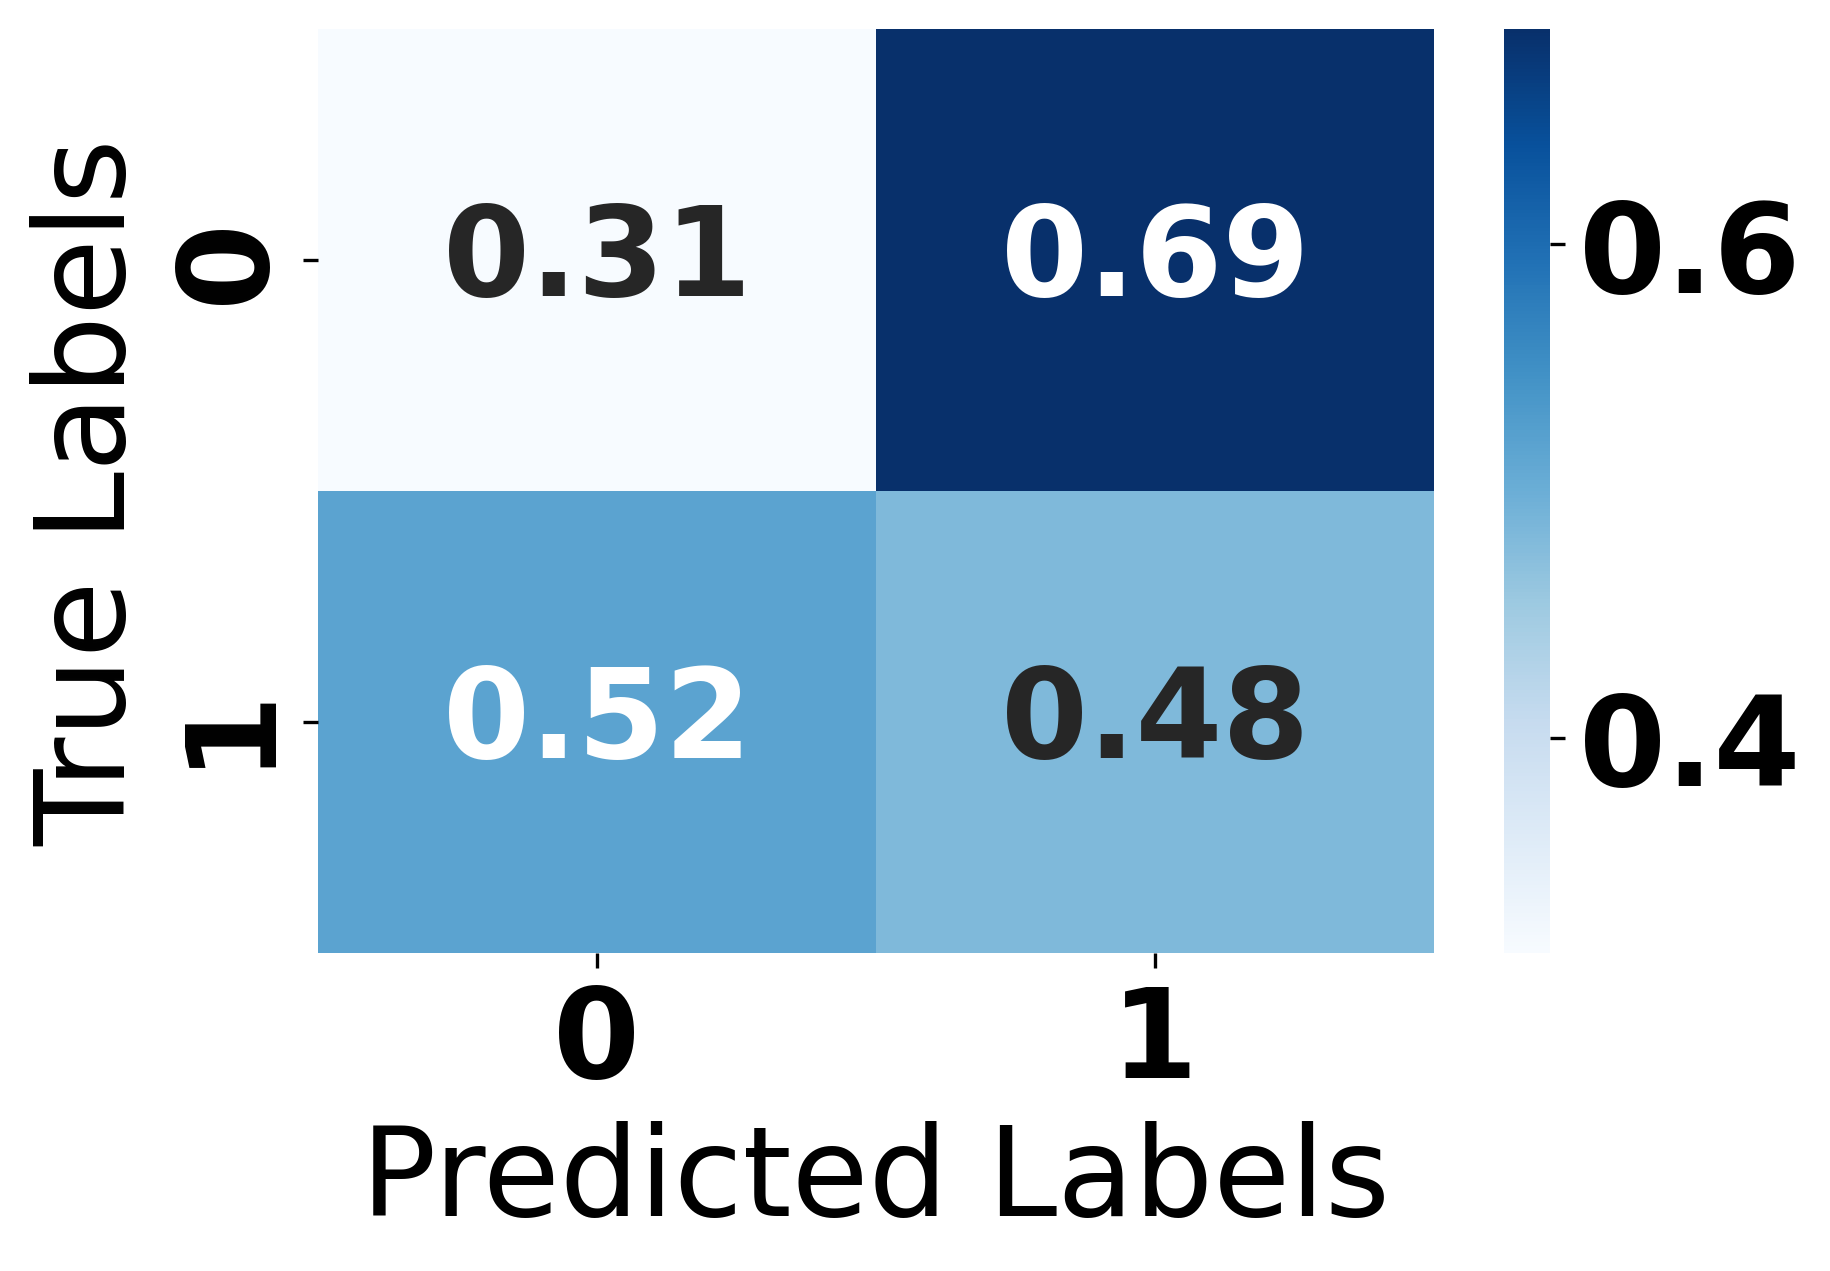

In [ ]:
# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl

def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=32, verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        return loss, len(self.x_train), {"accuracy": accuracy}

import flwr as fl

def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

def start_client(client_id):
    client = FlowerClient(client_data[client_id][0], client_data[client_id][1])
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# Create and compile the model
model = create_compiled_keras_model()

# Load the final model weights (implement according to your setup)
# This typically involves fetching the final model from the server

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-69 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-26-ec7db74abc0e>", line 90, in start_server
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/app.py", line 169, in start_server
    grpc_server = start_grpc_server(
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/superlink/fleet/grpc_bidi/grpc_server.py", line 143, in start_grpc_server
    server = generic_create_grpc_s

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - accuracy: 0.9296 - loss: 0.2627
Test Loss: 0.26318538188934326
Test Accuracy: 0.9287551045417786
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Normalized Confusion Matrix:
[[0.98388255 0.01611745]
 [0.98138976 0.01861024]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96    110005
     Class 1       0.07      0.02      0.03      6663

    accuracy                           0.93    116668
   macro avg       0.50      0.50      0.50    116668
weighted avg       0.89      0.93      0.91    116668



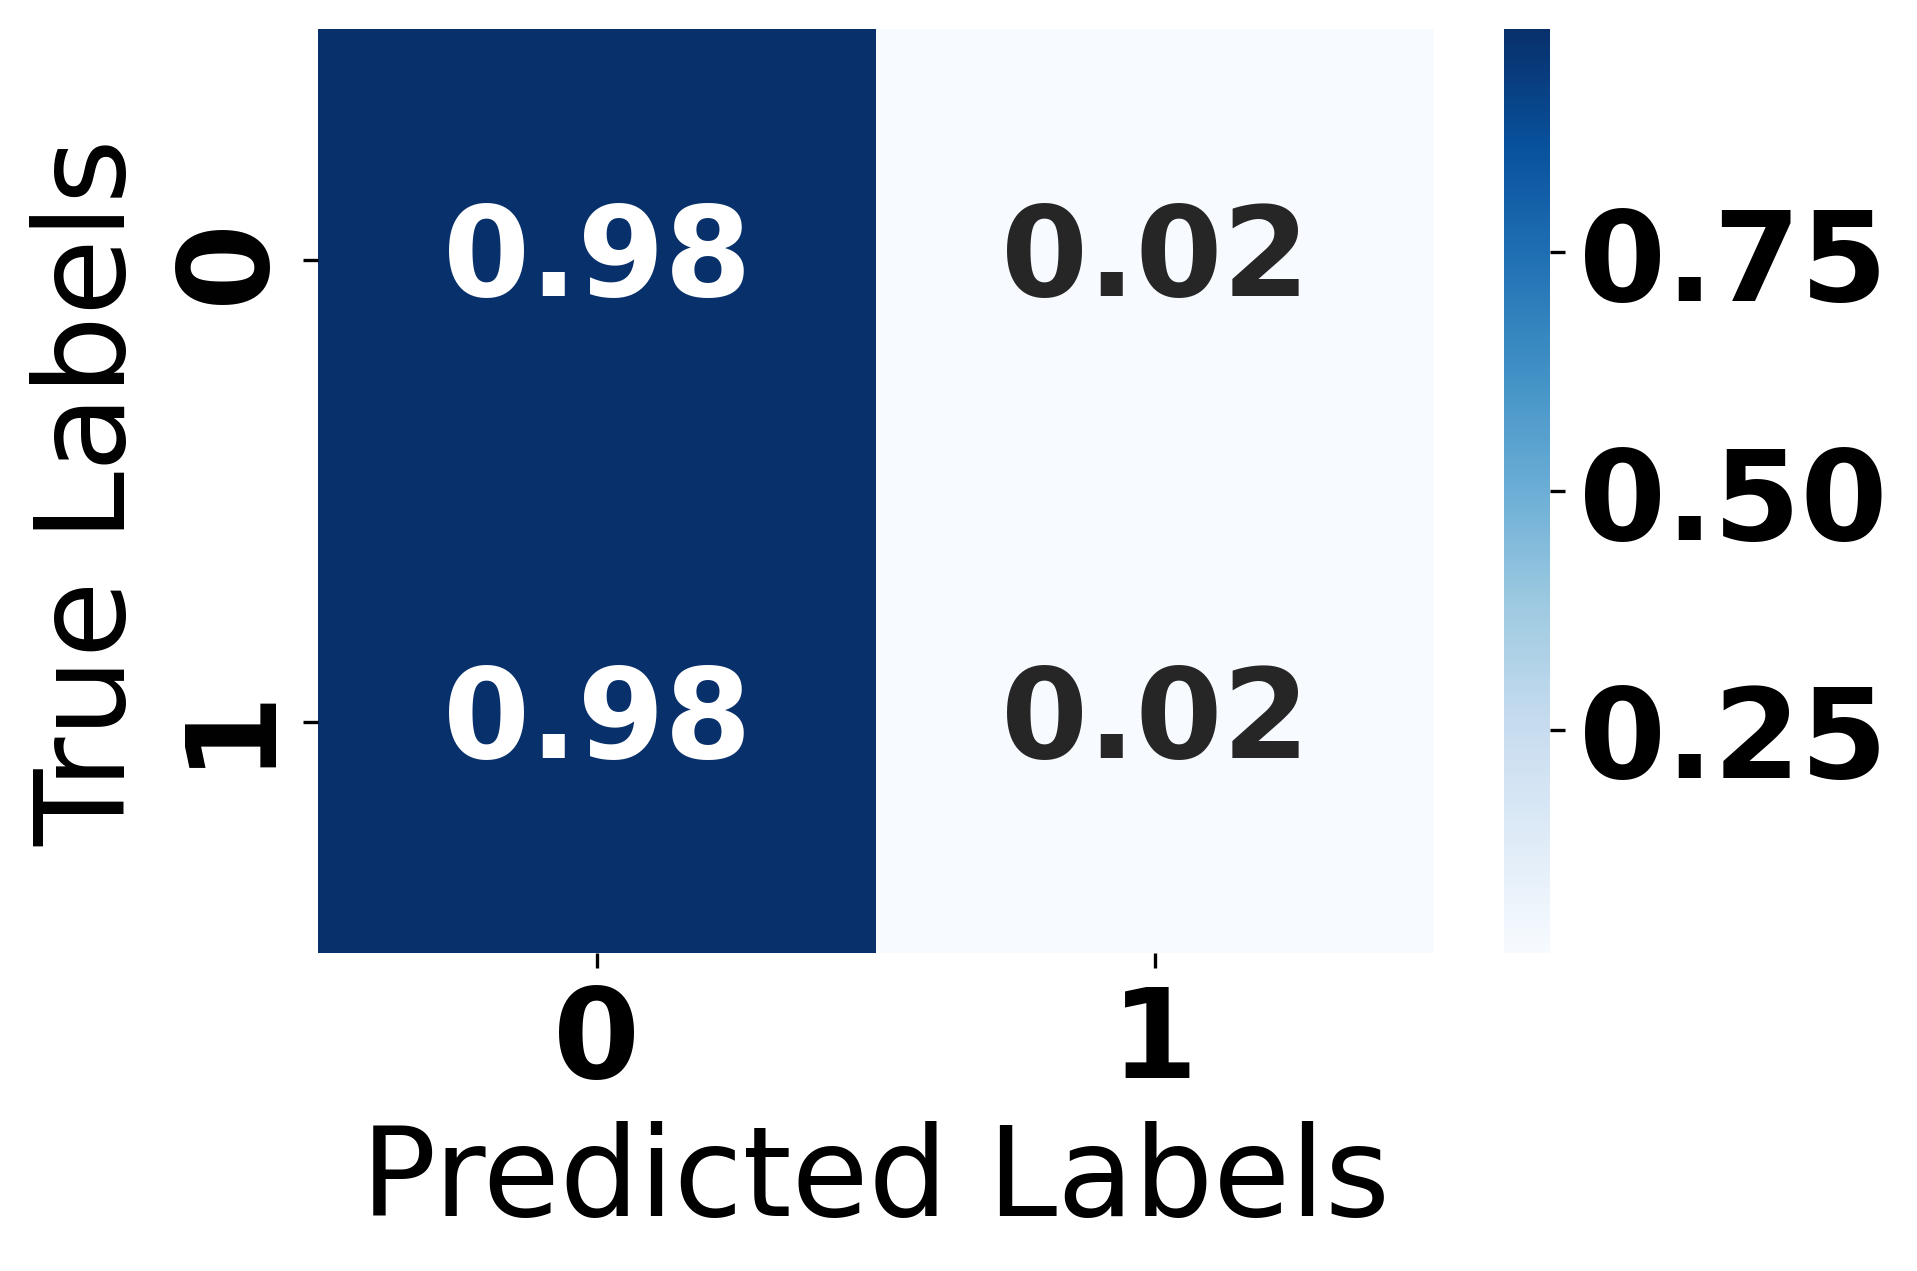

In [ ]:
# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 5
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl

def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=32, verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        return loss, len(self.x_train), {"accuracy": accuracy}

import flwr as fl

def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

def start_client(client_id):
    client = FlowerClient(client_data[client_id][0], client_data[client_id][1])
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# Create and compile the model
model = create_compiled_keras_model()

# Load the final model weights (implement according to your setup)
# This typically involves fetching the final model from the server

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl

def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=32, verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        return loss, len(self.x_train), {"accuracy": accuracy}

import flwr as fl

def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

def start_client(client_id):
    client = FlowerClient(client_data[client_id][0], client_data[client_id][1])
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# Create and compile the model
model = create_compiled_keras_model()

# Load the final model weights (implement according to your setup)
# This typically involves fetching the final model from the server

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-1308 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-125-734d1014a121>", line 90, in start_server
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/app.py", line 169, in start_server
    grpc_server = start_grpc_server(
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/superlink/fleet/grpc_bidi/grpc_server.py", line 143, in start_grpc_server
    server = generic_create_grp

ValueError: The total size of the tensor must be unchanged. Received: input_shape=(64,), target_shape=(1, 32)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-1314 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-126-d3b68977d035>", line 110, in start_server
TypeError: Can't instantiate abstract class MaxFed with abstract methods configure_evaluate, configure_fit, evaluate, initialize_parameters
	Instead, use `flwr.client.start_client()` by ensuring you first call the `.to_client()` method as shown below: 
	flwr.client.start_client(
		server_address='<IP>:<PORT>',
		client=FlowerClient().to_client(), # <-- where FlowerClient is of type flwr.client.NumPyClient object
	)
	

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.2724 - loss: 1.0396
Test Loss: 1.038439154624939
Test Accuracy: 0.27398258447647095
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Normalized Confusion Matrix:
[[0.25496114 0.74503886]
 [0.41197659 0.58802341]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.25      0.40    110005
     Class 1       0.05      0.59      0.08      6663

    accuracy                           0.27    116668
   macro avg       0.48      0.42      0.24    116668
weighted avg       0.86      0.27      0.38    116668



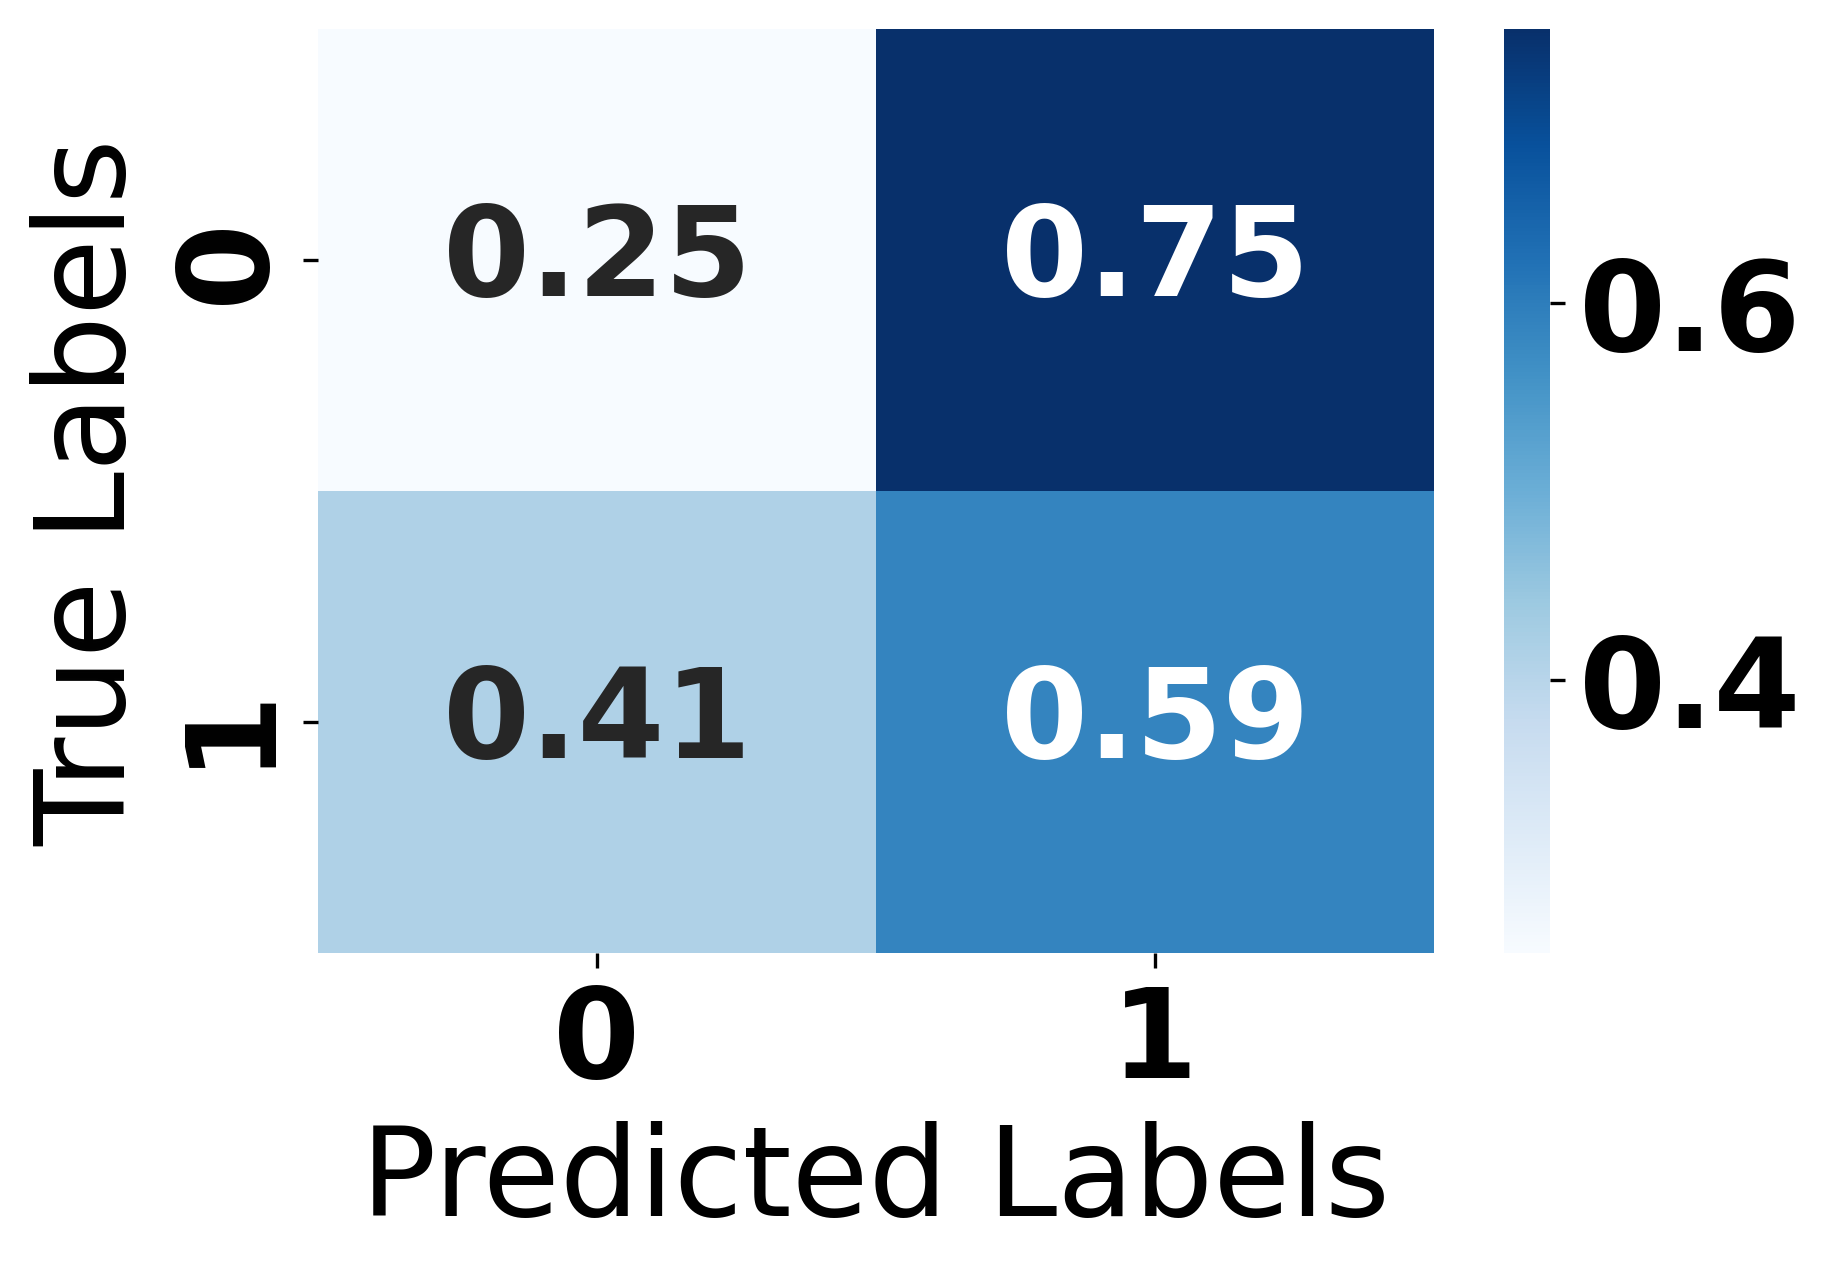

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
import threading
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 3
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define the novel improved model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define Flower client
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=32, verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_train, self.y_train, verbose=0)
        return loss, len(self.x_train), {"accuracy": accuracy}

# Define custom MaxFed strategy
class MaxFed(fl.server.strategy.Strategy):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Initialize any necessary attributes here

    def aggregate_fit(self, server_round, results, failures):
        # Implement custom aggregation logic for MaxFed
        if not results:
            return self.model.get_weights(), len(results)

        # Example logic: select the model with the highest accuracy
        best_client = max(results, key=lambda x: x[1]["accuracy"])
        return best_client[0], len(results)

    def aggregate_evaluate(self, server_round, results, failures):
        # Implement custom evaluation logic if needed
        pass

def start_server():
    strategy = MaxFed(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start server (this will block, so run in a separate cell or environment)
server_thread = threading.Thread(target=start_server)
server_thread.start()

def start_client(client_id):
    client = FlowerClient(client_data[client_id][0], client_data[client_id][1])
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# Create and compile the model
model = create_compiled_keras_model()

# Load the final model weights (implement according to your setup)
# This typically involves fetching the final model from the server

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

AC

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-24 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-20-f2dadf589ed4>", line 107, in start_server
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/app.py", line 169, in start_server
    grpc_server = start_grpc_server(
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/superlink/fleet/grpc_bidi/grpc_server.py", line 143, in start_grpc_server
    server = generic_create_grpc_

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9438 - loss: 0.2237
Test Loss: 0.22395333647727966
Test Accuracy: 0.9428892135620117
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
Normalized Confusion Matrix:
[[1. 0.]
 [1. 0.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97    110005
     Class 1       0.00      0.00      0.00      6663

    accuracy                           0.94    116668
   macro avg       0.47      0.50      0.49    116668
weighted avg       0.89      0.94      0.92    116668



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


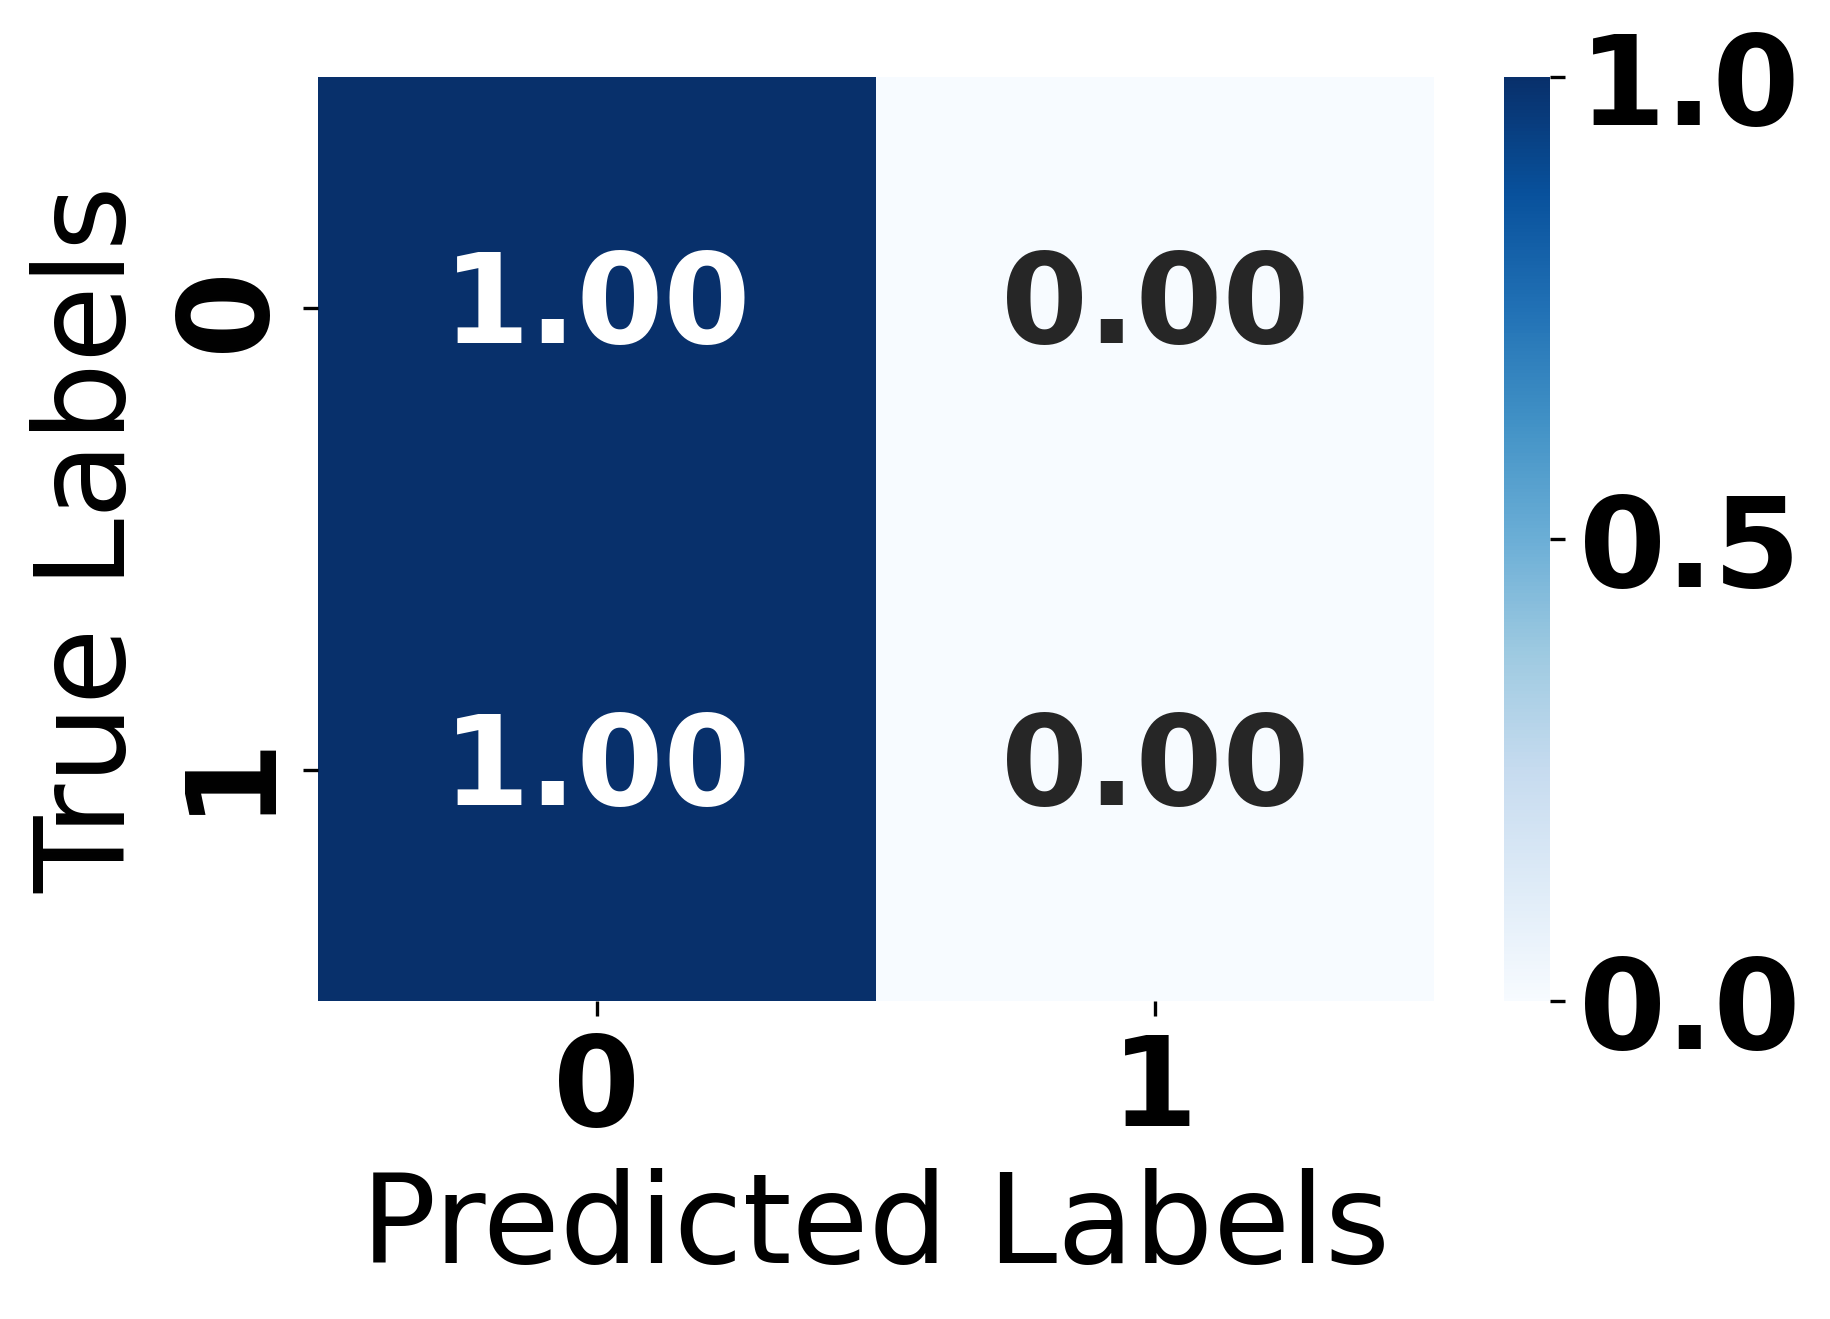

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
import flwr as fl

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 5
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.1  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start federated learning server
def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# After federated learning, load the final model weights (implement according to your setup)
# For demonstration, we'll use the model defined here directly
final_model = create_compiled_keras_model()

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-51 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-21-b4865a75552e>", line 104, in start_server
TypeError: FedProx.__init__() got an unexpected keyword argument 'pr

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.2820 - loss: 1.5104
Test Loss: 1.5100387334823608
Test Accuracy: 0.2825453281402588
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
Normalized Confusion Matrix:
[[0.26001545 0.73998455]
 [0.34549002 0.65450998]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.26      0.41    110005
     Class 1       0.05      0.65      0.09      6663

    accuracy                           0.28    116668
   macro avg       0.49      0.46      0.25    116668
weighted avg       0.88      0.28      0.39    116668



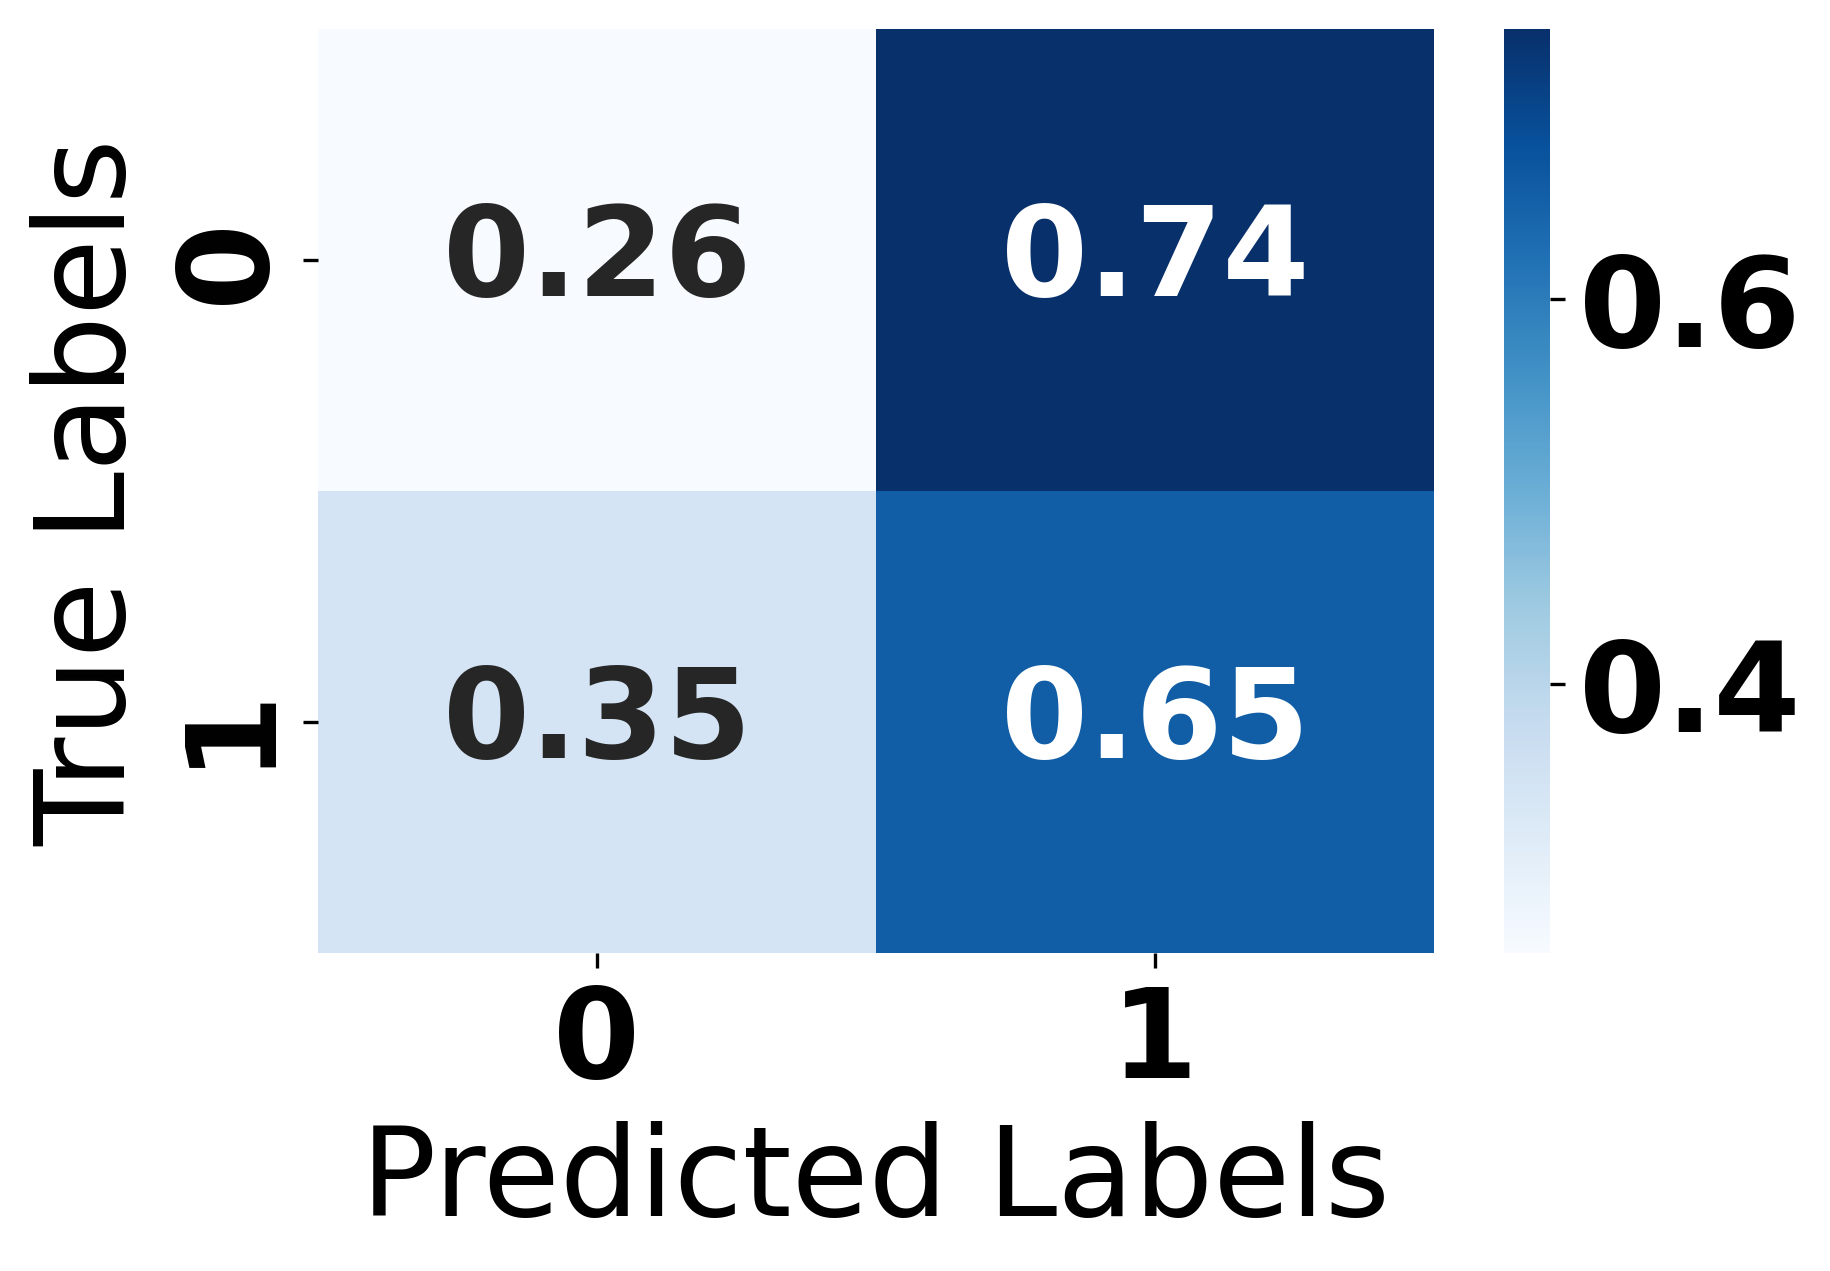

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
from sklearn.utils import class_weight

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.1  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start federated learning server using FedProx
def start_server():
    strategy = fl.server.strategy.FedProx(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        prox_alpha=0.5  # Proximal term coefficient, adjust as needed
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# After federated learning, load the final model weights (implement according to your setup)
# For demonstration, we'll use the model defined here directly
final_model = create_compiled_keras_model()

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-374 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-48-6a2f98096544>", line 105, in start_server
TypeError: FedProx.__init__() got an unexpected keyword argument 'prox_alpha'
	Instead, use `flwr.client.start_client()` by ensuring you first call the `.to_client()` method as shown below: 
	flwr.client.start_client(
		server_address='<IP>:<PORT>',
		client=FlowerClient().to_client(), # <-- where FlowerClient is of type flwr.client.NumPyClient object
	)
	Using `start_numpy_client()` is deprecated.

            This is

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.9425 - loss: 0.2837
Test Loss: 0.28539538383483887
Test Accuracy: 0.9413464069366455
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step
Normalized Confusion Matrix:
[[0.99806372 0.00193628]
 [0.99504728 0.00495272]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      1.00      0.97    110005
     Class 1       0.13      0.00      0.01      6663

    accuracy                           0.94    116668
   macro avg       0.54      0.50      0.49    116668
weighted avg       0.90      0.94      0.91    116668



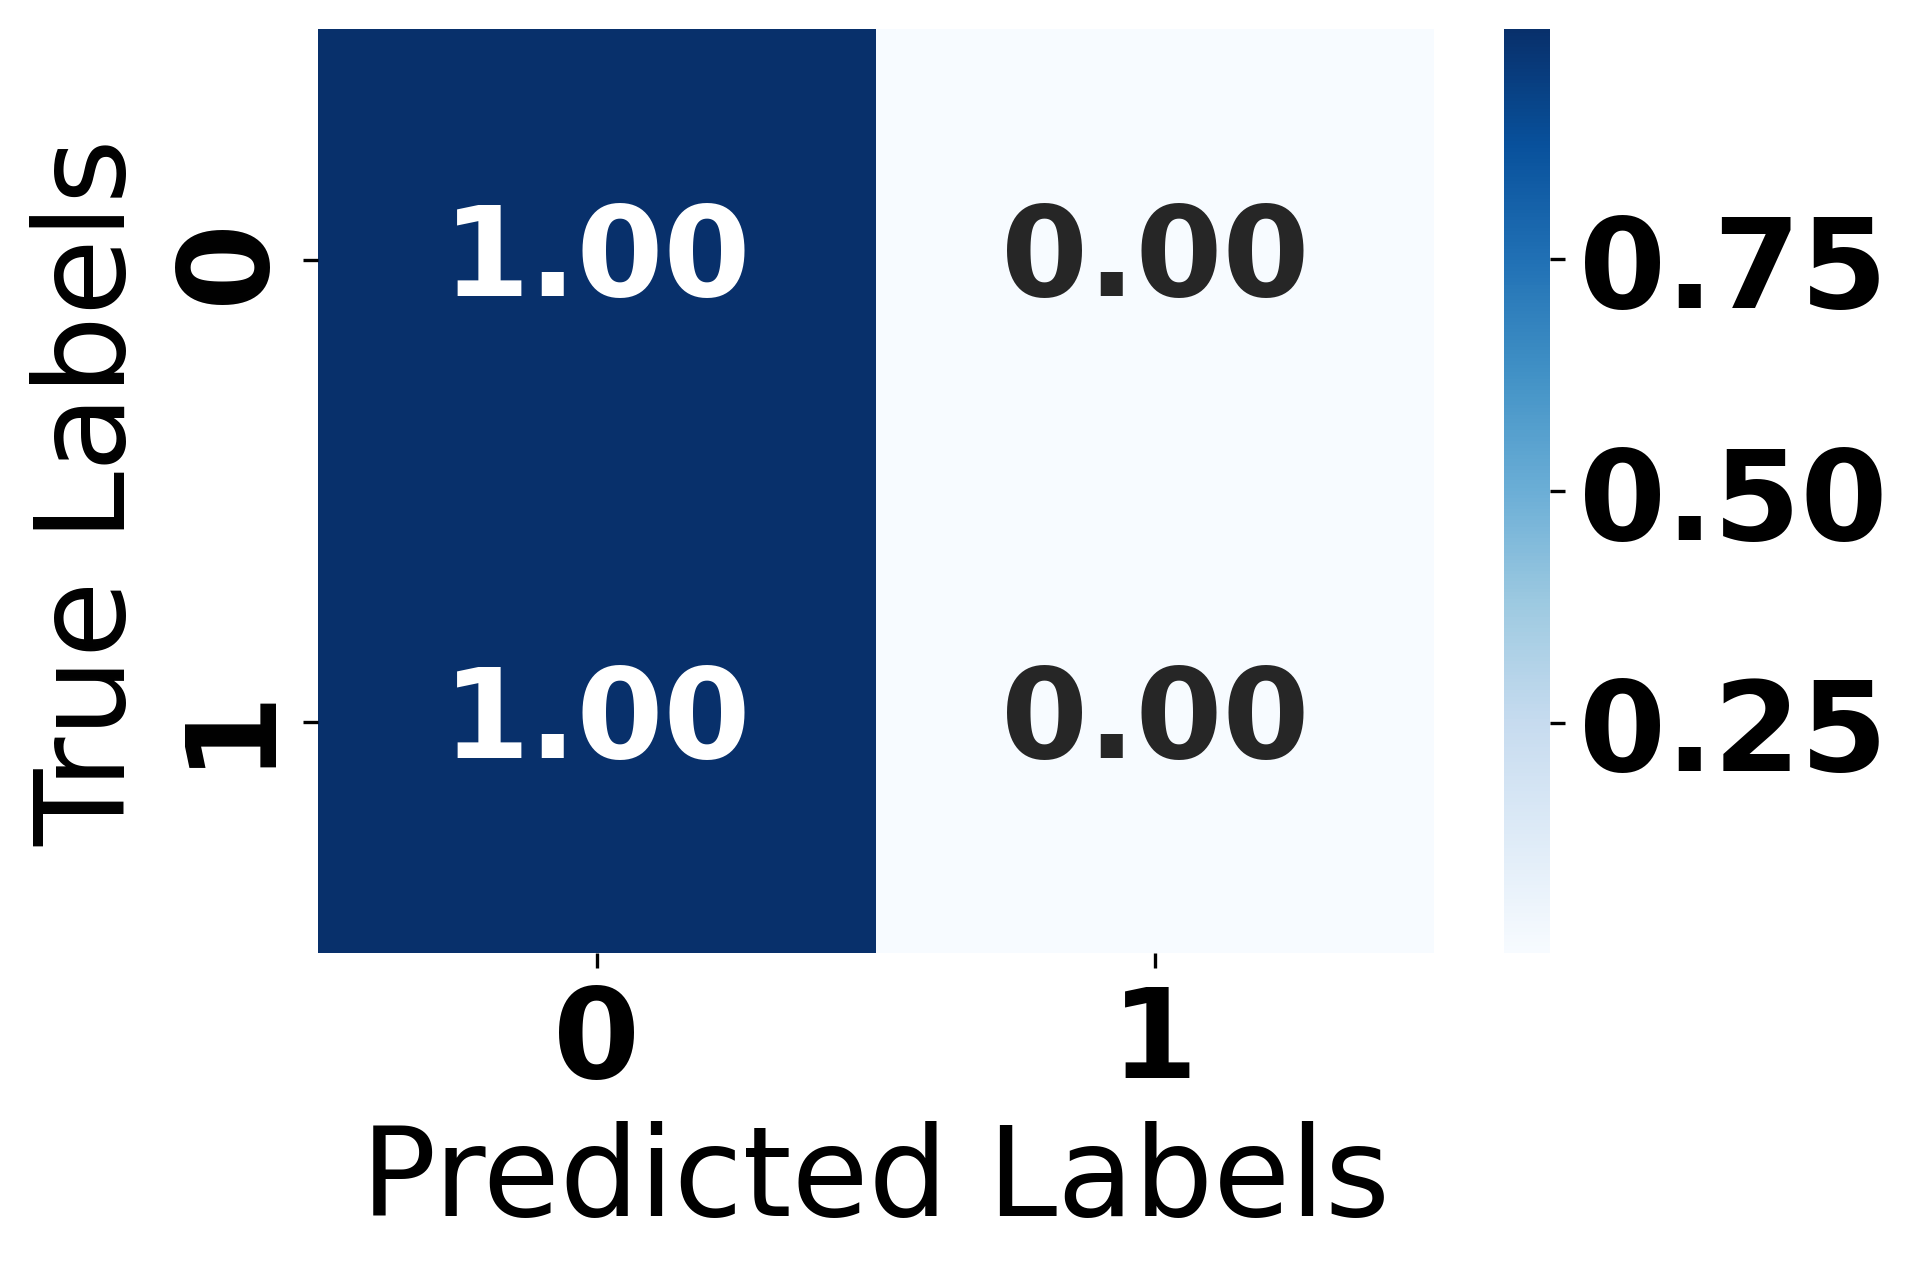

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
from sklearn.utils import class_weight
import threading

# Assuming x_train, y_train, x_test, y_test are already loaded

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 6
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.1  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start federated learning server using FedProx
def start_server():
    strategy = fl.server.strategy.FedProx(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        prox_alpha=0.5  # Proximal term coefficient, adjust as needed
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",  # Binding to all interfaces
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients
def simulate_clients_and_server():
    # Start server in a separate thread
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    # Start each client in separate threads
    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    # Wait for all threads to complete
    for client_thread in client_threads:
        client_thread.join()

# Run the simulation
simulate_clients_and_server()

# Evaluate the final model
final_model = create_compiled_keras_model()

# Assuming you have loaded the final model's weights (optional step depending on setup)
# final_model.load_weights('path_to_final_weights.h5')

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-685 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-70-5b0cdd421912>", line 123, in start_server
TypeError: FedAvg.__init__() got an unexpected keyword argument 'min_eval_clients'
	Instead, use `flwr.client.start_client()` by ensuring you first call the `.to_client()` method as shown below: 
	flwr.client.start_client(
		server_address='<IP>:<PORT>',
		client=FlowerClient().to_client(), # <-- where FlowerClient is of type flwr.client.NumPyClient object
	)
	Using `start_numpy_client()` is deprecated.

            Th

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.0562 - loss: 5.4112
Test Loss: 5.405425071716309
Test Accuracy: 0.05714506283402443
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step
Normalized Confusion Matrix:
[[5.45429753e-05 9.99945457e-01]
 [3.00165091e-04 9.99699835e-01]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.75      0.00      0.00    110005
     Class 1       0.06      1.00      0.11      6663

    accuracy                           0.06    116668
   macro avg       0.40      0.50      0.05    116668
weighted avg       0.71      0.06      0.01    116668



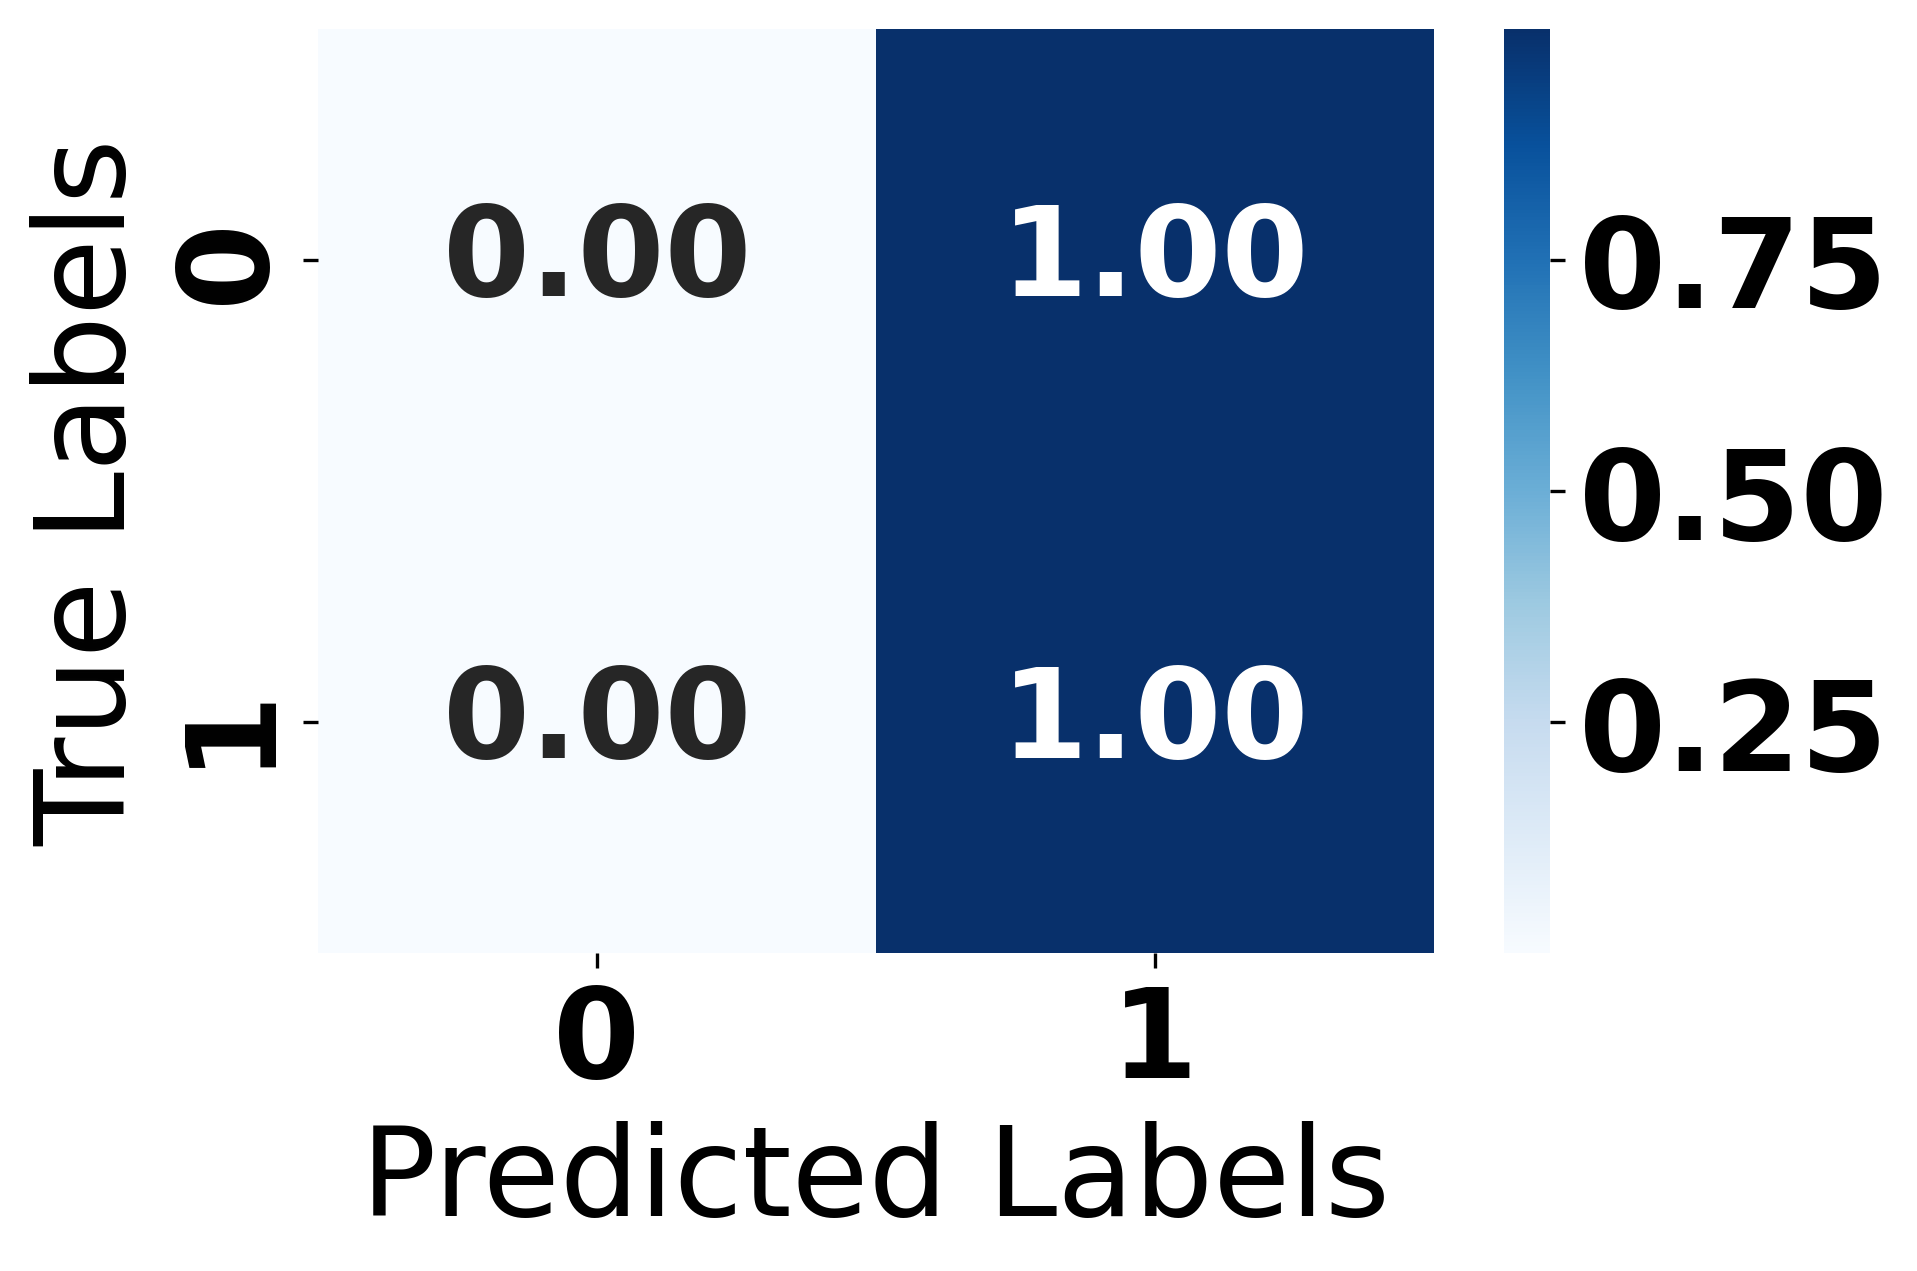

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
from sklearn.utils import class_weight
import threading
import numpy as np
import pandas as pd

# Assuming x_train, y_train, x_test, y_test are already loaded

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 2
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.1  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Custom MaxFed strategy
class MaxFed(fl.server.strategy.FedAvg):
    def aggregate_fit(
        self, rnd, results, failures
    ):
        # If any client reported a failure, ignore it
        if failures:
            print(f"Round {rnd} - failures: {len(failures)}")

        # Collect weights and calculate maximum for each parameter
        weights = [fit_res.parameters for client, fit_res in results]
        max_weights = np.maximum.reduce(weights)

        # Return the new parameters and the total number of samples used for aggregation
        return max_weights, {}

# Start federated learning server using MaxFed
def start_server():
    strategy = MaxFed(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        min_eval_clients=num_clients,
        on_fit_config_fn=None,
        on_evaluate_config_fn=None,
        initial_parameters=None,
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",
        strategy=strategy,
        config={"num_rounds": 10},
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients
def simulate_clients_and_server():
    # Start server in a separate thread
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    # Start each client in separate threads
    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    # Wait for all threads to complete
    for client_thread in client_threads:
        client_thread.join()

# Run the simulation
simulate_clients_and_server()

# Evaluate the final model
final_model = create_compiled_keras_model()

# Assuming you have loaded the final model's weights (optional step depending on setup)
# final_model.load_weights('path_to_final_weights.h5')

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-1382 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-130-0d1904fbd2e2>", line 121, in start_server
TypeError: FedAvg.__init__() got an unexpected keyword argument 'min_eval_clients'
	Instead, use `flwr.client.start_client()` by ensuring you first call the `.to_client()` method as shown below: 
	flwr.client.start_client(
		server_address='<IP>:<PORT>',
		client=FlowerClient().to_client(), # <-- where FlowerClient is of type flwr.client.NumPyClient object
	)
	Using `start_numpy_client()` is deprecated.

            

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.1172 - loss: 1.6864
Test Loss: 1.6857194900512695
Test Accuracy: 0.1178729385137558
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step
Normalized Confusion Matrix:
[[0.07126949 0.92873051]
 [0.11271199 0.88728801]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.07      0.13    110005
     Class 1       0.05      0.89      0.10      6663

    accuracy                           0.12    116668
   macro avg       0.48      0.48      0.12    116668
weighted avg       0.86      0.12      0.13    116668



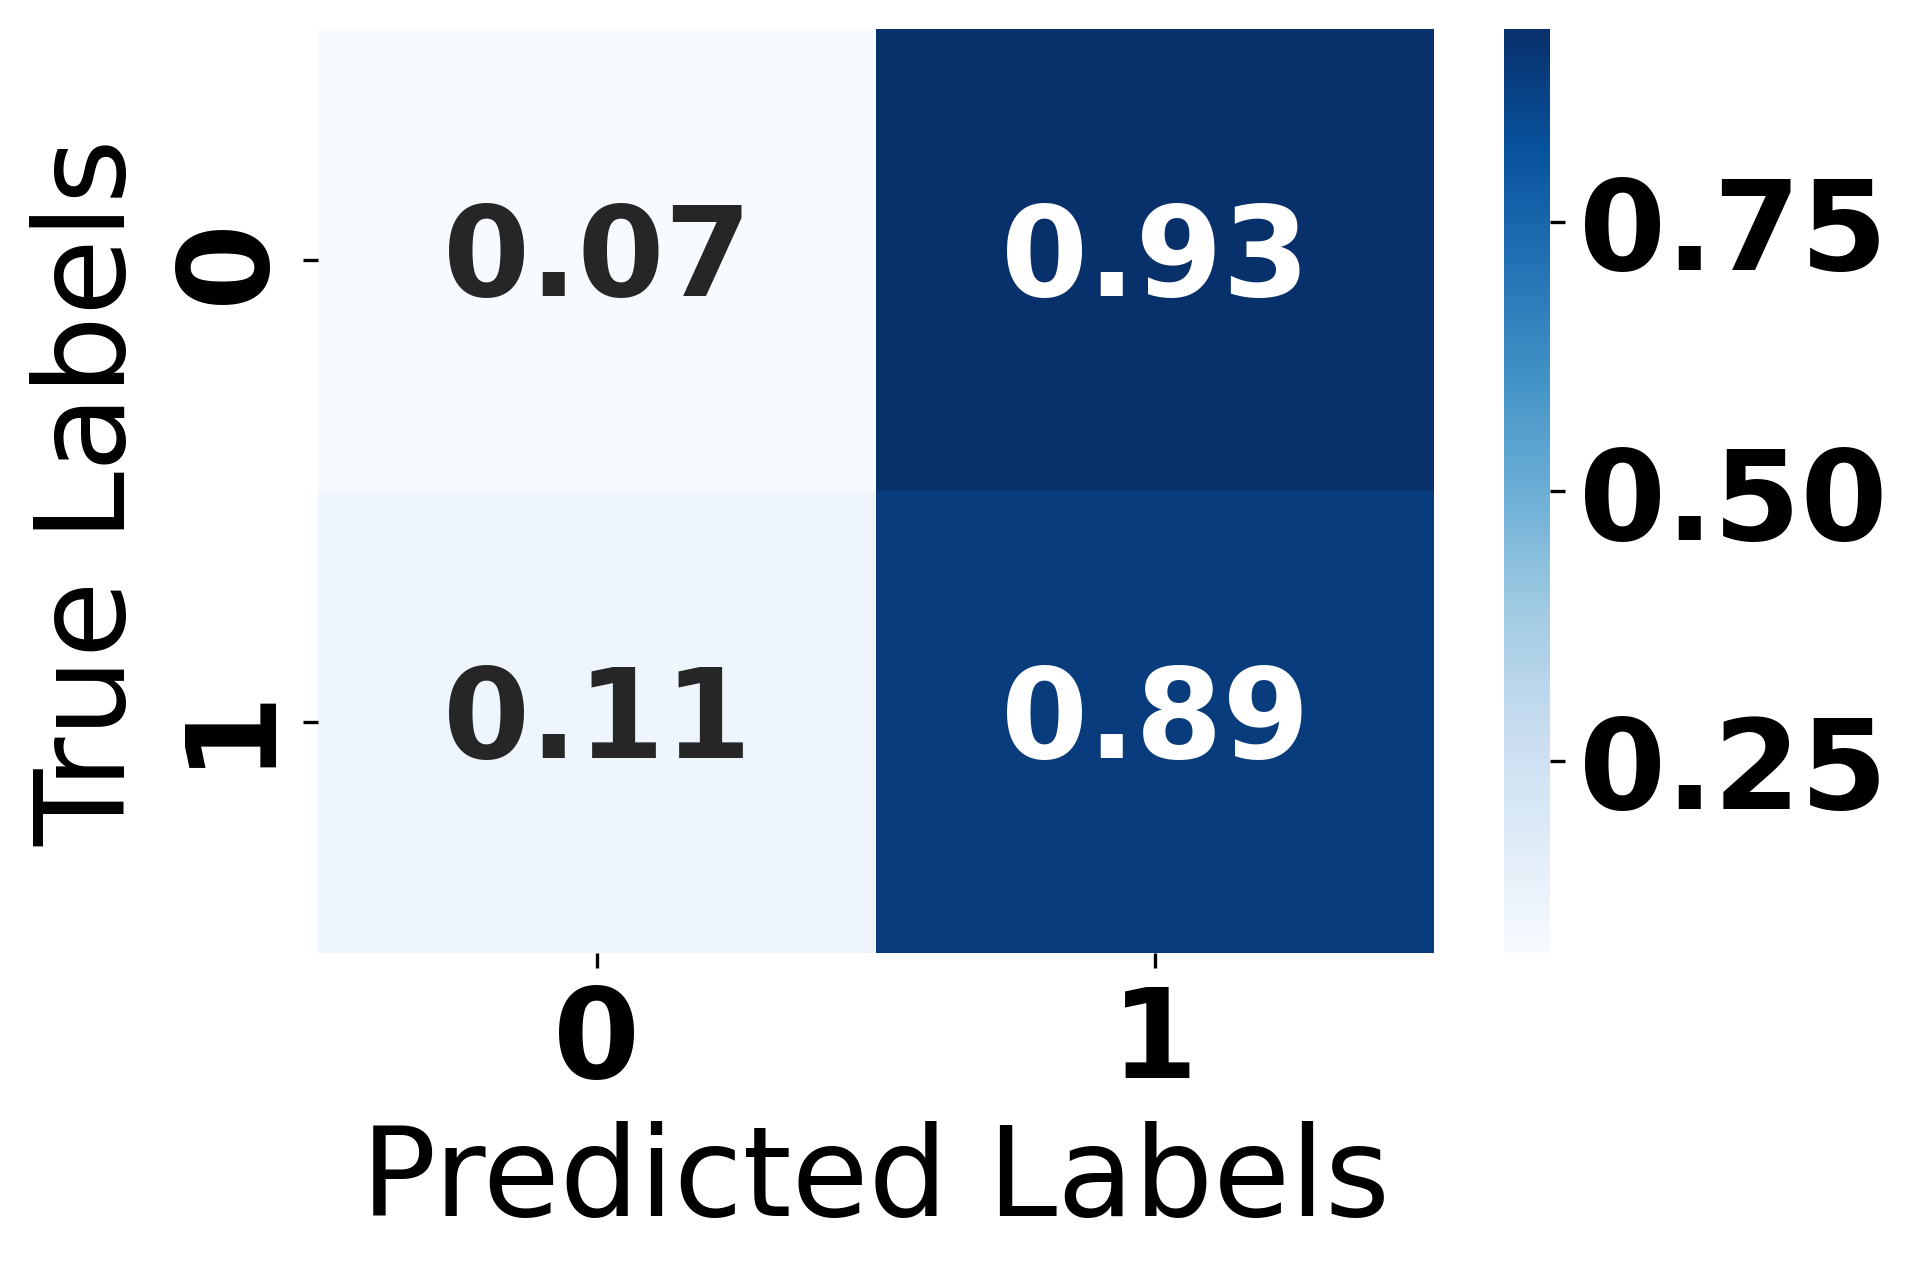

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl
from sklearn.utils import class_weight
import threading
import numpy as np
import pandas as pd

# Assuming x_train, y_train, x_test, y_test are already loaded

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an adjustable factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define the model architecture with advanced attention mechanism
def advanced_attention_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Advanced Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection with residual block
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = advanced_attention_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        class_weights_dict = get_class_weights(self.y_train, self.factor)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test),
                       class_weight=class_weights_dict, verbose=0)
        self.factor += 0.51  # Increase the factor for the next round
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Custom MaxFed strategy
class MaxFed(fl.server.strategy.FedAvg):
    def aggregate_fit(self, rnd, results, failures):
        # If any client reported a failure, ignore it
        if failures:
            print(f"Round {rnd} - failures: {len(failures)}")

        # Collect weights and calculate maximum for each parameter
        weights = [fit_res.parameters for client, fit_res in results]
        max_weights = np.maximum.reduce(weights)

        # Return the new parameters and the total number of samples used for aggregation
        return max_weights, {}

# Start federated learning server using MaxFed
def start_server():
    strategy = MaxFed(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        min_eval_clients=num_clients,
        on_fit_config_fn=None,
        on_evaluate_config_fn=None,
        initial_parameters=None,
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",
        strategy=strategy,
        config={"num_rounds": 10},
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients
def simulate_clients_and_server():
    # Start server in a separate thread
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    # Start each client in separate threads
    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    # Wait for all threads to complete
    for client_thread in client_threads:
        client_thread.join()

# Run the simulation
simulate_clients_and_server()

# Evaluate the final model
final_model = create_compiled_keras_model()

# Assuming you have loaded the final model's weights (optional step depending on setup)
# final_model.load_weights('path_to_final_weights.h5')

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.utils import class_weight, resample
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the deep learning model architecture
def deep_nn_model(input_shape):
    input_layer = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input_layer)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(32, activation='relu')(x)
    x = Dropout(0.5)(x)
    output = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=input_layer, outputs=output)
    return model

def create_compiled_deep_nn_model(input_shape):
    model = deep_nn_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Calculate class weights
def get_class_weights(y_train, factor=1):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Train the model with class weights
def fit_deep_nn_model(model, x_train, y_train, x_test, y_test):
    class_weights_dict = get_class_weights(y_train)
    model.fit(x_train, y_train, epochs=10, batch_size=64,
              validation_data=(x_test, y_test),
              class_weight=class_weights_dict, verbose=1)
    return model

# Ensemble approach (optional)
def ensemble_model_train(x_train, y_train, x_test, y_test, n_models=5):
    models = []
    for _ in range(n_models):
        x_resampled, y_resampled = resample(x_train, y_train, replace=True, stratify=y_train)
        model = create_compiled_deep_nn_model((x_train.shape[1],))
        model = fit_deep_nn_model(model, x_resampled, y_resampled, x_test, y_test)
        models.append(model)
    return models

def ensemble_predict(models, x_test):
    preds = np.zeros((x_test.shape[0], len(models)))
    for i, model in enumerate(models):
        preds[:, i] = model.predict(x_test).flatten()
    return np.mean(preds, axis=1) > 0.5

# Example usage
# Assuming x_train, y_train, x_test, y_test are already loaded
# Training a single model
model = create_compiled_deep_nn_model((x_train.shape[1],))
model = fit_deep_nn_model(model, x_train, y_train, x_test, y_test)

# Evaluate single model
y_pred = (model.predict(x_test) > 0.5).astype(int).flatten()
print("Single Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report for Single Model:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

# Training and evaluating ensemble model
models = ensemble_model_train(x_train, y_train, x_test, y_test, n_models=5)
y_pred_ensemble = ensemble_predict(models, x_test)
print("Ensemble Model Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred_ensemble, target_names=["Class 0", "Class 1"]))

Epoch 1/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5620 - loss: 1.1013 - val_accuracy: 0.6979 - val_loss: 0.6041
Epoch 2/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.7216 - loss: 0.5662 - val_accuracy: 0.7720 - val_loss: 0.6314
Epoch 3/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7759 - loss: 0.5331 - val_accuracy: 0.7480 - val_loss: 0.5933
Epoch 4/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7859 - loss: 0.5170 - val_accuracy: 0.8063 - val_loss: 0.5382
Epoch 5/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7966 - loss: 0.5161 - val_accuracy: 0.7662 - val_loss: 0.5416
Epoch 6/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7966 - loss: 0.5036 - val_accuracy: 0.8138 - val_loss: 0.4941
Epoch 7/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7976 - loss: 0.5039 - val_accuracy: 0.7571 - val_loss: 0.5255
Epoch 8/10
1962/1962 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7968 - loss: 0.

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Normalized Confusion Matrix:
[[0.79852734 0.20147266]
 [0.23517935 0.76482065]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.80      0.88    110005
     Class 1       0.19      0.76      0.30      6663

    accuracy                           0.80    116668
   macro avg       0.58      0.78      0.59    116668
weighted avg       0.94      0.80      0.85    116668



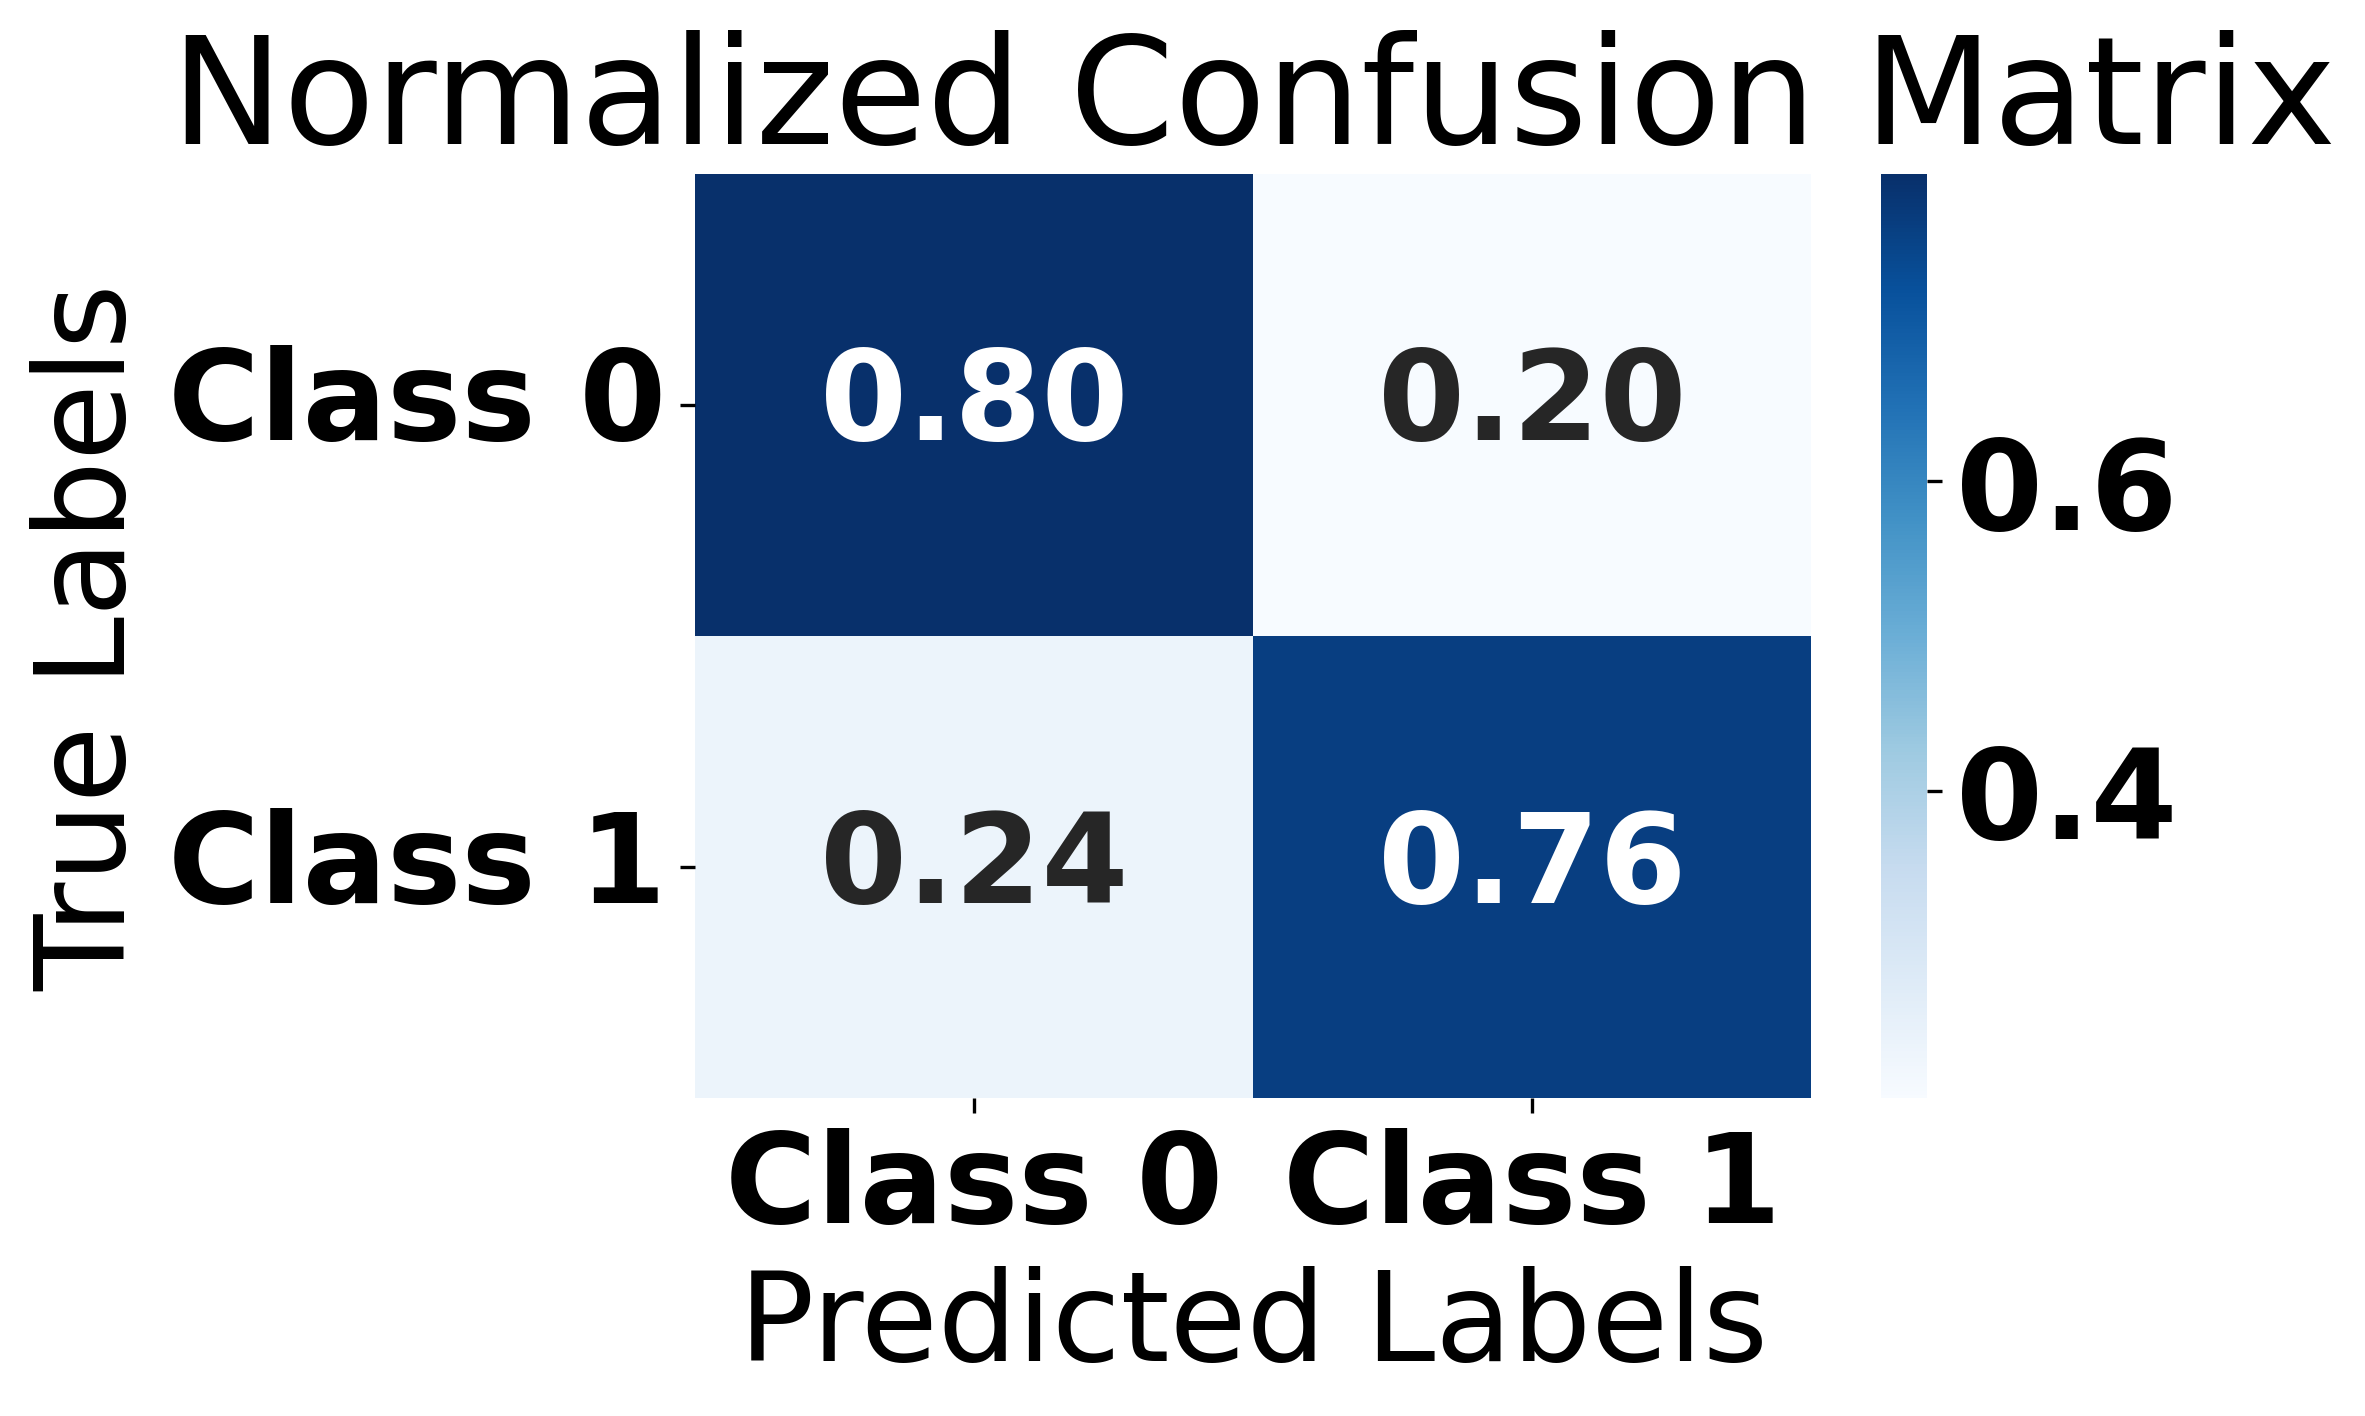

In [ ]:
# Predict probabilities on test data using ensemble model
y_pred_prob = ensemble_predict(models, x_test)  # Use ensemble_predict to get predictions

# Convert probabilities to class labels using a threshold of 0.5
y_pred_ensemble = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred_ensemble, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as a figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Normalized Confusion Matrix')
plt.show()

In [ ]:
"""
import os

def save_ensemble(models, save_dir='/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model'):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    for i, model in enumerate(models):
        model_path = os.path.join(save_dir, f'model_{i}.h5')
        model.save(model_path)
        print(f"Model {i} saved to {model_path}")

# Save the ensemble models
save_ensemble(models)
"""

Model 0 saved to /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_0.h5
Model 1 saved to /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_1.h5
Model 2 saved to /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_2.h5


Model 3 saved to /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_3.h5
Model 4 saved to /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_4.h5


In [ ]:
def load_ensemble(load_dir='/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model', n_models=5):
    models = []
    for i in range(n_models):
        model_path = os.path.join(load_dir, f'model_{i}.h5')
        if os.path.exists(model_path):
            model = tf.keras.models.load_model(model_path)
            models.append(model)
            print(f"Model {i} loaded from {model_path}")
        else:
            print(f"Model {i} path {model_path} does not exist.")
    return models

# Load the ensemble models
models = load_ensemble(n_models=5)

Model 0 loaded from /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_0.h5


Model 1 loaded from /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_1.h5


Model 2 loaded from /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_2.h5


Model 3 loaded from /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_3.h5


Model 4 loaded from /content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/model_4.h5


3646/3646 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
Normalized Confusion Matrix:
[[0.79852734 0.20147266]
 [0.23517935 0.76482065]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.80      0.88    110005
     Class 1       0.19      0.76      0.30      6663

    accuracy                           0.80    116668
   macro avg       0.58      0.78      0.59    116668
weighted avg       0.94      0.80      0.85    116668



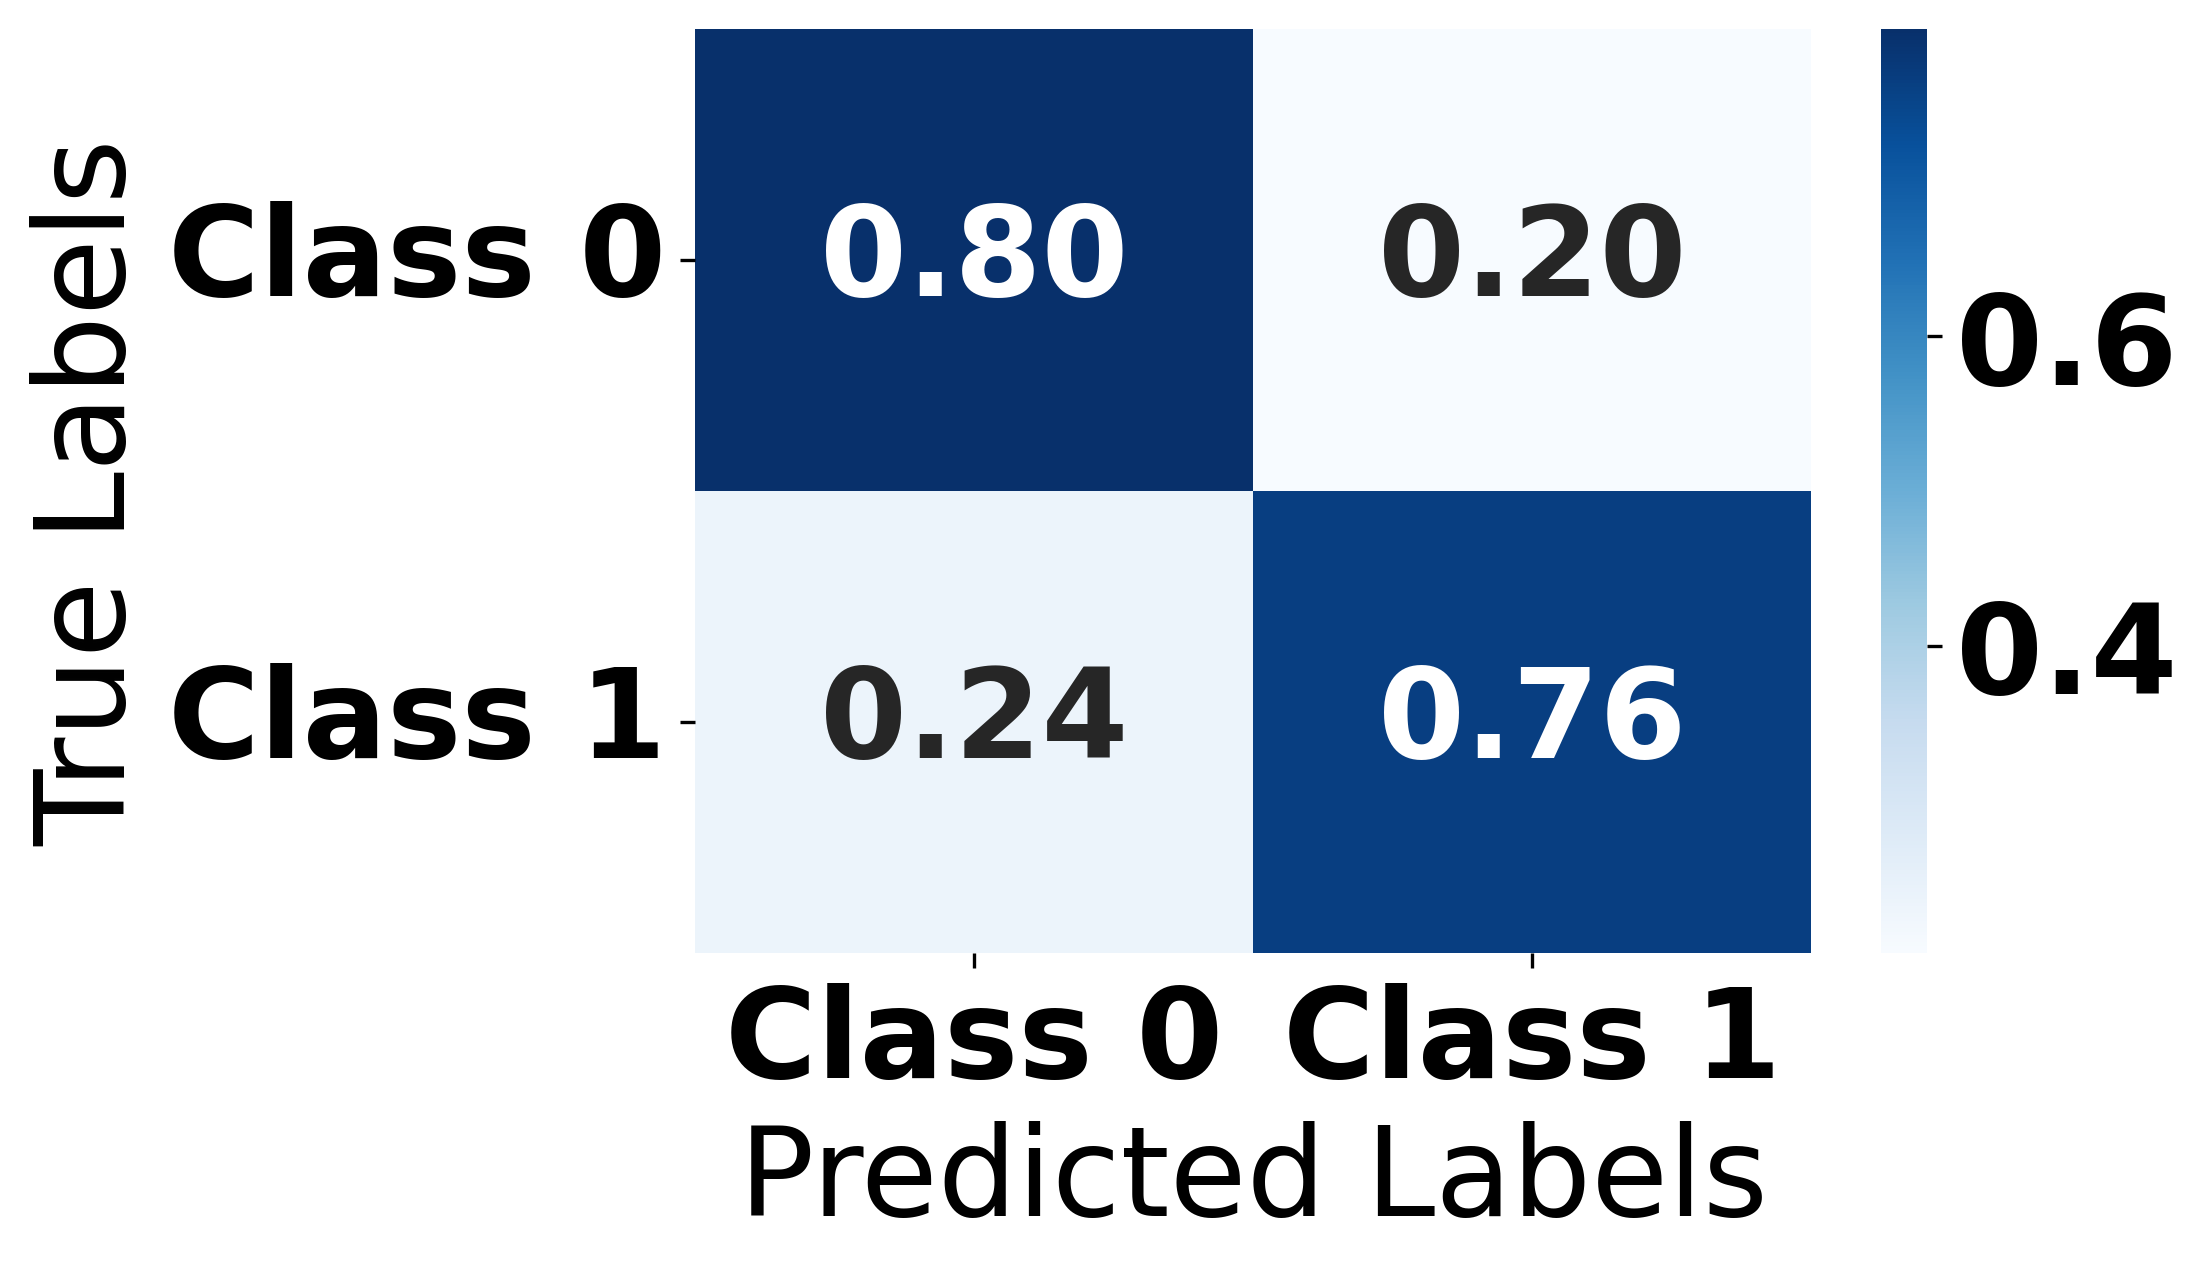

In [ ]:
# Predict probabilities on test data using ensemble model
y_pred_prob = ensemble_predict(models, x_test)  # Use ensemble_predict to get predictions

# Convert probabilities to class labels using a threshold of 0.5
y_pred_ensemble = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred_ensemble, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as a figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f",
            xticklabels=["Class 0", "Class 1"],
            yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread /usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)
Thread-462 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-51-e19e5cc97c58>", line 83, in start_server
TypeError: FedAvg.__init__() got an unexpected keyword argument 'min_eval_clients'
Exception in thread Thread-463 (start_client):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self

Normalized Confusion Matrix:
[[0.83071679 0.16928321]
 [0.24958727 0.75041273]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.83      0.90    110005
     Class 1       0.21      0.75      0.33      6663

    accuracy                           0.83    116668
   macro avg       0.60      0.79      0.62    116668
weighted avg       0.94      0.83      0.87    116668



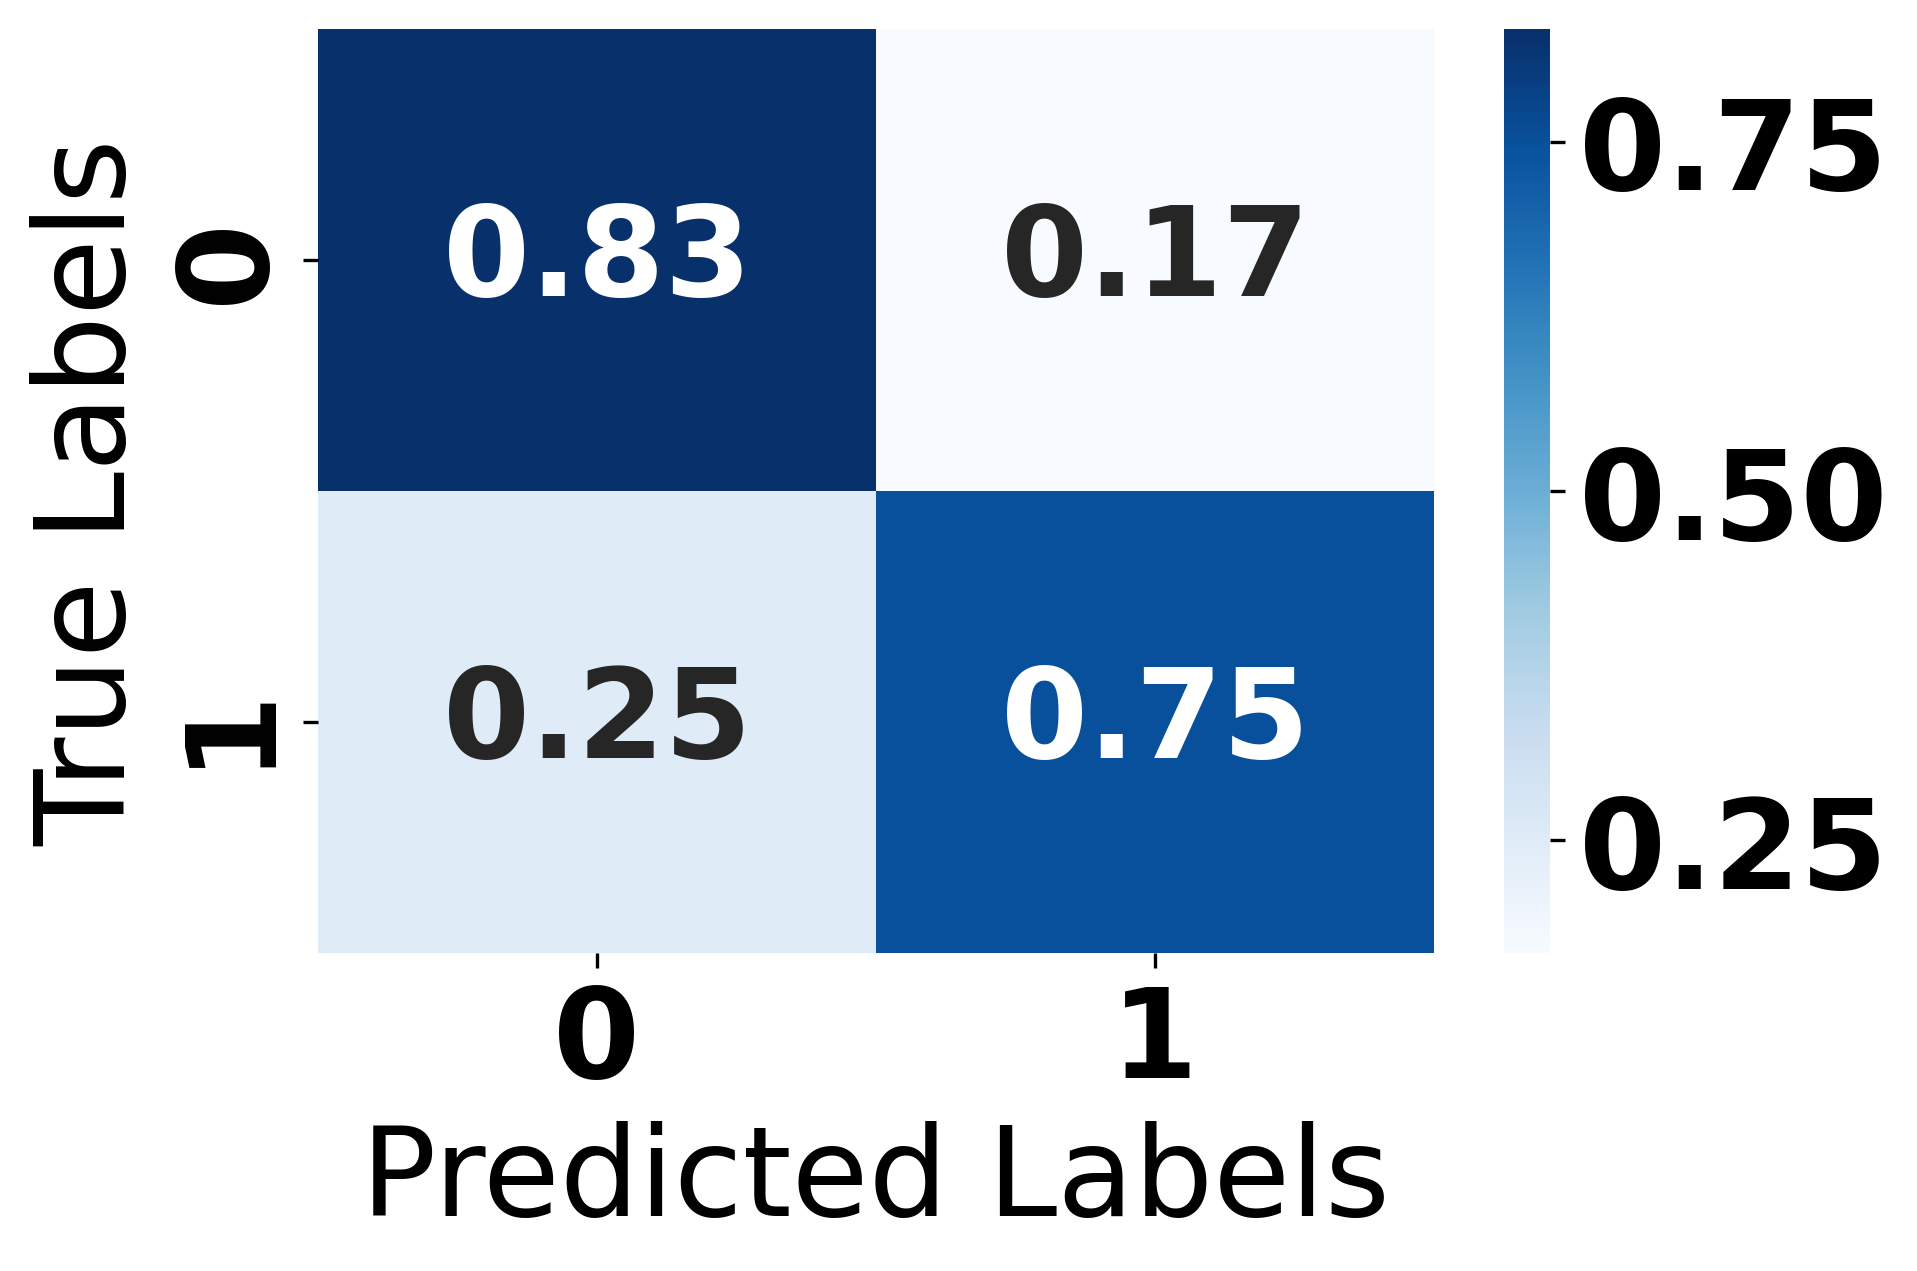

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are already loaded

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 3
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Create and train RUSBoost model
def train_rusboost_model(x_train, y_train):
    model = RUSBoostClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    return model

# Flower client class (adjusted for RUSBoost)
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = train_rusboost_model(x_train, y_train)
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        # RUSBoost does not have get_parameters, so this needs to be adapted
        return self.model

    def set_parameters(self, parameters):
        # RUSBoost does not have set_parameters, so this needs to be adapted
        self.model = parameters

    def fit(self, parameters, config):
        # No fitting needed here as RUSBoost model is already trained
        self.model = train_rusboost_model(self.x_train, self.y_train)
        return self.model, len(self.x_train), {}

    def evaluate(self, parameters, config):
        # Evaluate RUSBoost model
        predictions = self.model.predict(self.x_test)
        accuracy = np.mean(predictions == self.y_test)
        return None, len(self.x_test), {"accuracy": accuracy}

# Custom MaxFed strategy (no changes needed for RUSBoost)
class MaxFed(fl.server.strategy.FedAvg):
    def aggregate_fit(self, rnd, results, failures):
        if failures:
            print(f"Round {rnd} - failures: {len(failures)}")

        # Collect weights and calculate maximum for each parameter
        weights = [fit_res.parameters for client, fit_res in results]
        max_weights = np.maximum.reduce(weights)

        return max_weights, {}

# Start federated learning server using MaxFed (no changes needed for RUSBoost)
def start_server():
    strategy = MaxFed(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        min_eval_clients=num_clients,
        on_fit_config_fn=None,
        on_evaluate_config_fn=None,
        initial_parameters=None,
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",
        strategy=strategy,
        config={"num_rounds": 10},
    )

# Start federated learning clients (no changes needed for RUSBoost)
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients (no changes needed for RUSBoost)
def simulate_clients_and_server():
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    for client_thread in client_threads:
        client_thread.join()

# Run the simulation (no changes needed for RUSBoost)
simulate_clients_and_server()

# Evaluate the final model
final_model = train_rusboost_model(x_test, y_test)

# Evaluate the final model
y_pred = final_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
Exception in thread Thread-660 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py:245: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)

  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-67-6673b547efe4>", line 83, in start_server
TypeError: FedAvg.__init__() got an unexpected keyword argument 'min_eval_clients'
Exception in thread Thread-661 (start_client):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self

Normalized Confusion Matrix:
[[0.83071679 0.16928321]
 [0.24958727 0.75041273]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      0.83      0.90    110005
     Class 1       0.21      0.75      0.33      6663

    accuracy                           0.83    116668
   macro avg       0.60      0.79      0.62    116668
weighted avg       0.94      0.83      0.87    116668



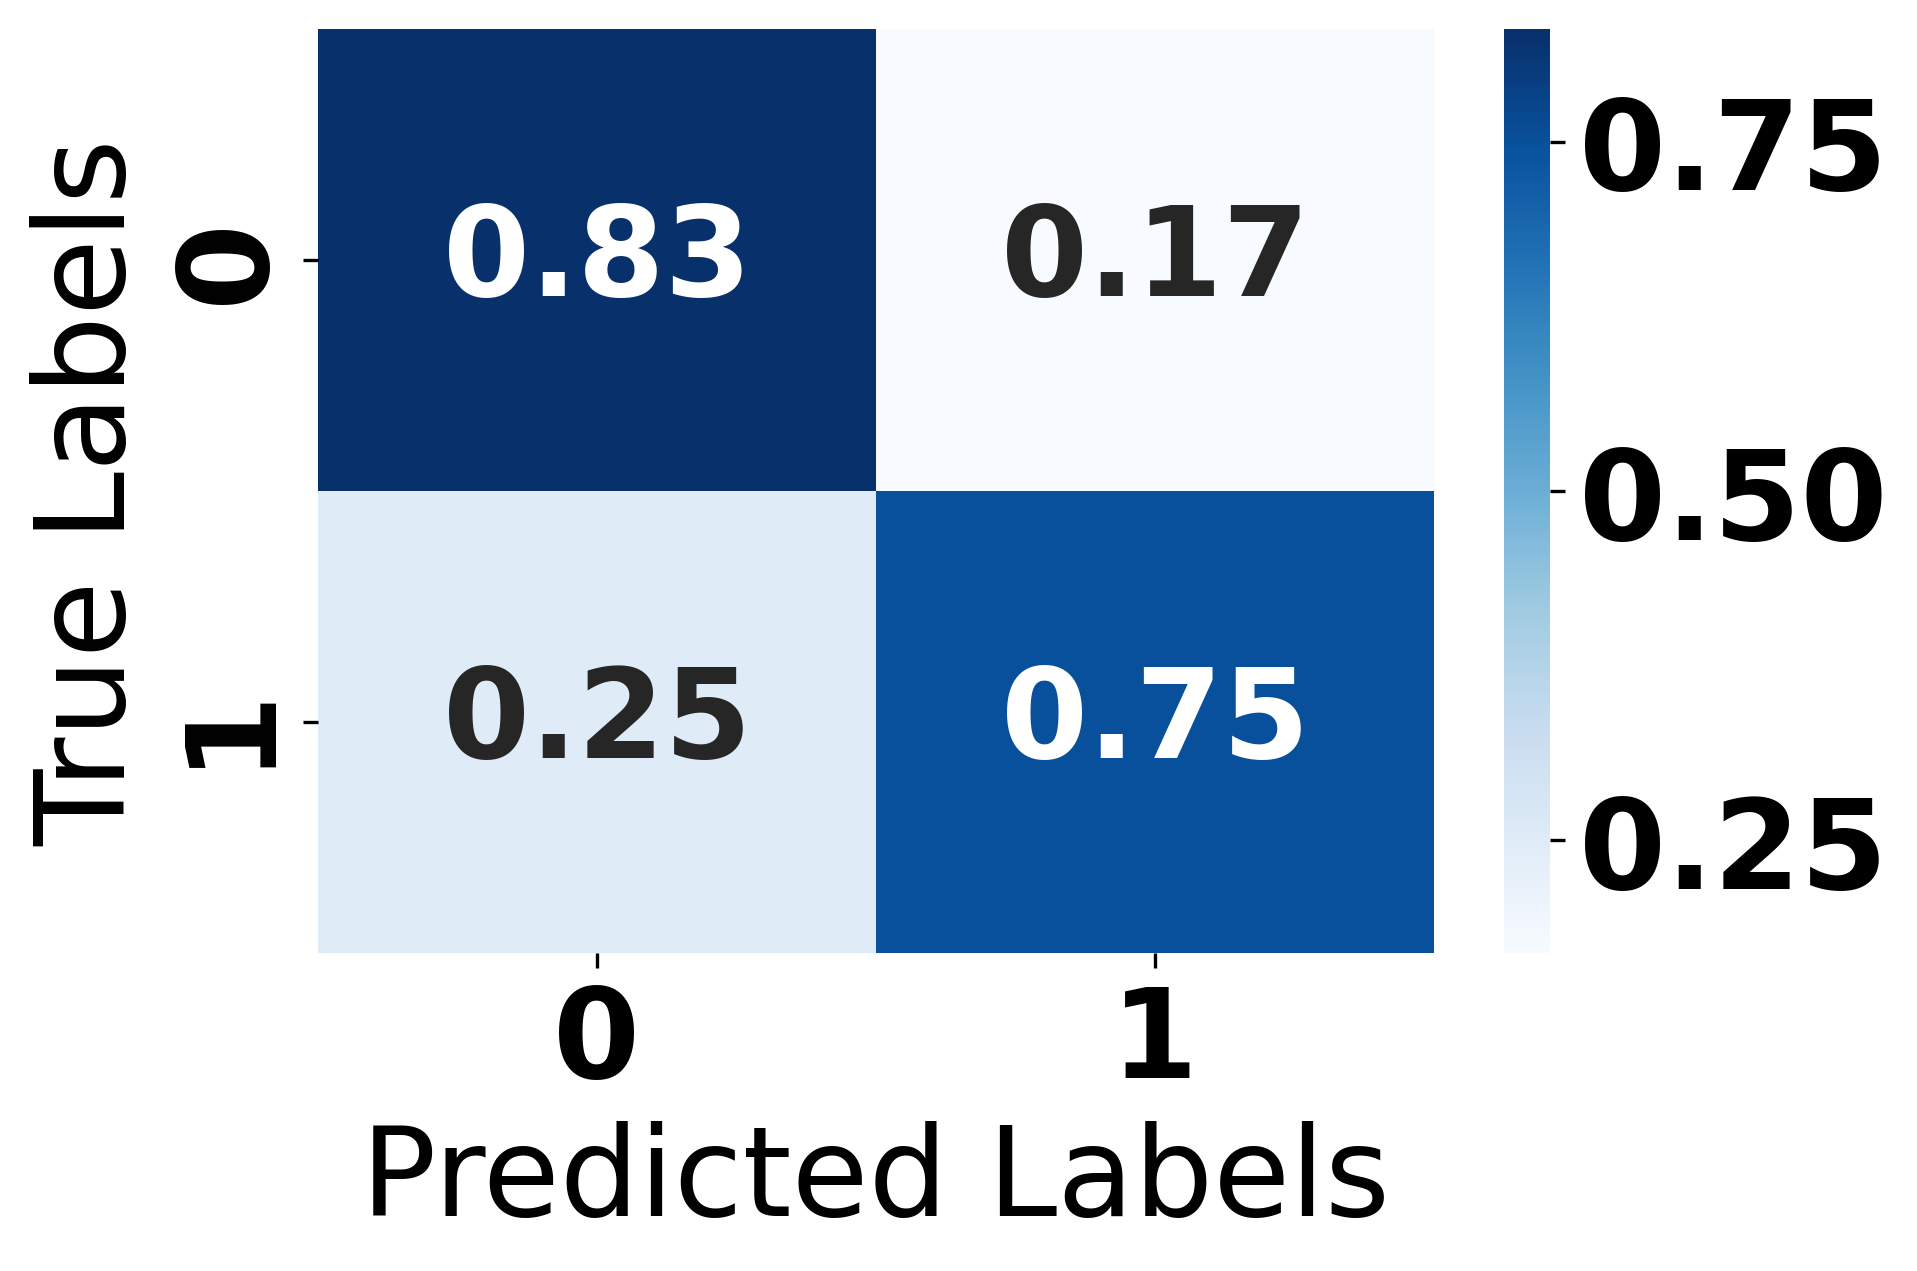

In [ ]:
from imblearn.ensemble import RUSBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming x_train, y_train, x_test, y_test are already loaded

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Create and train RUSBoost model
def train_rusboost_model(x_train, y_train):
    model = RUSBoostClassifier(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    return model

# Flower client class (adjusted for RUSBoost)
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = train_rusboost_model(x_train, y_train)
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.factor = 1

    def get_parameters(self):
        # RUSBoost does not have get_parameters, so this needs to be adapted
        return self.model

    def set_parameters(self, parameters):
        # RUSBoost does not have set_parameters, so this needs to be adapted
        self.model = parameters

    def fit(self, parameters, config):
        # No fitting needed here as RUSBoost model is already trained
        self.model = train_rusboost_model(self.x_train, self.y_train)
        return self.model, len(self.x_train), {}

    def evaluate(self, parameters, config):
        # Evaluate RUSBoost model
        predictions = self.model.predict(self.x_test)
        accuracy = np.mean(predictions == self.y_test)
        return None, len(self.x_test), {"accuracy": accuracy}

# Custom MaxFed strategy (no changes needed for RUSBoost)
class MaxFed(fl.server.strategy.FedAvg):
    def aggregate_fit(self, rnd, results, failures):
        if failures:
            print(f"Round {rnd} - failures: {len(failures)}")

        # Collect weights and calculate maximum for each parameter
        weights = [fit_res.parameters for client, fit_res in results]
        max_weights = np.maximum.reduce(weights)

        return max_weights, {}

# Start federated learning server using MaxFed (no changes needed for RUSBoost)
def start_server():
    strategy = MaxFed(
        min_fit_clients=num_clients,
        min_available_clients=num_clients,
        min_eval_clients=num_clients,
        on_fit_config_fn=None,
        on_evaluate_config_fn=None,
        initial_parameters=None,
    )
    fl.server.start_server(
        server_address="0.0.0.0:8080",
        strategy=strategy,
        config={"num_rounds": 10},
    )

# Start federated learning clients (no changes needed for RUSBoost)
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="0.0.0.0:8080", client=client)

# Use threading to simulate multiple clients (no changes needed for RUSBoost)
def simulate_clients_and_server():
    server_thread = threading.Thread(target=start_server)
    server_thread.start()

    client_threads = []
    for i in range(num_clients):
        client_thread = threading.Thread(target=start_client, args=(i,))
        client_threads.append(client_thread)
        client_thread.start()

    for client_thread in client_threads:
        client_thread.join()

# Run the simulation (no changes needed for RUSBoost)
simulate_clients_and_server()

# Evaluate the final model
final_model = train_rusboost_model(x_test, y_test)

# Evaluate the final model
y_pred = final_model.predict(x_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
pip install flwr

Aten

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
INFO :      Starting Flower server, config: {'num_rounds': 10}
INFO:flwr:Starting Flower server, config: {'num_rounds': 10}
Exception in thread Thread-1356 (start_server):
Traceback (most recent call last):
  File "/usr/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-128-d8ea4cd5d265>", line 95, in start_server
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/app.py", line 169, in start_server
    grpc_server = start_grpc_server(
  File "/usr/local/lib/python3.10/dist-packages/flwr/server/superlink/fleet/grpc_bidi/grpc_server.py", line 143, in start_grpc_server
    server = generic_create_grp

3646/3646 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.6519 - loss: 0.8175
Test Loss: 0.8179518580436707
Test Accuracy: 0.651155412197113
3646/3646 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step
Normalized Confusion Matrix:
[[0.6654243  0.3345757 ]
 [0.58442143 0.41557857]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.67      0.78    110005
     Class 1       0.07      0.42      0.12      6663

    accuracy                           0.65    116668
   macro avg       0.51      0.54      0.45    116668
weighted avg       0.90      0.65      0.74    116668



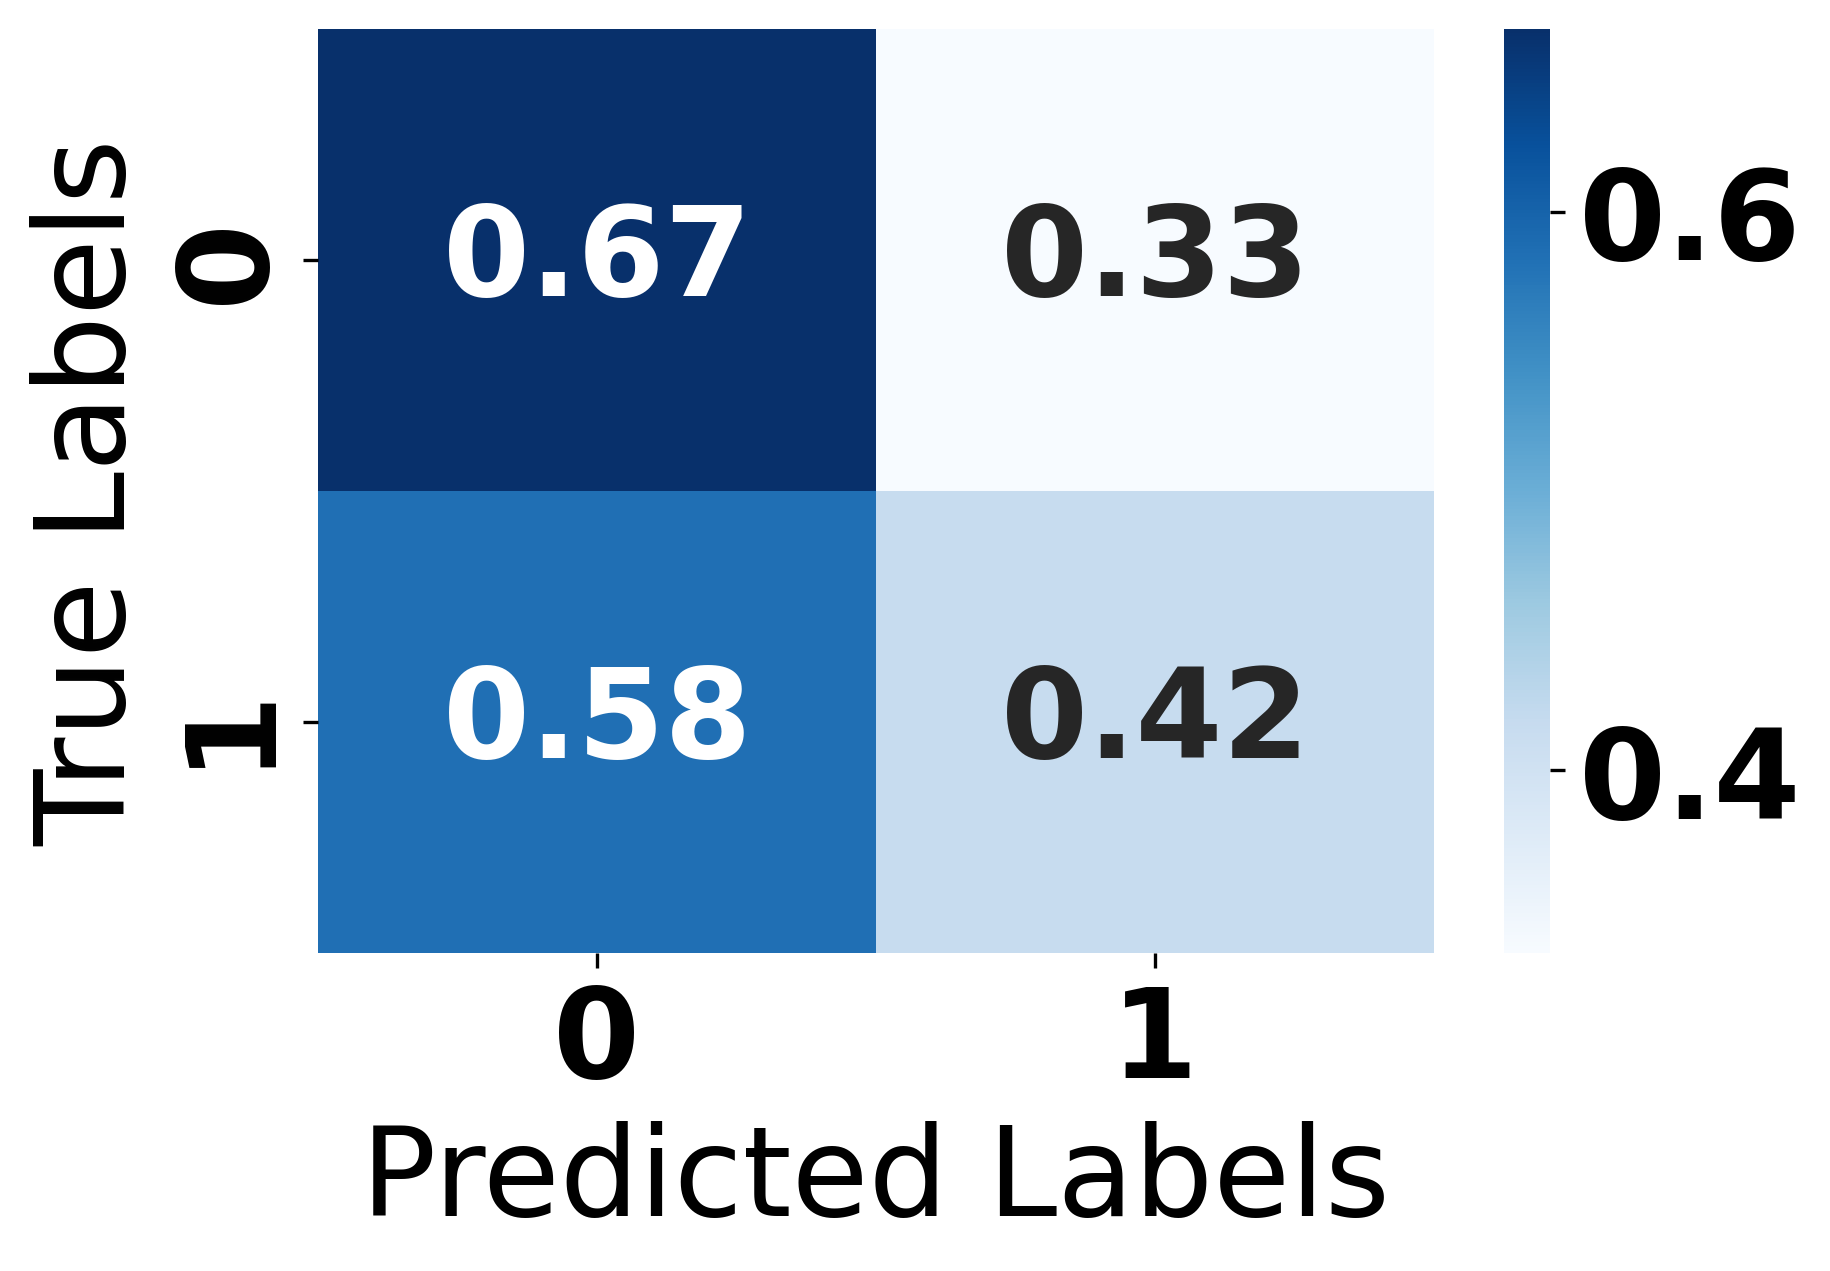

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import flwr as fl

# Convert to DataFrame and Series
x_train_df = pd.DataFrame(x_train)
y_train_series = pd.Series(y_train.flatten(), name='Cognition Dysfunction')

# Combine and shuffle the data
train_data = pd.concat([x_train_df, y_train_series], axis=1).sample(frac=1).reset_index(drop=True)

# Split into client datasets
num_clients = 4
client_datasets = np.array_split(train_data, num_clients)

# Separate features and labels for each client
client_data = []
for i in range(num_clients):
    x_client = client_datasets[i].drop(['Cognition Dysfunction'], axis=1).values
    y_client = client_datasets[i]['Cognition Dysfunction'].values
    client_data.append((x_client, y_client))

# Define the model architecture with attention mechanism
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)
    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)
    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create and compile the model
def create_compiled_keras_model():
    input_shape = (x_train.shape[1], 1)
    model = novel_improved_model(input_shape)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Flower client class
class FlowerClient(fl.client.Client):
    def __init__(self, x_train, y_train, x_test, y_test):
        self.model = create_compiled_keras_model()
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test

    def get_parameters(self):
        return self.model.get_weights()

    def set_parameters(self, parameters):
        self.model.set_weights(parameters)

    def fit(self, parameters, config):
        self.set_parameters(parameters)
        self.model.fit(self.x_train, self.y_train, epochs=1, batch_size=64,
                       validation_data=(self.x_test, self.y_test), verbose=0)
        return self.model.get_weights(), len(self.x_train), {}

    def evaluate(self, parameters, config):
        self.set_parameters(parameters)
        loss, accuracy = self.model.evaluate(self.x_test, self.y_test, verbose=0)
        return loss, len(self.x_test), {"accuracy": accuracy}

# Start federated learning server
def start_server():
    strategy = fl.server.strategy.FedAvg(
        min_fit_clients=num_clients,
        min_available_clients=num_clients
    )

    fl.server.start_server(
        strategy=strategy,
        config={"num_rounds": 10},
        client_manager=fl.server.client_manager.SimpleClientManager()
    )

# Start federated learning clients
def start_client(client_id):
    x_client, y_client = client_data[client_id]
    client = FlowerClient(x_client, y_client, x_test, y_test)
    fl.client.start_numpy_client(server_address="localhost:8080", client=client)

# Start server (this will block, so run in a separate cell or environment)
import threading
server_thread = threading.Thread(target=start_server)
server_thread.start()

# Start clients (this will block, so run in separate cells or environments)
for i in range(num_clients):
    client_thread = threading.Thread(target=start_client, args=(i,))
    client_thread.start()

# After federated learning, load the final model weights (implement according to your setup)
# For demonstration, we'll use the model defined here directly
final_model = create_compiled_keras_model()

# Evaluate the final model
loss, accuracy = final_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict probabilities on test data
y_pred_prob = final_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### Base model

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the base CNN model without residual connections
def base_cnn_no_residual_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    pool = MaxPooling1D(pool_size=2)(conv3)

    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the base CNN model without residual connections
input_shape = (x_train.shape[1], 1)
base_cnn_no_residual_model_instance = base_cnn_no_residual_model(input_shape)

# Compile the model
base_cnn_no_residual_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the base CNN model without residual connections for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    base_cnn_no_residual_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# Evaluate the base CNN model without residual connections
loss, accuracy = base_cnn_no_residual_model_instance.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

3646/3646 [==============================] - 11s 3ms/step - loss: 0.7238 - accuracy: 0.6308
Test Loss: 0.7238214015960693
Test Accuracy: 0.6307556629180908


3646/3646 [==============================] - 8s 2ms/step
Normalized Confusion Matrix:
[[0.63766192 0.36233808]
 [0.11706439 0.88293561]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.99      0.64      0.78    110005
     Class 1       0.13      0.88      0.22      6663

    accuracy                           0.65    116668
   macro avg       0.56      0.76      0.50    116668
weighted avg       0.94      0.65      0.74    116668



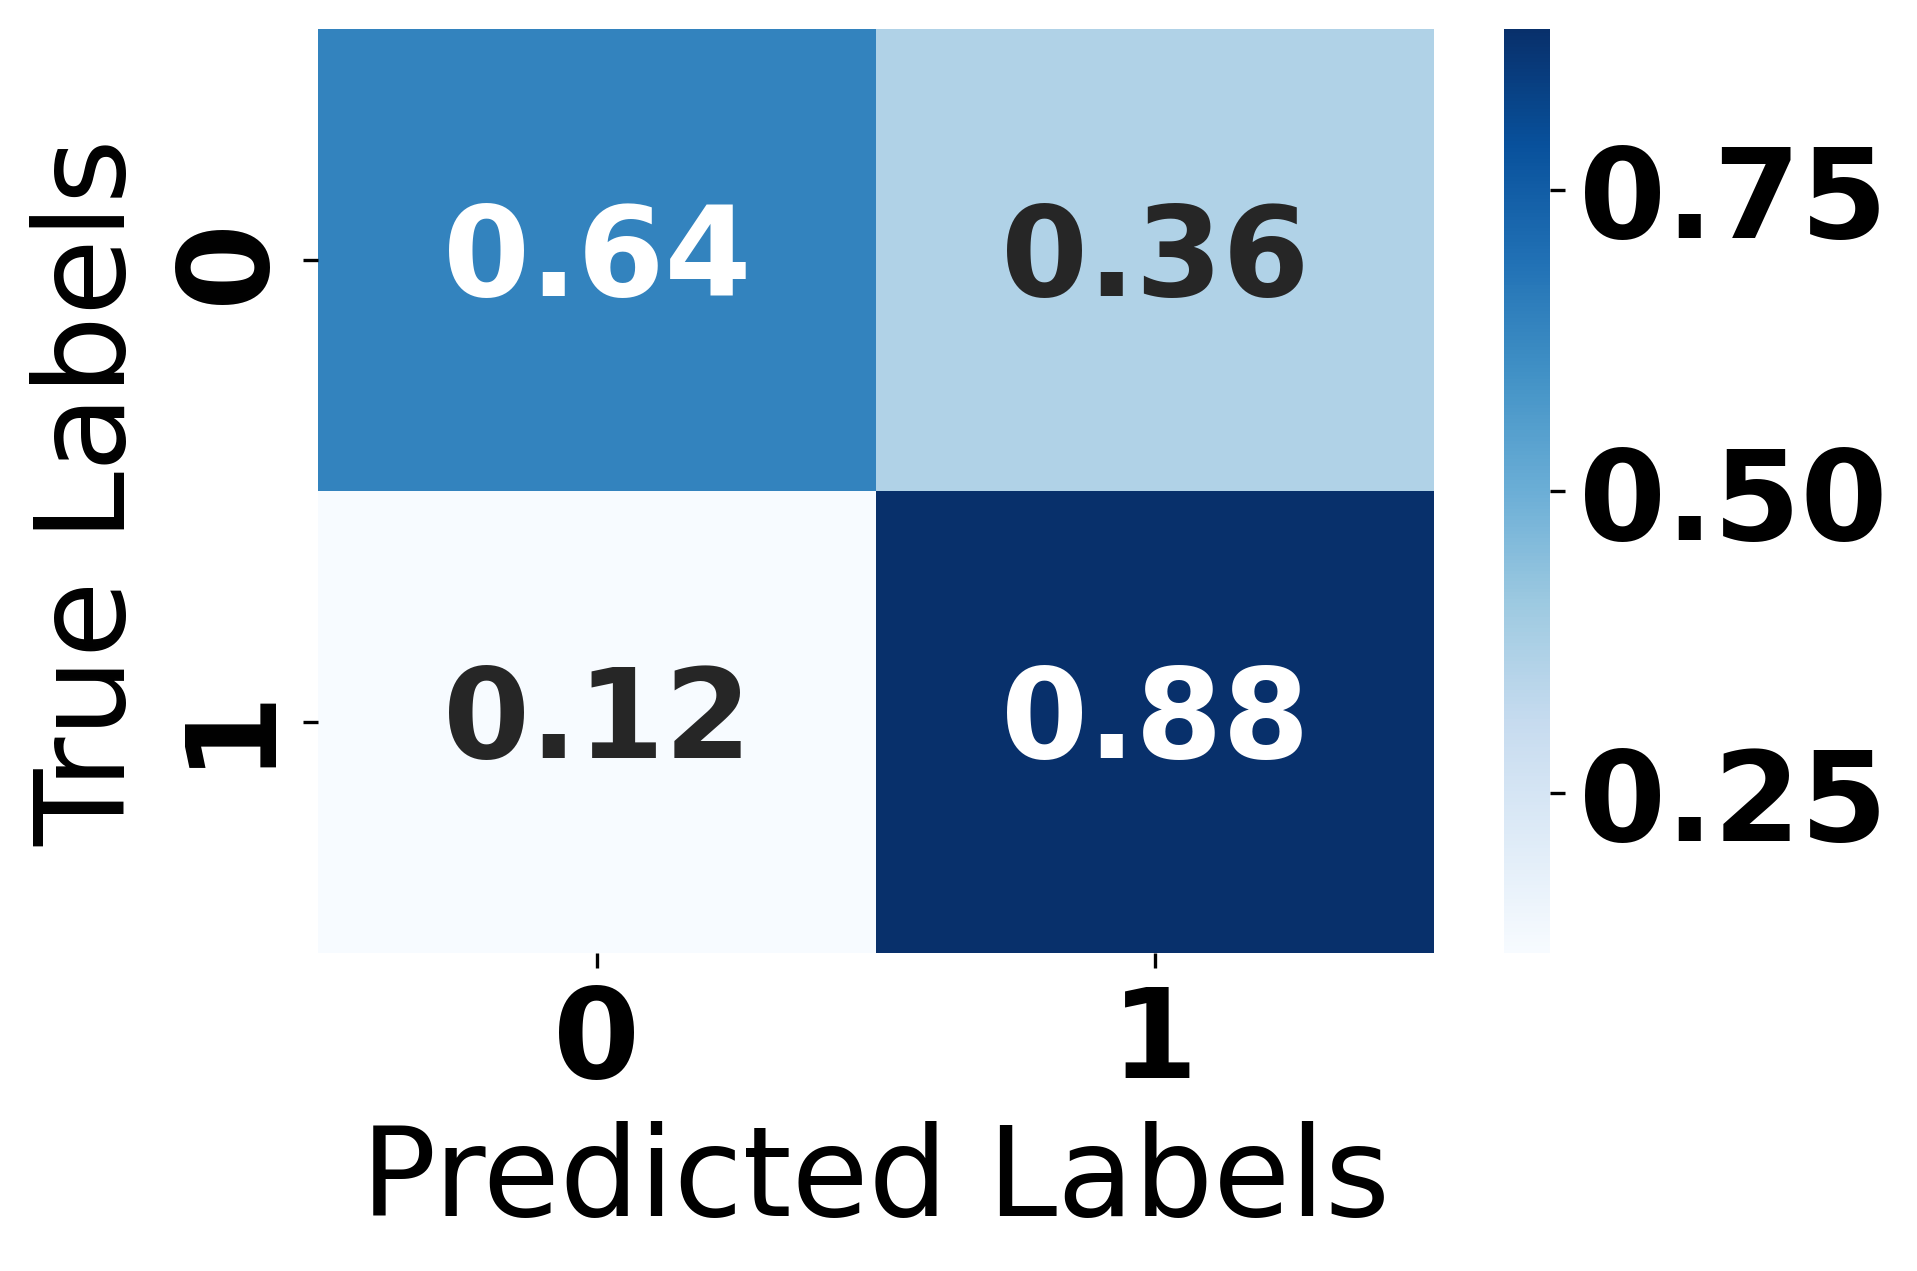

In [ ]:
# Predict probabilities on test data
y_pred_prob = base_cnn_no_residual_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.519, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

In [ ]:
"""
# Save the model to a file
base_cnn_no_residual_model_instance.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/base_cnn_no_residual_model_instance(CSL).h5')
"""

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
base_cnn_no_residual_model_instance = load_model('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/base_cnn_no_residual_model_instance(CSL).h5')

In [ ]:
# Installing shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 11.3 MB/s eta 0:00:00


In [ ]:
# Import Shap
import shap

In [ ]:
# Converting to numpy array

x_train_np = np.array(x_train)
x_test_np = np.array(x_test)

In [ ]:
# Define Shap Explainer
explainer = shap.Explainer(novel_model_instance, x_train_np)

In [ ]:
"""
# Shap values
shap_values = explainer.shap_values(x_test_np)
"""

In [ ]:
"""
# Save SHAP values to a file
np.save('/content/drive/MyDrive/Cognition Dysfunction/SHAP/shap_values.npy', shap_values)

"""

In [ ]:
# Load SHAP values from the saved file
shap_values = np.load('/content/drive/MyDrive/Cognition Dysfunction/SHAP/shap_values.npy')

In [ ]:
# Get the list of features (columns)
feature_names_list = x_train.columns.tolist()

print(feature_names_list)

['Blood Pressure', 'Cholesterol', 'Myocardial Infarction', 'Heart Disease', 'Stroke', 'Asthma', 'Bronchitis', 'Depressive Disorder', 'Renal Issue', 'Diabete', 'Skin Cancer', 'Cancer', 'General Health', 'Physical Health', 'Mental Health', 'Health Insurance', 'Personal Health Care', 'Medical Cost', 'Routine Check', 'Exercise', 'Gendar', 'Age Group', 'Marrital Status', 'Eduction Status', 'Military Record', 'Employment Status', 'Income', 'Ethnicity', 'Smoking Status', 'Non-Smoking Tobacco', 'E-cigarette', 'Alcohol Consumption', 'Errands Alone']


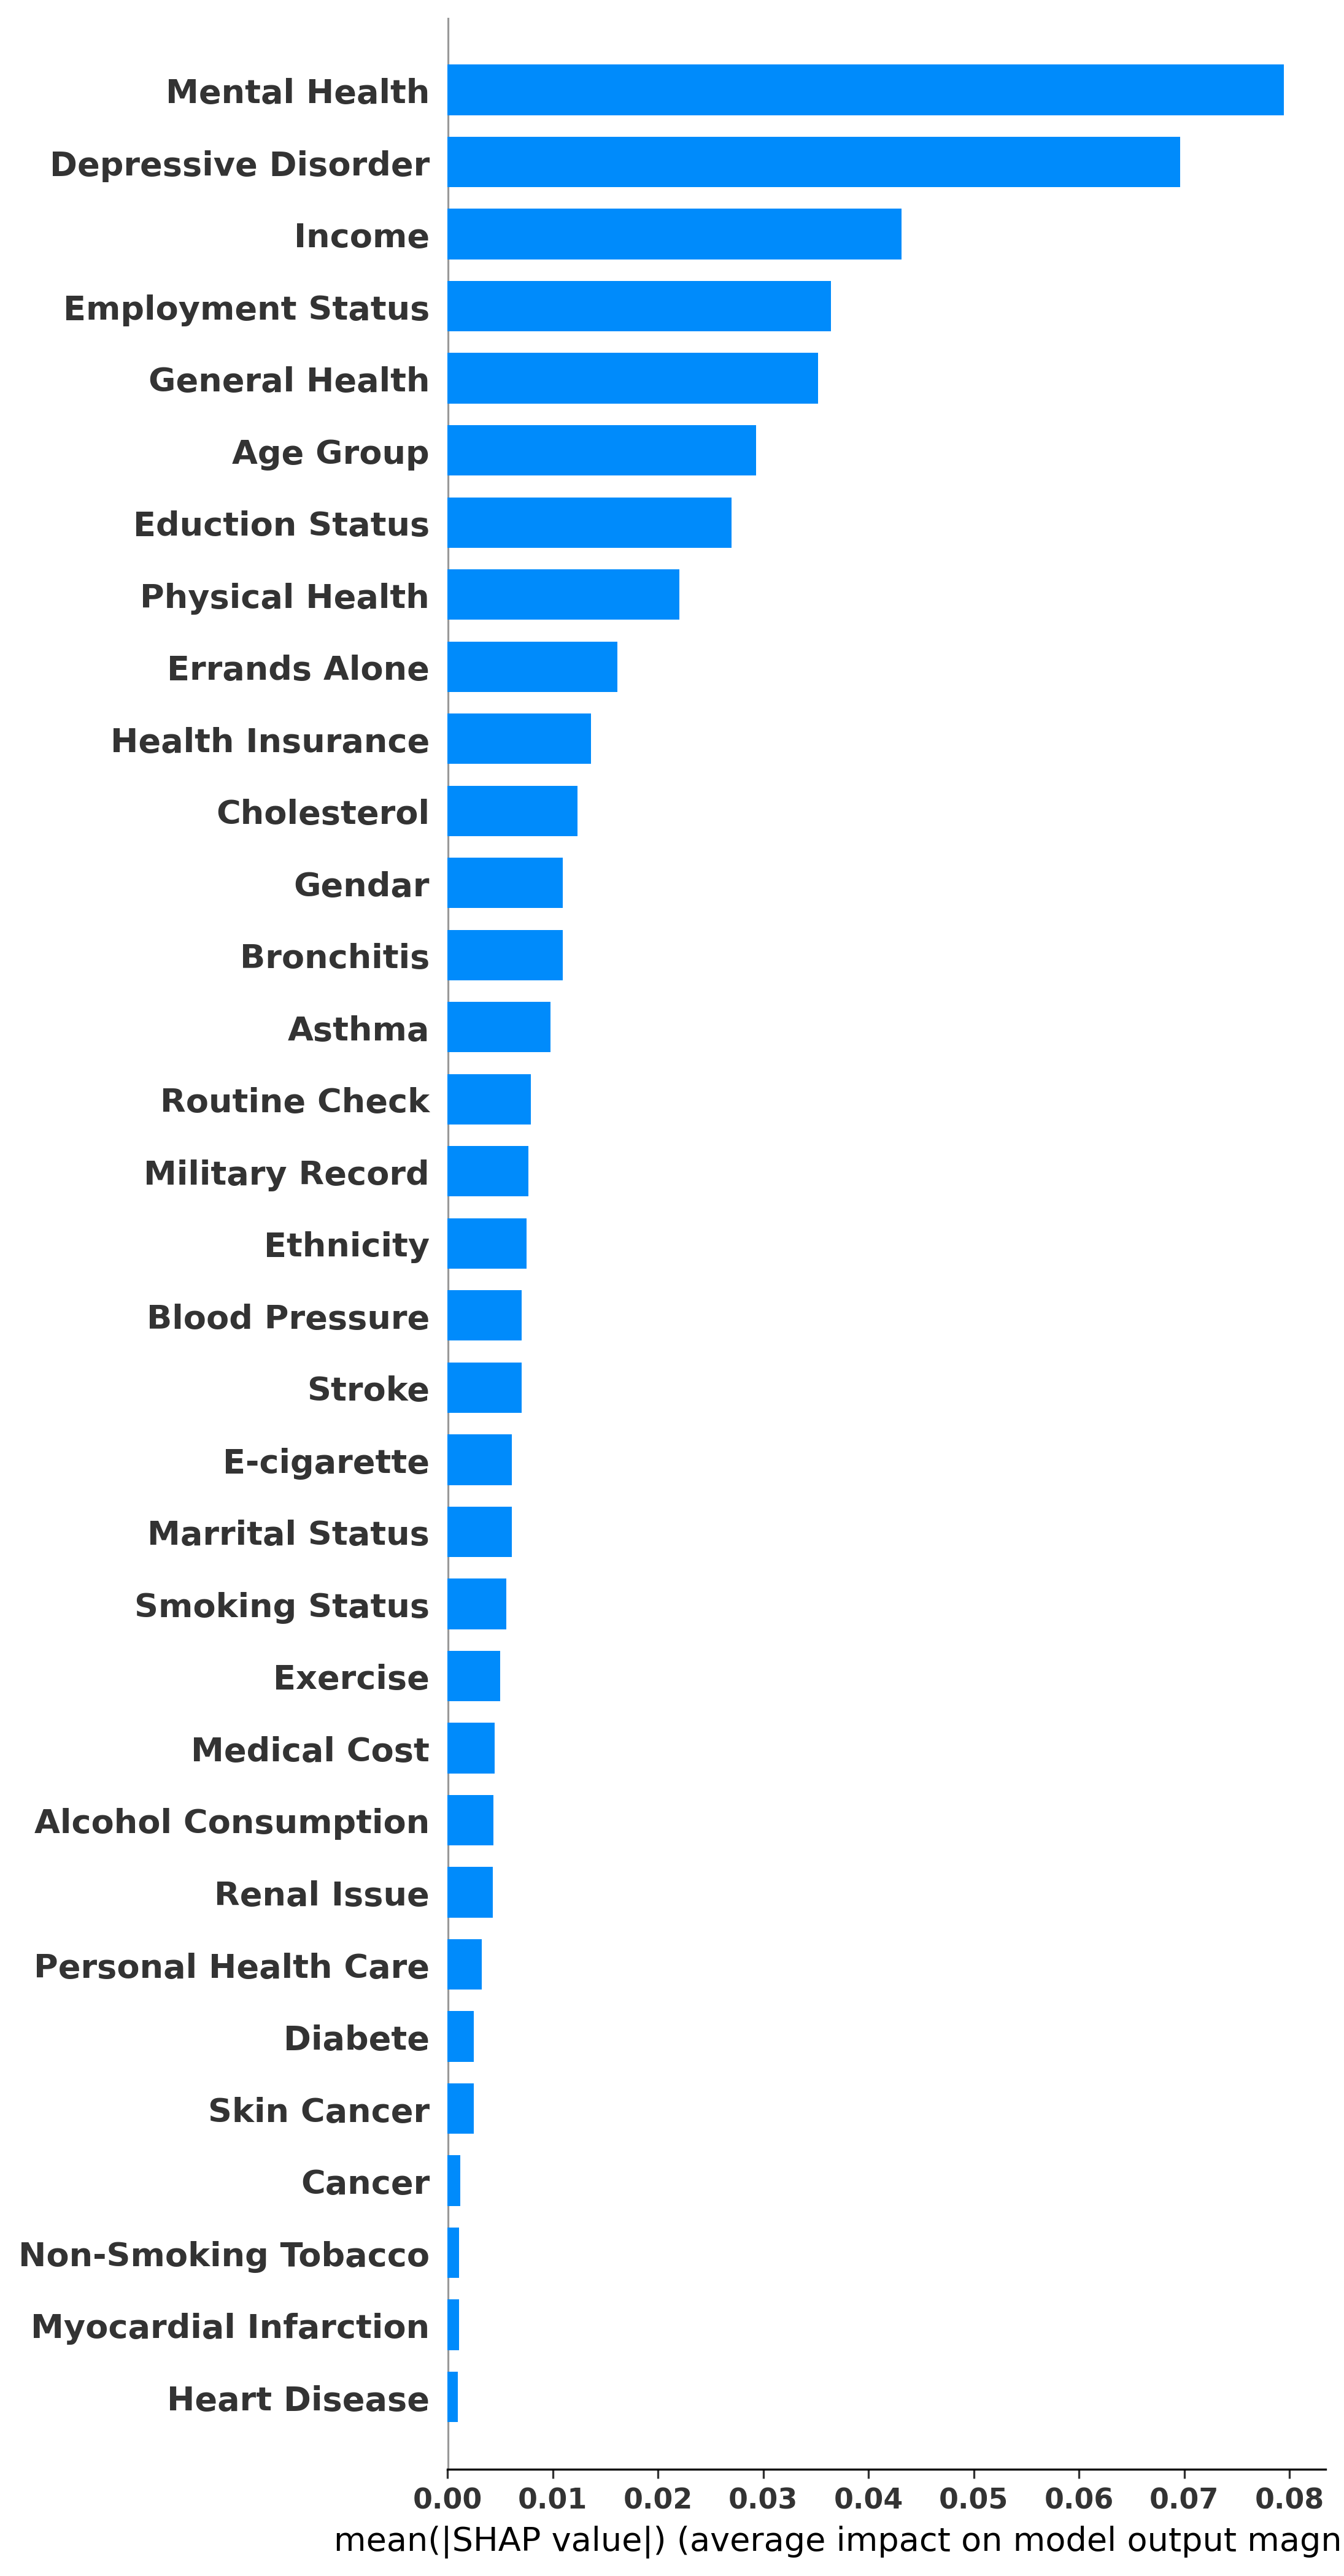

In [ ]:
# Feature importance
max_display = 33

shap.summary_plot(shap_values, x_test, plot_type="bar", feature_names=feature_names_list, max_display=max_display)

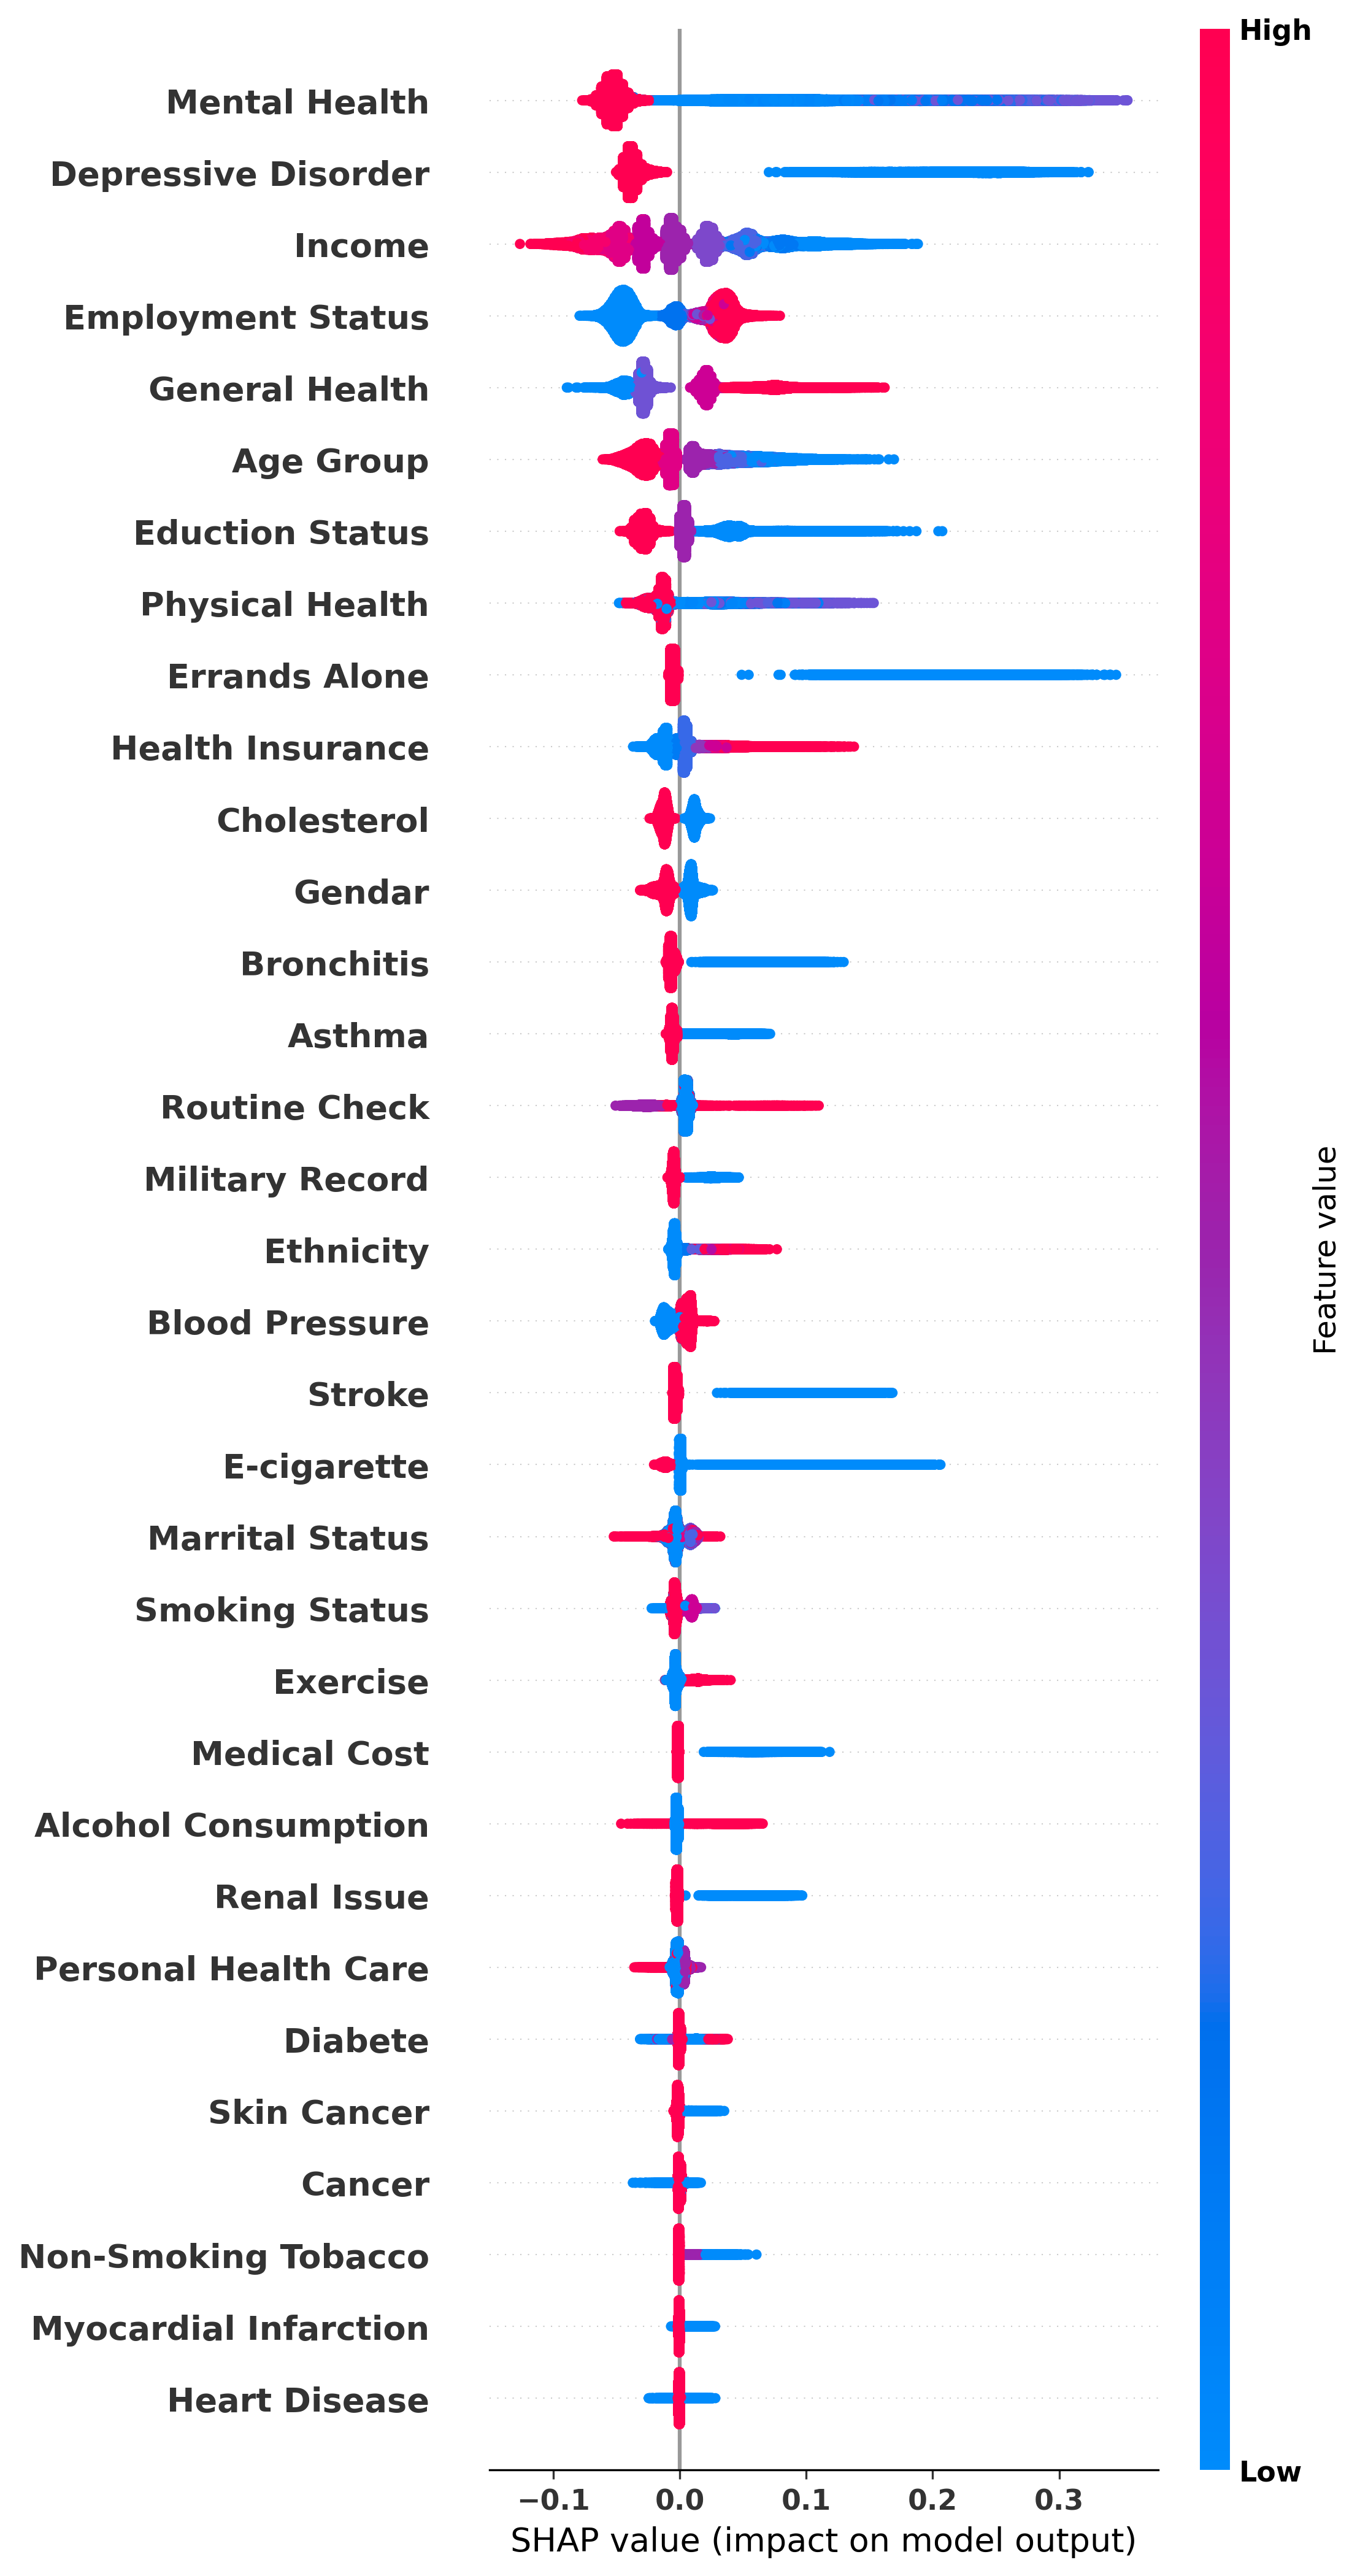

<Figure size 1920x1440 with 0 Axes>

In [ ]:
# Set the max_display to the total number of features (42 in this case)
max_display = 33

# Create the SHAP summary plot with the desired settings
shap.summary_plot(shap_values, x_test_np, feature_names=feature_names_list, max_display=max_display)

# Get the current figure and adjust the size and dpi
fig = plt.gcf()
plt.show()

In [ ]:
# Get the list of features (columns)
feature_names_list = x_train.columns.tolist()

print(feature_names_list)

['Blood Pressure', 'Cholesterol', 'Myocardial Infarction', 'Heart Disease', 'Stroke', 'Asthma', 'Bronchitis', 'Depressive Disorder', 'Renal Issue', 'Diabete', 'Skin Cancer', 'Cancer', 'General Health', 'Physical Health', 'Mental Health', 'Health Insurance', 'Personal Health Care', 'Medical Cost', 'Routine Check', 'Exercise', 'Gendar', 'Age Group', 'Marrital Status', 'Eduction Status', 'Military Record', 'Employment Status', 'Income', 'Ethnicity', 'Smoking Status', 'Non-Smoking Tobacco', 'E-cigarette', 'Alcohol Consumption', 'Errands Alone']


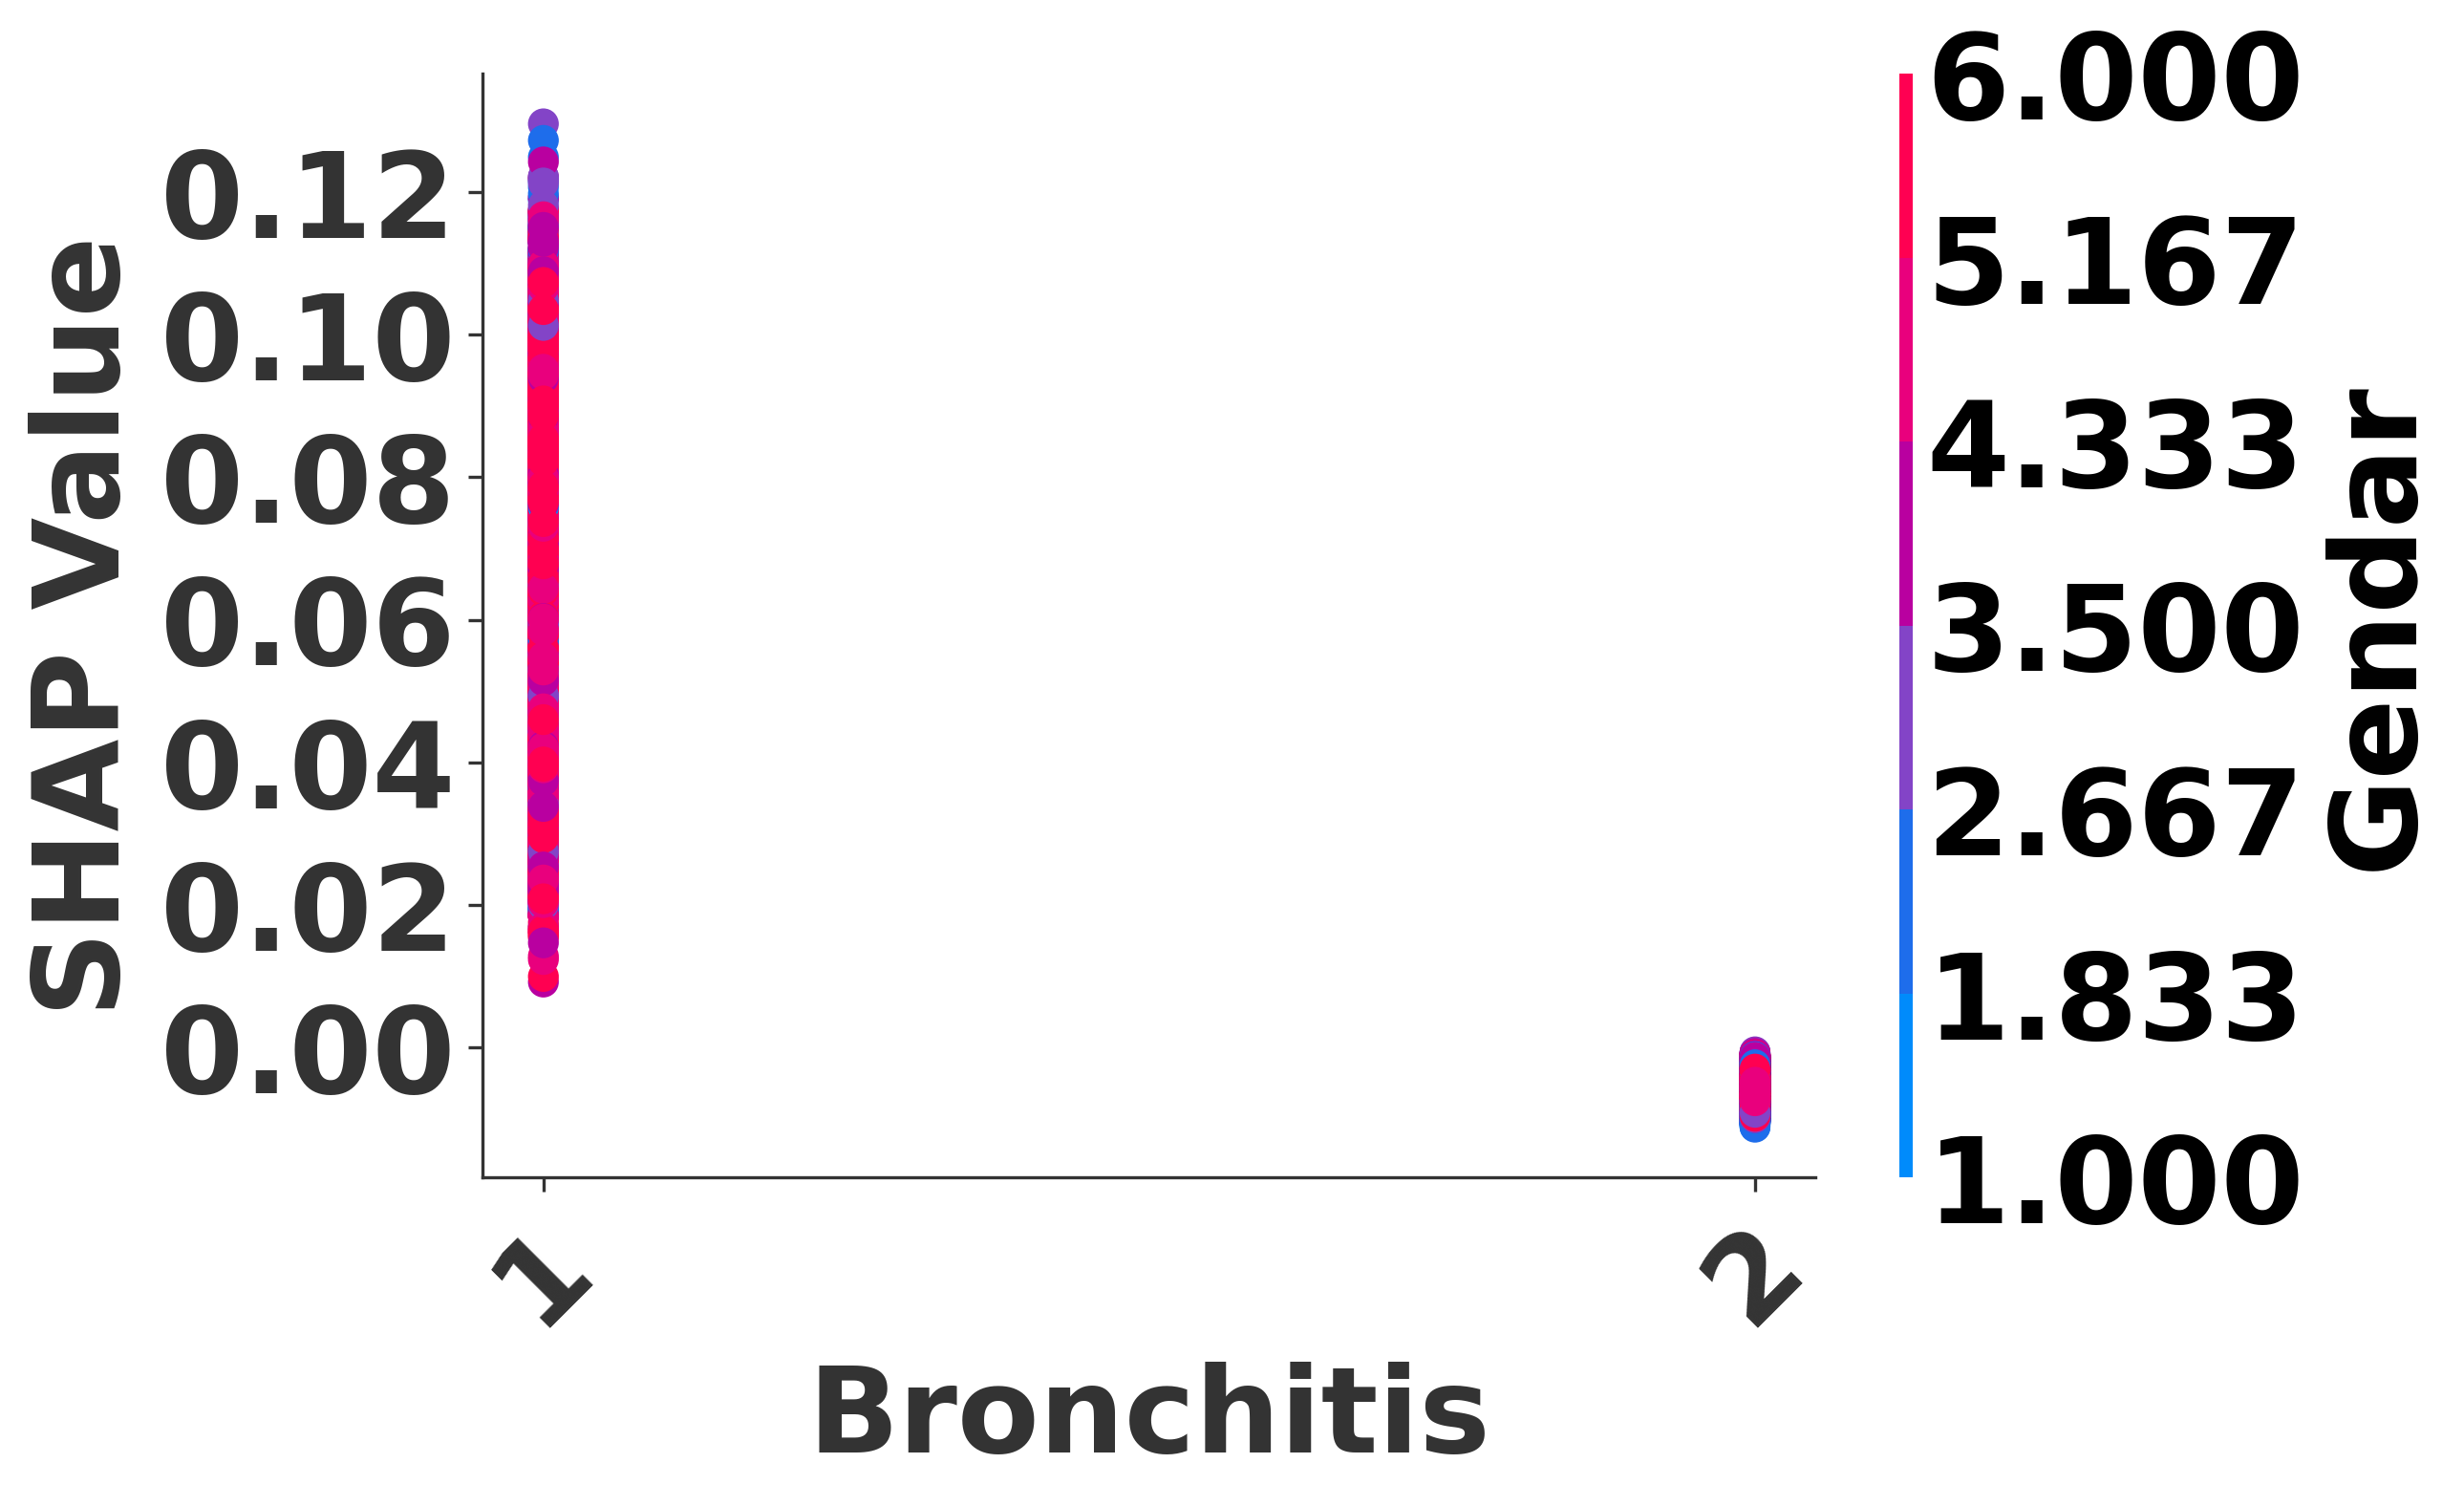

In [ ]:
# Choose a specific feature name
feature_name = 'Bronchitis'

# Find the index of the feature in the feature_names_list
feature_idx = feature_names_list.index(feature_name)

# Create a SHAP dependence plot with a custom interaction index plot
shap.dependence_plot(
    feature_idx,
    shap_values,
    x_test_np,
    dot_size=60,
    interaction_index="Age Group",
    feature_names=feature_names_list,
    show=False  # Set show to False to get the matplotlib figure
)

# Set font size for the axis labels and ticks
plt.xlabel("Bronchitis", fontsize=30, weight="bold")
plt.ylabel("SHAP Value", fontsize=30, weight="bold")

# Set ticks for x-axis based on the values present in the data
unique_values = list(set(x_test_np[:, feature_idx]))  # Get unique values from the feature
unique_values.sort()  # Sort the values
plt.xticks(unique_values, rotation=45, fontsize=30)

plt.yticks(fontsize=30)

# Get the current figure and axes objects
fig, ax = plt.gcf(), plt.gca()

# Get colorbar
cb_ax = fig.axes[1]

# Modifying color bar parameters
cb_ax.tick_params(labelsize=30)
cb_ax.set_ylabel("Gendar", fontsize=30, weight="bold")

# Show the plot
plt.show()

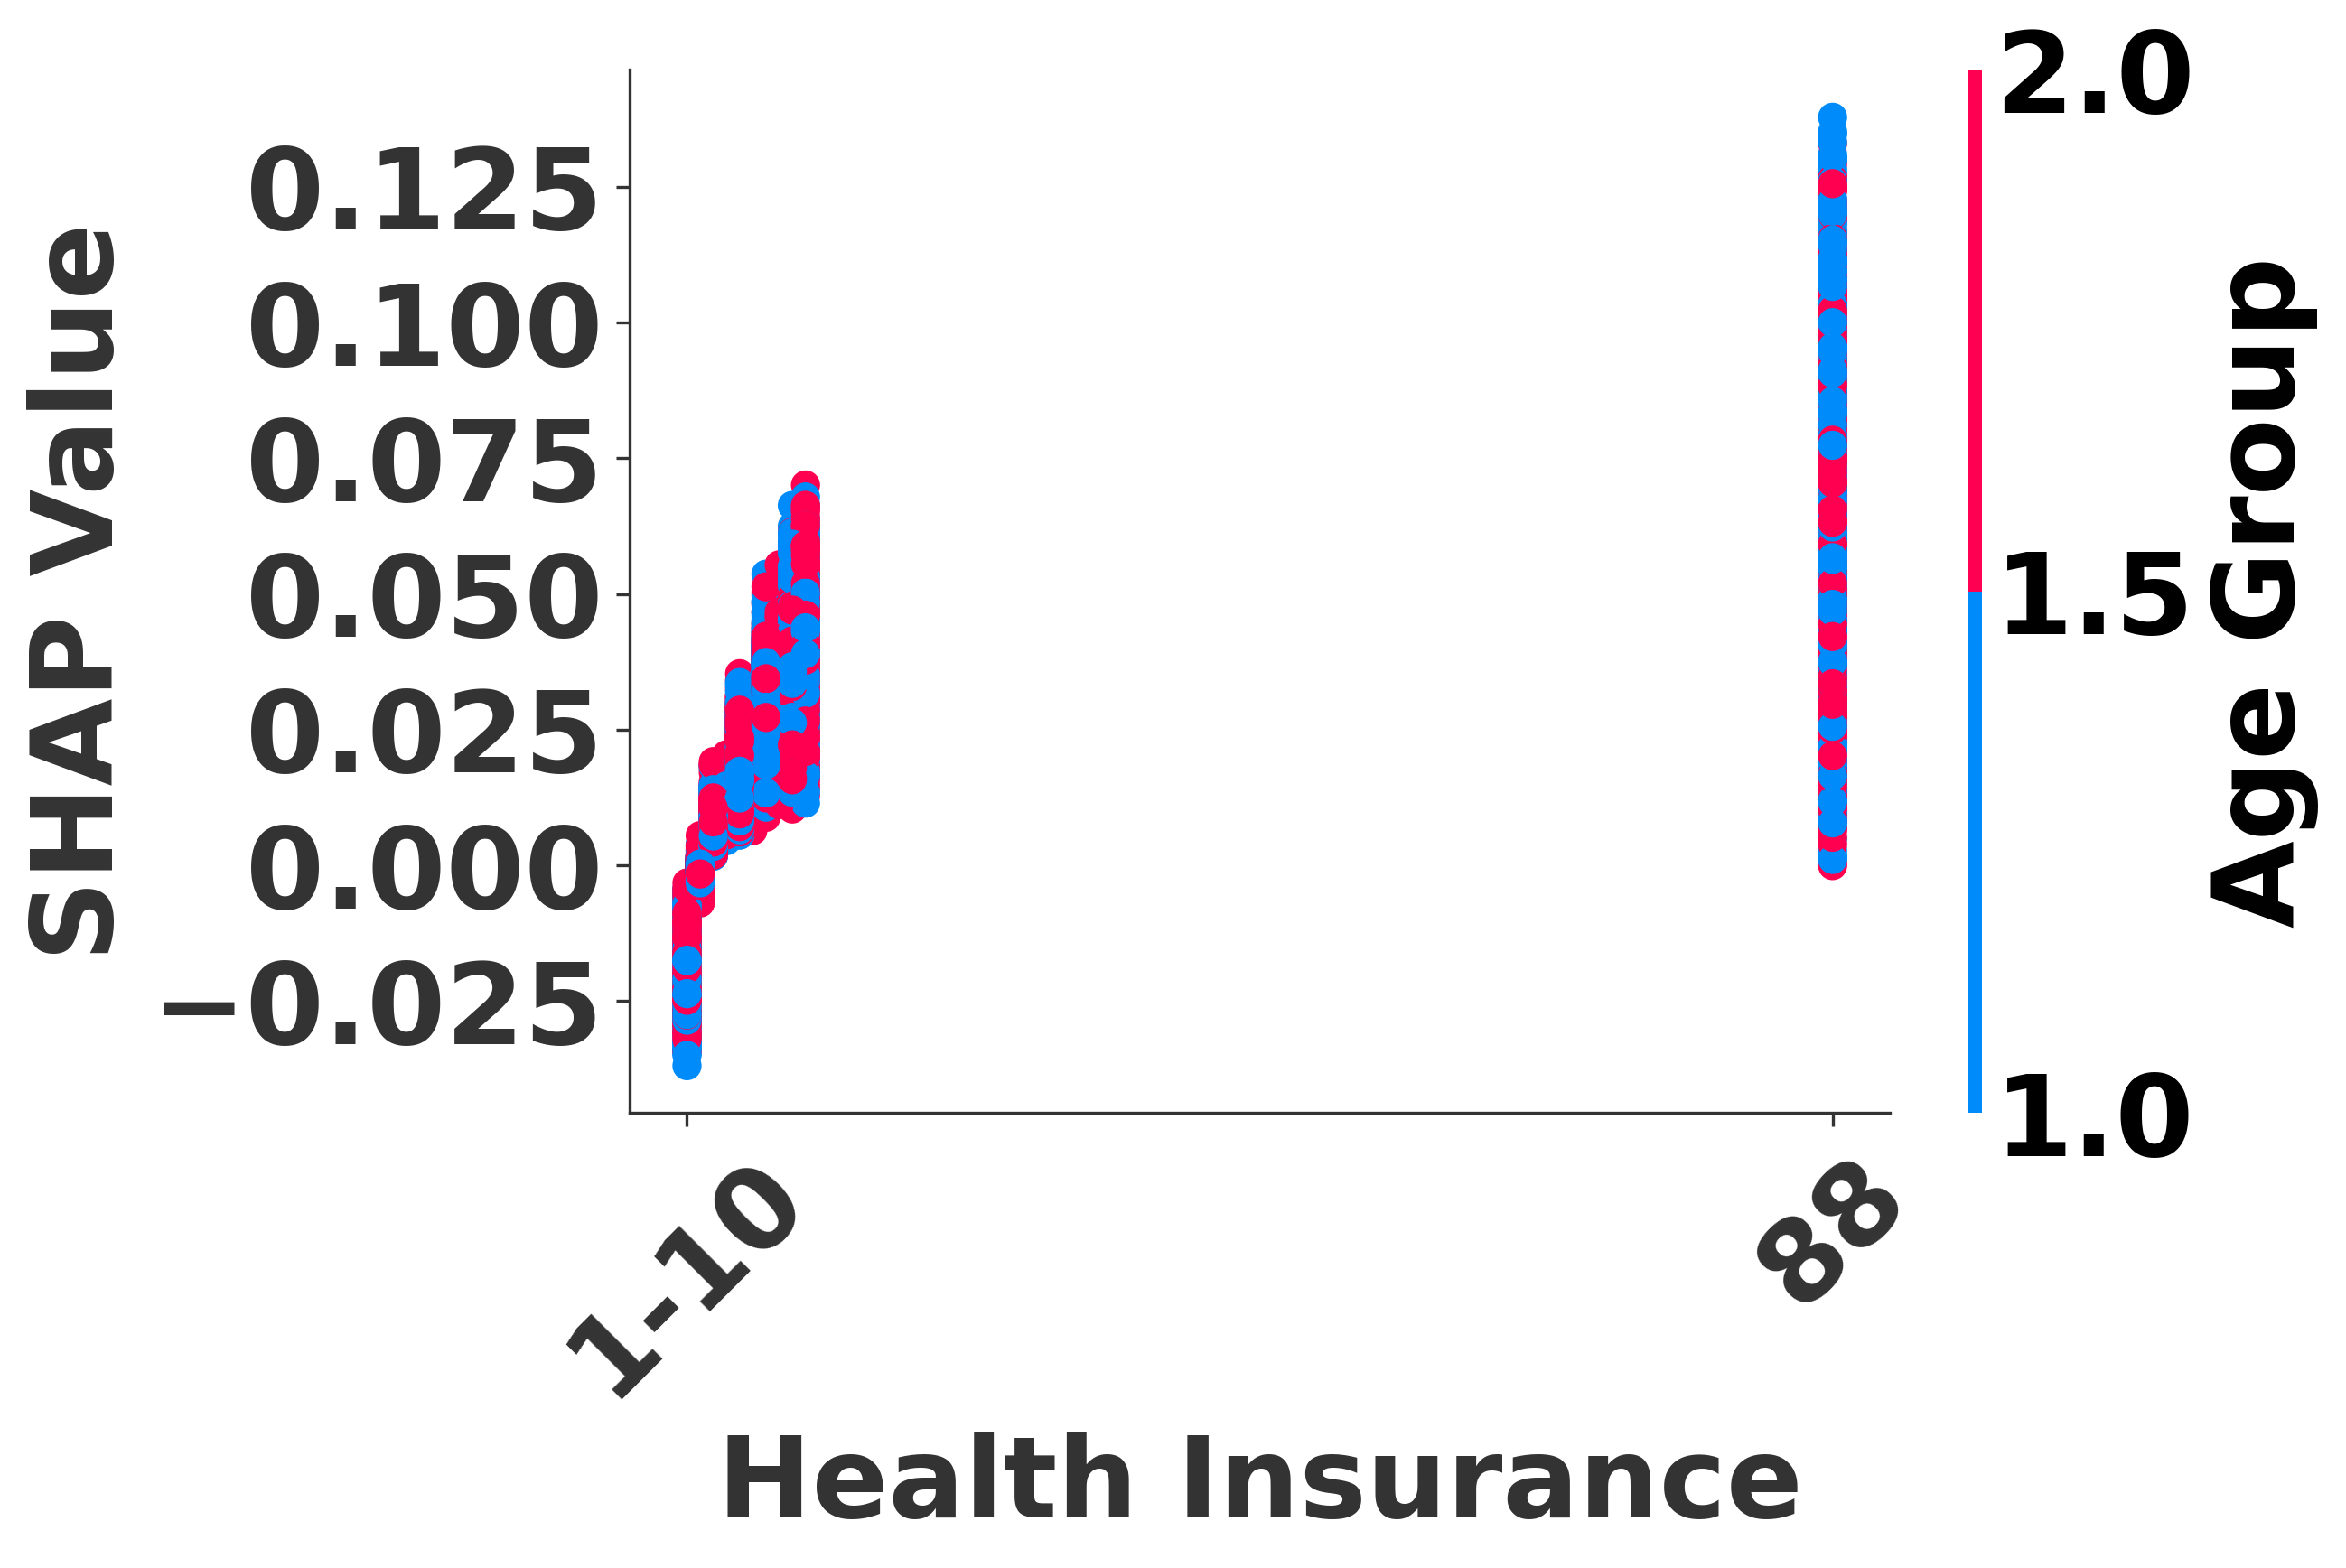

In [ ]:
# Choose a specific feature name
feature_name = 'Health Insurance'

# Find the index of the feature in the feature_names_list
feature_idx = feature_names_list.index(feature_name)

# Create a SHAP dependence plot with a custom interaction index plot
shap.dependence_plot(
    feature_idx,
    shap_values,
    x_test_np,
    dot_size=60,
    interaction_index="Gendar",
    feature_names=feature_names_list,
    show=False  # Set show to False to get the matplotlib figure
)

# Set font size for the axis labels and ticks
plt.xlabel("Health Insurance", fontsize=30, weight="bold")
plt.ylabel("SHAP Value", fontsize=30, weight="bold")

# Set ticks for x-axis based on the values present in the data
unique_values = list(set(x_test_np[:, feature_idx]))  # Get unique values from the feature
unique_values.sort()  # Sort the values

# Customize x-ticks
tick_labels = ["1-10", "88"]
plt.xticks([unique_values[0], unique_values[-1]], tick_labels, rotation=45, fontsize=30)

plt.yticks(fontsize=30)

# Get the current figure and axes objects
fig, ax = plt.gcf(), plt.gca()

# Get colorbar
cb_ax = fig.axes[1]

# Modifying color bar parameters
cb_ax.tick_params(labelsize=30)
cb_ax.set_ylabel("Age Group", fontsize=30, weight="bold")

# Show the plot
plt.show()

In [ ]:
# Counting rows where Bronchitis, Asthma, and Depressive Disorder are all 1
count_rows = DF[(DF['Alcohol Consumption'] == 2) &
                   (DF['Medical Cost'] == 1) &
                   (DF['Cognition Dysfunction'] == 1)].shape[0]

print("Number of rows where Bronchitis, Asthma, and Depressive Disorder are all 1:", count_rows)

Number of rows where Bronchitis, Asthma, and Depressive Disorder are all 1: 115


In [ ]:
# Counting rows where Bronchitis, Asthma, and Depressive Disorder are all 1
count_rows = DF[(DF['Personal Health Care'].between(2, 3)) &
                   (DF['Medical Cost'] == 1) &
                   (DF['Cognition Dysfunction'] == 1)].shape[0]

print("Number of rows where Bronchitis, Asthma, and Depressive Disorder are all 1:", count_rows)

Number of rows where Bronchitis, Asthma, and Depressive Disorder are all 1: 2120


In [ ]:
count_rows = DF[(DF['Employment Status'].isin([1, 2, 7])) &
                (DF['Eduction Status'].between(1, 3)) &
                (DF['Cognition Dysfunction'] == 1)].shape[0]

print("Number of rows where Educational Status is 1 or 7, Employment Status is between 1 and 3, and Cognition Dysfunction is 1:", count_rows)

Number of rows where Educational Status is 1 or 7, Employment Status is between 1 and 3, and Cognition Dysfunction is 1: 952


In [ ]:
count_rows = DF[(DF['Educational Status'].between(1, 7)) &
                (DF['Employment Status'].between(1, 3)) &
                (DF['Cognition Dysfunction'] == 1)].shape[0]

print("Number of rows where Depressive Disorder, Physical Health (1 to 30), Mental Health (1 to 30), and Cognition Dysfunction are all 1:", count_rows)


Number of rows where Depressive Disorder, Physical Health (1 to 30), Mental Health (1 to 30), and Cognition Dysfunction are all 1: 11309
